In [2]:
import numpy as np
import pickle
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42  # TrueType fonts, which Illustrator can handle as text


data_dir = r"D:\Videos Zebrafish\ConfocalLike3 (Febrero 2024)"#r"N:\Data Labo"#
data_name = 'organized_data_behavior_2024_with_freezing.pkl' #"processed_data_oled_aud_9_ROIS.pkl" #

os.chdir(data_dir)

# Reading the list from the file using Pickle
with open(data_name, 'rb') as file:
    data = pickle.load(file)
    
data["window_start"] = data["stim_window"][0]
data["window_end"] = data["stim_window"][1]
data["frames_per_trial"] = data["ctrl"]["head_velocity"].shape[1]
stims = ['ctrl', 'amin', 'amed', 'amax', 'vmin', 'vmin_amin', 'vmin_amed', 'vmin_amax', 'vmed', 'vmed_amin', 'vmed_amed', 'vmed_amax', 'vmax', 'vmax_amin', 'vmax_amed', 'vmax_amax']

In [3]:
for stim in stims:
    llcs = []
    slcs = []
    
    for t in range(data[stim]["is_escape"].shape[0]):
        llc = False
        slc = False
        
        events_during_stim = (data[stim]["valid_event_times"][t] > data["window_start"]) & (data[stim]["valid_event_times"][t] < data["window_end"])
        
        if np.any(events_during_stim):
            types = data[stim]["behavior_type"][t][events_during_stim]
            
            if 1 in types:
                slc = True
            if 0 in types or -1 in types:
                llc = True
        
        llcs.append(llc)
        slcs.append(slc)
    
    
    data[stim]["LLC"] = np.array(llcs)
    data[stim]["SLC"] = np.array(slcs)

In [4]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

save_to_pdf = False

os.chdir(r"G:\My Drive\Proyectos\Zebrafish Multisensory Integration\Cstart Escape Response and Integration - Behavioral Paradigm\Resultados")

if save_to_pdf:
    # Dictionary to hold the PdfPages objects for each region
    pdf_file = PdfPages("Resultados comportamentales - Mayo 2024.pdf")

In [5]:
data['ctrl']['videos']

['confocallike3-02122024105922-0000',
 'confocallike3-02122024111238-0000',
 'confocallike3-02122024115623-0000',
 'confocallike3-02122024122702-0000',
 'confocallike3-02122024125447-0000',
 'confocallike3-02122024132356-0000',
 'confocallike3-02122024135736-0000',
 'confocallike3-02122024141128-0000',
 'confocallike3-02122024143050-0000',
 'confocallike3-02122024145653-0000',
 'confocallike3-02132024104012-0000',
 'confocallike3-02132024110028-0000',
 'confocallike3-02132024112839-0000',
 'confocallike3-02132024120943-0000',
 'confocallike3-02132024122935-0000',
 'confocallike3-02132024124707-0000',
 'confocallike3-02132024132315-0000',
 'confocallike3-02132024133657-0000',
 'confocallike3-02132024141504-0000',
 'confocallike3-02132024144031-0000',
 'confocallike3-02142024100106-0000',
 'confocallike3-02142024104036-0000',
 'confocallike3-02142024110342-0000',
 'confocallike3-02142024114639-0000',
 'confocallike3-02142024130022-0000',
 'confocallike3-02142024131522-0000',
 'confocalli

In [6]:
data['ctrl'].keys()

dict_keys(['trials', 'videos', 'fish', 'sequence_in_fish', 'sequence_in_day', 'sequence_in_exp', 'age', 'vis_intensity', 'aud_intensity', 'head_velocity', 'tail_velocity', 'angular_velocity', 'sum_tail_angles', 'tail6_velocity', 'head_tail_distance', 'head_acceleration', 'tail_acceleration', 'angular_acceleration', 'head_jerk', 'tail_jerk', 'sum_curvature', 'angle_velocity_heading', 'curvature_rate', 'event_times', 'valid_event_times', 'events_in_high_dim', 'events_in_low_dim', 'behavior_type', 'is_escape', 'freezing_events', 'LLC', 'SLC'])

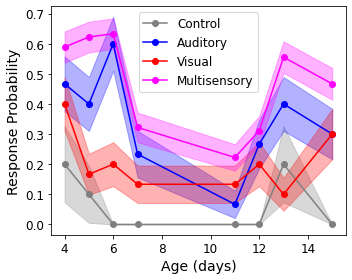

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate response probability
def calculate_response_probability(stims, stim_types):
    response_probabilities = {}
    for stim in stims:
        if stim in stim_types:
            ages = data[stim]["age"]
            unique_ages = np.unique(ages)
            for age in unique_ages:
                if age not in response_probabilities:
                    response_probabilities[age] = []
                trials_for_age = np.where(ages == age)[0]
                is_escape = data[stim]["is_escape"][trials_for_age]
                response_probabilities[age].extend(is_escape)
    return response_probabilities

# Define stimulus categories
auditory_stims = ['amin', 'amed', 'amax']
visual_stims = ['vmin', 'vmed', 'vmax']
multisensory_stims = ['vmin_amin', 'vmin_amed', 'vmin_amax', 'vmed_amin', 'vmed_amed', 'vmed_amax', 'vmax_amin', 'vmax_amed', 'vmax_amax']
control_stims = ['ctrl']

# Calculate response probabilities for each category
auditory_probabilities = calculate_response_probability(auditory_stims, auditory_stims)
visual_probabilities = calculate_response_probability(visual_stims, visual_stims)
multisensory_probabilities = calculate_response_probability(multisensory_stims, multisensory_stims)
control_probabilities = calculate_response_probability(control_stims, control_stims)

# Function to calculate mean and standard error
def calculate_mean_se(probabilities):
    ages = sorted(probabilities.keys())
    means = []
    ses = []
    for age in ages:
        probs = probabilities[age]
        mean = np.mean(probs)
        se = np.std(probs) / np.sqrt(len(probs))
        means.append(mean)
        ses.append(se)
    return ages, means, ses

# Calculate mean and standard error for each category
auditory_ages, auditory_means, auditory_ses = calculate_mean_se(auditory_probabilities)
visual_ages, visual_means, visual_ses = calculate_mean_se(visual_probabilities)
multisensory_ages, multisensory_means, multisensory_ses = calculate_mean_se(multisensory_probabilities)
control_ages, control_means, control_ses = calculate_mean_se(control_probabilities)

# Plotting
plt.figure(figsize=(5, 4))

# Plot control
plt.plot(control_ages, control_means, label=data['stim_labels']['ctrl'], color=data['colors']['ctrl'], marker='o')
plt.fill_between(control_ages, np.array(control_means) - np.array(control_ses), np.array(control_means) + np.array(control_ses), color=data['colors']['ctrl'], alpha=0.3)

# Plot auditory
plt.plot(auditory_ages, auditory_means, label='Auditory', color=data['colors']['amax'], marker='o')
plt.fill_between(auditory_ages, np.array(auditory_means) - np.array(auditory_ses), np.array(auditory_means) + np.array(auditory_ses), color=data['colors']['amax'], alpha=0.3)

# Plot visual
plt.plot(visual_ages, visual_means, label='Visual', color=data['colors']['vmax'], marker='o')
plt.fill_between(visual_ages, np.array(visual_means) - np.array(visual_ses), np.array(visual_means) + np.array(visual_ses), color=data['colors']['vmax'], alpha=0.3)

# Plot multisensory
plt.plot(multisensory_ages, multisensory_means, label='Multisensory', color=data['colors']['vmax_amax'], marker='o')
plt.fill_between(multisensory_ages, np.array(multisensory_means) - np.array(multisensory_ses), np.array(multisensory_means) + np.array(multisensory_ses), color=data['colors']['vmax_amax'], alpha=0.3)

# Adjust font sizes
plt.xlabel('Age (days)', fontsize=14)
plt.ylabel('Response Probability', fontsize=14)
#plt.title('Response Probability by Age and Stimulus Type (all escapes)', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

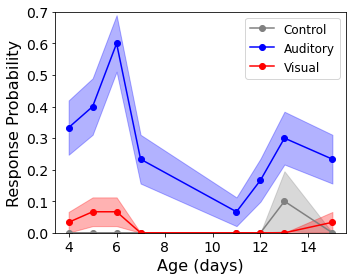

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate response probability
def calculate_response_probability(stims, stim_types):
    response_probabilities = {}
    for stim in stims:
        if stim in stim_types:
            ages = data[stim]["age"]
            unique_ages = np.unique(ages)
            for age in unique_ages:
                if age not in response_probabilities:
                    response_probabilities[age] = []
                trials_for_age = np.where(ages == age)[0]
                is_escape = data[stim]["SLC"][trials_for_age]
                response_probabilities[age].extend(is_escape)
    return response_probabilities

# Define stimulus categories
auditory_stims = ['amin', 'amed', 'amax']
visual_stims = ['vmin', 'vmed', 'vmax']
multisensory_stims = ['vmin_amin', 'vmin_amed', 'vmin_amax', 'vmed_amin', 'vmed_amed', 'vmed_amax', 'vmax_amin', 'vmax_amed', 'vmax_amax']
control_stims = ['ctrl']

# Calculate response probabilities for each category
auditory_probabilities = calculate_response_probability(auditory_stims, auditory_stims)
visual_probabilities = calculate_response_probability(visual_stims, visual_stims)
multisensory_probabilities = calculate_response_probability(multisensory_stims, multisensory_stims)
control_probabilities = calculate_response_probability(control_stims, control_stims)

# Function to calculate mean and standard error
def calculate_mean_se(probabilities):
    ages = sorted(probabilities.keys())
    means = []
    ses = []
    for age in ages:
        probs = probabilities[age]
        mean = np.mean(probs)
        se = np.std(probs) / np.sqrt(len(probs))
        means.append(mean)
        ses.append(se)
    return ages, means, ses

# Calculate mean and standard error for each category
auditory_ages, auditory_means, auditory_ses = calculate_mean_se(auditory_probabilities)
visual_ages, visual_means, visual_ses = calculate_mean_se(visual_probabilities)
multisensory_ages, multisensory_means, multisensory_ses = calculate_mean_se(multisensory_probabilities)
control_ages, control_means, control_ses = calculate_mean_se(control_probabilities)

# Plotting
plt.figure(figsize=(5, 4))

# Plot control
plt.plot(control_ages, control_means, label=data['stim_labels']['ctrl'], color=data['colors']['ctrl'], marker='o')
plt.fill_between(control_ages, np.array(control_means) - np.array(control_ses), np.array(control_means) + np.array(control_ses), color=data['colors']['ctrl'], alpha=0.3)

# Plot auditory
plt.plot(auditory_ages, auditory_means, label='Auditory', color=data['colors']['amax'], marker='o')
plt.fill_between(auditory_ages, np.array(auditory_means) - np.array(auditory_ses), np.array(auditory_means) + np.array(auditory_ses), color=data['colors']['amax'], alpha=0.3)

# Plot visual
plt.plot(visual_ages, visual_means, label='Visual', color=data['colors']['vmax'], marker='o')
plt.fill_between(visual_ages, np.array(visual_means) - np.array(visual_ses), np.array(visual_means) + np.array(visual_ses), color=data['colors']['vmax'], alpha=0.3)

# Plot multisensory
#plt.plot(multisensory_ages, multisensory_means, label='Multisensory (vmax_amax)', color=data['colors']['vmax_amax'], marker='o')
#plt.fill_between(multisensory_ages, np.array(multisensory_means) - np.array(multisensory_ses), np.array(multisensory_means) + np.array(multisensory_ses), color=data['colors']['vmax_amax'], alpha=0.3)

# Adjust font sizes
plt.xlabel('Age (days)', fontsize=16)
plt.ylabel('Response Probability', fontsize=16)
#plt.title('Response Probability by Age and Stimulus Type (SLC)', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,0.7)
plt.tight_layout()
pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

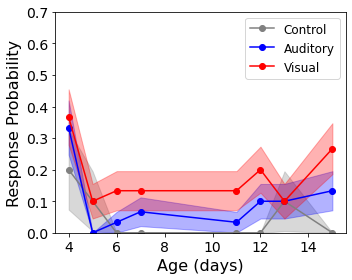

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate response probability
def calculate_response_probability(stims, stim_types):
    response_probabilities = {}
    for stim in stims:
        if stim in stim_types:
            ages = data[stim]["age"]
            unique_ages = np.unique(ages)
            for age in unique_ages:
                if age not in response_probabilities:
                    response_probabilities[age] = []
                trials_for_age = np.where(ages == age)[0]
                is_escape = data[stim]["LLC"][trials_for_age]
                response_probabilities[age].extend(is_escape)
    return response_probabilities

# Define stimulus categories
auditory_stims = ['amin', 'amed', 'amax']
visual_stims = ['vmin', 'vmed', 'vmax']
multisensory_stims = ['vmin_amin', 'vmin_amed', 'vmin_amax', 'vmed_amin', 'vmed_amed', 'vmed_amax', 'vmax_amin', 'vmax_amed', 'vmax_amax']
control_stims = ['ctrl']

# Calculate response probabilities for each category
auditory_probabilities = calculate_response_probability(auditory_stims, auditory_stims)
visual_probabilities = calculate_response_probability(visual_stims, visual_stims)
multisensory_probabilities = calculate_response_probability(multisensory_stims, multisensory_stims)
control_probabilities = calculate_response_probability(control_stims, control_stims)

# Function to calculate mean and standard error
def calculate_mean_se(probabilities):
    ages = sorted(probabilities.keys())
    means = []
    ses = []
    for age in ages:
        probs = probabilities[age]
        mean = np.mean(probs)
        se = np.std(probs) / np.sqrt(len(probs))
        means.append(mean)
        ses.append(se)
    return ages, means, ses

# Calculate mean and standard error for each category
auditory_ages, auditory_means, auditory_ses = calculate_mean_se(auditory_probabilities)
visual_ages, visual_means, visual_ses = calculate_mean_se(visual_probabilities)
multisensory_ages, multisensory_means, multisensory_ses = calculate_mean_se(multisensory_probabilities)
control_ages, control_means, control_ses = calculate_mean_se(control_probabilities)

# Plotting
plt.figure(figsize=(5, 4))

# Plot control
plt.plot(control_ages, control_means, label=data['stim_labels']['ctrl'], color=data['colors']['ctrl'], marker='o')
plt.fill_between(control_ages, np.array(control_means) - np.array(control_ses), np.array(control_means) + np.array(control_ses), color=data['colors']['ctrl'], alpha=0.3)

# Plot auditory
plt.plot(auditory_ages, auditory_means, label='Auditory', color=data['colors']['amax'], marker='o')
plt.fill_between(auditory_ages, np.array(auditory_means) - np.array(auditory_ses), np.array(auditory_means) + np.array(auditory_ses), color=data['colors']['amax'], alpha=0.3)

# Plot visual
plt.plot(visual_ages, visual_means, label='Visual', color=data['colors']['vmax'], marker='o')
plt.fill_between(visual_ages, np.array(visual_means) - np.array(visual_ses), np.array(visual_means) + np.array(visual_ses), color=data['colors']['vmax'], alpha=0.3)

# Plot multisensory
#plt.plot(multisensory_ages, multisensory_means, label='Multisensory (vmax_amax)', color=data['colors']['vmax_amax'], marker='o')
#plt.fill_between(multisensory_ages, np.array(multisensory_means) - np.array(multisensory_ses), np.array(multisensory_means) + np.array(multisensory_ses), color=data['colors']['vmax_amax'], alpha=0.3)

# Adjust font sizes
plt.xlabel('Age (days)', fontsize=16)
plt.ylabel('Response Probability', fontsize=16)
#plt.title('Response Probability by Age and Stimulus Type (SLC)', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,0.7)
plt.tight_layout()
pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

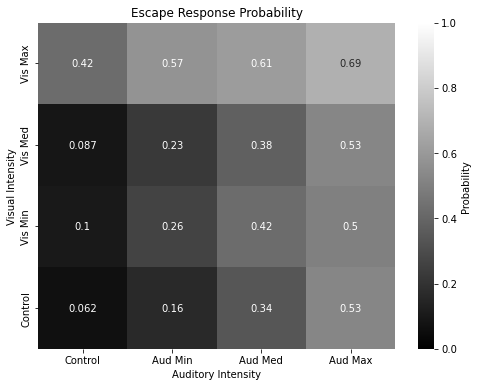

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define auditory and visual stimulus levels
auditory_levels = ['ctrl', 'amin', 'amed', 'amax']
visual_levels = ['ctrl', 'vmin', 'vmed', 'vmax']

# Initialize an empty array to hold escape probabilities for each visual-auditory combination
escape_prob_matrix = np.zeros((len(visual_levels), len(auditory_levels)))

# Calculate escape probability for each combination of visual and auditory stimuli
for i, v_stim in enumerate(reversed(visual_levels)):  # Reverse order to have 'ctrl' at the bottom
    for j, a_stim in enumerate(auditory_levels):
        # Determine the correct combined stimulus label
        if v_stim == "ctrl" and a_stim == "ctrl":
            combined_stim = "ctrl"  # Control only
        elif v_stim == "ctrl":
            combined_stim = a_stim  # Auditory-only
        elif a_stim == "ctrl":
            combined_stim = v_stim  # Visual-only
        else:
            combined_stim = f"{v_stim}_{a_stim}"  # Combined visual and auditory
        
        # Check if the combined stimulus exists in the data
        if combined_stim in data:
            escape_trials = data[combined_stim]["is_escape"]
            escape_prob = np.mean(escape_trials)  # Calculate the probability
            escape_prob_matrix[i, j] = escape_prob
        else:
            escape_prob_matrix[i, j] = np.nan  # Handle missing combinations gracefully

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(escape_prob_matrix, annot=True, cmap="gray", vmin=0, vmax=1,
            xticklabels=[data["stim_labels"][a] for a in auditory_levels],
            yticklabels=[data["stim_labels"][v] for v in reversed(visual_levels)],  # Reverse y-axis labels
            cbar_kws={'label': 'Probability'})

plt.title("Escape Response Probability")
plt.xlabel("Auditory Intensity")
plt.ylabel("Visual Intensity")
plt.show()


In [63]:
# Define age group for this analysis
age_group = (4, 7)

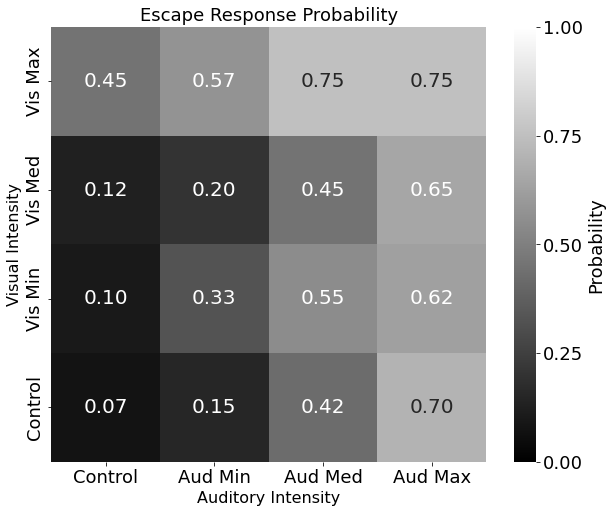

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define auditory and visual stimulus levels
auditory_levels = ['ctrl', 'amin', 'amed', 'amax']
visual_levels = ['ctrl', 'vmin', 'vmed', 'vmax']

# Initialize an empty array to hold escape probabilities for each visual-auditory combination
escape_prob_matrix = np.zeros((len(visual_levels), len(auditory_levels)))

# Calculate escape probability for each combination of visual and auditory stimuli for fish aged 4 to 6 days
for i, v_stim in enumerate(reversed(visual_levels)):  # Reverse order to have 'ctrl' at the bottom
    for j, a_stim in enumerate(auditory_levels):
        # Determine the correct combined stimulus label
        if v_stim == "ctrl" and a_stim == "ctrl":
            combined_stim = "ctrl"  # Control only
        elif v_stim == "ctrl":
            combined_stim = a_stim  # Auditory-only
        elif a_stim == "ctrl":
            combined_stim = v_stim  # Visual-only
        else:
            combined_stim = f"{v_stim}_{a_stim}"  # Combined visual and auditory
        
        # Check if the combined stimulus exists in the data
        if combined_stim in data:
            # Filter trials based on the age criterion (4 to 6 days inclusive)
            ages = data[combined_stim]["age"]
            escape_trials = data[combined_stim]["is_escape"]
            selected_trials = (ages >= age_group[0]) & (ages <= age_group[1])
            
            # Calculate escape probability for the filtered trials
            if np.any(selected_trials):  # Check if there are any trials in the age range
                escape_prob = np.mean(escape_trials[selected_trials])  # Calculate probability for selected trials
                escape_prob_matrix[i, j] = escape_prob
            else:
                escape_prob_matrix[i, j] = np.nan  # Set to NaN if no trials meet the age criterion
        else:
            escape_prob_matrix[i, j] = np.nan  # Handle missing combinations gracefully

# Plotting with adjusted style
plt.figure(figsize=(10, 8))
sns.heatmap(escape_prob_matrix, annot=True, fmt=".2f", cmap="gray", vmin=0, vmax=1, square=True,
            xticklabels=[data["stim_labels"][a] for a in auditory_levels],
            yticklabels=[data["stim_labels"][v] for v in reversed(visual_levels)],  # Reverse y-axis labels
            annot_kws={"size": 20},
            cbar_kws={'label': 'Probability', 'ticks': [0, 0.25, 0.5, 0.75, 1], 'orientation': 'vertical'})

# Set title and labels with adjusted font sizes
plt.title("Escape Response Probability", fontsize=18)
plt.xlabel("Auditory Intensity", fontsize=16)
plt.ylabel("Visual Intensity", fontsize=16)

# Adjust tick label font sizes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Customize colorbar font size and label
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Probability', size=18)

# Display the plot
plt.show()


In [65]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Function to map visual and auditory stimuli to numeric values
def map_stimulus_to_numeric(visual, auditory):
    visual_map = {'ctrl': 0, 'vmin': 1, 'vmed': 2, 'vmax': 3}
    auditory_map = {'ctrl': 0, 'amin': 1, 'amed': 2, 'amax': 3}
    
    return visual_map[visual], auditory_map[auditory]

# Function to build the dataframe for GLM
def build_glm_dataframe(data, age_range):
    records = []
    
    # Loop through each stimulus condition
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        trials = data[stim]["age"]
        escapes = data[stim]["is_escape"]
        
        # Determine visual and auditory components
        if stim in auditory_stimuli:
            visual_component, auditory_component = 'ctrl', stim  # Auditory-only stimulus
        elif stim in visual_stimuli:
            visual_component, auditory_component = stim, 'ctrl'  # Visual-only stimulus
        elif '_' in stim:
            # For combined stimuli, split into visual and auditory components
            visual_component, auditory_component = stim.split('_')
        else:
            # Control-only stimulus
            visual_component, auditory_component = 'ctrl', 'ctrl'
        
        # Filter trials by age
        age_filter = (trials >= age_range[0]) & (trials <= age_range[1])
        
        # Add data for each trial that matches the age filter
        for i, is_valid in enumerate(age_filter):
            if is_valid:
                visual_numeric, auditory_numeric = map_stimulus_to_numeric(visual_component, auditory_component)
                record = {
                    'response': escapes[i],  # 0 or 1 based on is_escape
                    'visual_intensity': visual_numeric,  # Numeric visual intensity
                    'auditory_intensity': auditory_numeric,  # Numeric auditory intensity
                    'stimulus': stim,  # Full stimulus code
                    'age': trials[i]  # Fish age
                }
                records.append(record)
    
    # Convert to DataFrame
    df = pd.DataFrame(records)
    return df


# Function to run the binomial GLM for a given dataframe
def run_binomial_glm(df, age_label):
    # Fit a GLM model with binomial family (logistic regression)
    model = smf.glm(formula='response ~ visual_intensity + auditory_intensity', 
                    data=df, 
                    family=sm.families.Binomial()).fit()
    
    # Output summary results
    print(f"\n===== Escape Response Probability GLM Results (Age Group: {age_label}) =====")
    print(model.summary())
    
    return model

def calculate_mean_response_probability(df):
    # Group by visual and auditory intensities and calculate the mean response (probability)
    grouped = df.groupby(['visual_intensity', 'auditory_intensity'])['response'].mean().reset_index()
    
    # Rename the 'response' column to 'mean_response_probability' for clarity
    grouped.rename(columns={'response': 'mean_response_probability'}, inplace=True)
    
    return grouped

# Build DataFrame for GLM using escape probability
escape_df = build_glm_dataframe(data, age_group)

# Calculate mean response probability
escape_mean_probs = calculate_mean_response_probability(escape_df)
print("\n===== Mean Escape Response Probability by Visual and Auditory Intensities (Age Group: 4-6 days) =====")
print(escape_mean_probs)

# Run GLM for this age group
escape_model = run_binomial_glm(escape_df, "Ages 4-6 Days")



===== Mean Escape Response Probability by Visual and Auditory Intensities (Age Group: 4-6 days) =====
    visual_intensity  auditory_intensity  mean_response_probability
0                  0                   0                      0.075
1                  0                   1                      0.150
2                  0                   2                      0.425
3                  0                   3                      0.700
4                  1                   0                      0.100
5                  1                   1                      0.325
6                  1                   2                      0.550
7                  1                   3                      0.625
8                  2                   0                      0.125
9                  2                   1                      0.200
10                 2                   2                      0.450
11                 2                   3                      0.650
12           

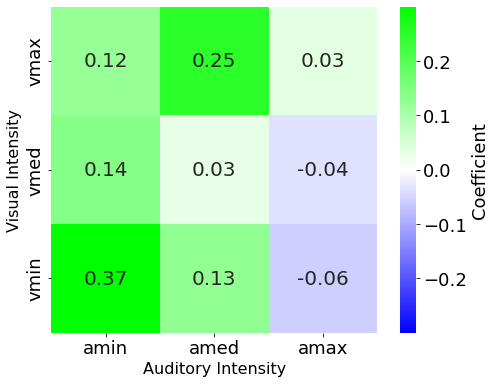

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Function to calculate integration coefficients for escape probability without dividing by escape type
def calculate_integration_coefficients(data, age_group):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        trials = data[stim]["age"]
        escapes = data[stim]["is_escape"]
        age_filter = (trials >= age_group[0]) & (trials <= age_group[1])
        
        # Calculate escape probability for the specified age group
        behavior_count = np.sum(escapes[age_filter])
        total_trials = np.sum(age_filter)
        
        # Calculate probability or set to NaN if no trials meet the criteria
        probabilities[stim] = behavior_count / total_trials if total_trials > 0 else np.nan

    coefficients = {}
    for stim in combined_stimuli:
        v_stim, a_stim = stim.split('_')
        v_prob = probabilities.get(v_stim, np.nan)
        a_prob = probabilities.get(a_stim, np.nan)
        if np.isnan(v_prob) or np.isnan(a_prob):
            coefficients[stim] = np.nan
        else:
            ep = max(v_prob, a_prob)
            op = probabilities.get(stim, np.nan)
            coefficient = (op - ep) / (op + ep) if (op + ep) != 0 else np.nan
            coefficients[stim] = coefficient
    return coefficients

# Function to generate the heatmap
def plot_heatmap(coefficients, title):
    coef_matrix = np.full((3, 3), np.nan)
    for v, a in product(range(3), range(3)):
        stim = f"{visual_stimuli[v]}_{auditory_stimuli[a]}"
        if stim in coefficients:
            coef_matrix[2 - v, a] = coefficients[stim]

    plt.figure(figsize=(8, 6))
    
    # Create a custom colormap from blue (negative) to lime (positive)
    custom_cmap = LinearSegmentedColormap.from_list("blue_lime", ["blue", "white", "lime"])
    
    # Use TwoSlopeNorm to center the color scale at 0
    norm = TwoSlopeNorm(vmin=-0.3, vcenter=0, vmax=0.3)
    
    sns.heatmap(coef_matrix, annot=True, fmt=".2f", cmap=custom_cmap, norm=norm, square=True,
                xticklabels=auditory_stimuli, yticklabels=visual_stimuli[::-1],
                annot_kws={"size": 20},
                cbar_kws={'label': 'Coefficient', 'ticks': [-0.2, -0.1, 0, 0.1, 0.2], 'orientation': 'vertical'})
    
    plt.xlabel("Auditory Intensity", fontsize=16)
    plt.ylabel("Visual Intensity", fontsize=16)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    # Customize colorbar
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label("Coefficient", size=18)
    
    plt.show()
    
# Calculate and plot integration coefficients for the age group 4-6 days
escape_coefficients = calculate_integration_coefficients(data, age_group)
plot_heatmap(escape_coefficients, "Escape Integration Coefficient")


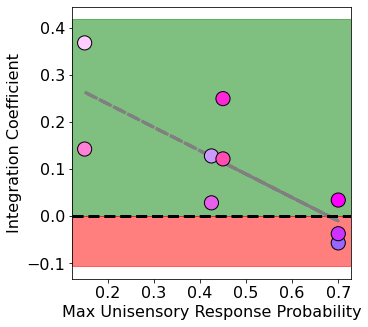

Trend line (Slope=-0.498, p=0.013)


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Function to calculate integration coefficients based on escape probability for a specific age group
def calculate_integration_coefficients(data, age_group):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        trials = data[stim]["age"]
        escapes = data[stim]["is_escape"]
        age_filter = (trials >= age_group[0]) & (trials <= age_group[1])
        
        # Calculate escape probability for the specified age group
        escape_count = np.sum(escapes[age_filter])
        total_trials = np.sum(age_filter)
        
        # Calculate probability or set to NaN if no trials meet the criteria
        probabilities[stim] = escape_count / total_trials if total_trials > 0 else np.nan

    coefficients = {}
    max_unisensory_probs = {}
    for stim in combined_stimuli:
        v_stim, a_stim = stim.split('_')
        v_prob = probabilities.get(v_stim, np.nan)
        a_prob = probabilities.get(a_stim, np.nan)
        if np.isnan(v_prob) or np.isnan(a_prob):
            coefficients[stim] = np.nan
            max_unisensory_probs[stim] = np.nan
        else:
            ep = max(v_prob, a_prob)
            op = probabilities.get(stim, np.nan)
            coefficient = (op - ep) / (op + ep) if (op + ep) != 0 else np.nan
            coefficients[stim] = coefficient
            max_unisensory_probs[stim] = ep  # Store the maximum unisensory probability
    return coefficients, max_unisensory_probs

# Calculate integration coefficients and max unisensory probabilities
coefficients, max_unisensory_probs = calculate_integration_coefficients(data, age_group)

# Prepare data for plotting and linear regression
x_values = []
y_values = []
colors = []

for stim in combined_stimuli:
    if stim in coefficients and stim in max_unisensory_probs:
        # Only include points that are not NaN
        if not np.isnan(coefficients[stim]) and not np.isnan(max_unisensory_probs[stim]):
            x_values.append(max_unisensory_probs[stim])
            y_values.append(coefficients[stim])
            colors.append(data["colors"][stim])  # Color for each multisensory combination

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
line_y = np.array(x_values) * slope + intercept  # Calculate trend line

# Plotting the scatterplot with trend line and background shading
plt.figure(figsize=(5, 5))

# Background shading: green above y=0, red below y=0
plt.axhspan(0, max(y_values) + 0.05, color='green', alpha=0.5, zorder=1)  # Low-opacity green above y=0
plt.axhspan(min(y_values) - 0.05, 0, color='red', alpha=0.5, zorder=1)    # Low-opacity red below y=0

# Plot the trend line behind the dots
plt.plot(x_values, line_y, color='gray', linestyle='--', label=f"Trend line (Slope={slope:.3f}, p={p_value:.3f})", linewidth=3, zorder=2)

# Scatter plot
plt.scatter(x_values, y_values, c=colors, s=200, zorder=3, edgecolors='black')  # Large dots, fill only

# Add horizontal line at y = 0
plt.axhline(y=0, color='black', linestyle='--', linewidth=3, zorder=4)

# Axis labels and title
plt.xlabel("Max Unisensory Response Probability", fontsize=16)
plt.ylabel("Integration Coefficient", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

# Print trendline details
print(f"Trend line (Slope={slope:.3f}, p={p_value:.3f})")

In [68]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Function to calculate integration coefficients based on escape probability for a specific age group
def calculate_integration_coefficients(data, age_group):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        trials = data[stim]["age"]
        escapes = data[stim]["is_escape"]
        age_filter = (trials >= age_group[0]) & (trials <= age_group[1])
        
        # Calculate escape probability for the specified age group
        escape_count = np.sum(escapes[age_filter])
        total_trials = np.sum(age_filter)
        
        # Calculate probability or set to NaN if no trials meet the criteria
        probabilities[stim] = escape_count / total_trials if total_trials > 0 else np.nan

    coefficients = {}
    for stim in combined_stimuli:
        v_stim, a_stim = stim.split('_')
        v_prob = probabilities.get(v_stim, np.nan)
        a_prob = probabilities.get(a_stim, np.nan)
        if np.isnan(v_prob) or np.isnan(a_prob):
            coefficients[stim] = np.nan
        else:
            ep = max(v_prob, a_prob)
            op = probabilities.get(stim, np.nan)
            coefficient = (op - ep) / (op + ep) if (op + ep) != 0 else np.nan
            coefficients[stim] = coefficient
    return coefficients

# Prepare data for GLM
def prepare_glm_data(coefficients):
    data = []
    for stim in coefficients:
        v_stim, a_stim = stim.split('_')
        v_intensity = visual_stimuli.index(v_stim) + 1
        a_intensity = auditory_stimuli.index(a_stim) + 1
        data.append([v_intensity, a_intensity, coefficients[stim]])
    return pd.DataFrame(data, columns=['Visual_Intensity', 'Auditory_Intensity', 'Integration_Coefficient'])

# Run GLM and print summary
def run_glm(df, age_label):
    df = df.dropna()  # Drop rows with NaN coefficients
    X = df[['Visual_Intensity', 'Auditory_Intensity']]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = df['Integration_Coefficient']
    model = sm.GLM(y, X, family=sm.families.Gaussian())
    results = model.fit()
    print(f"GLM Results for Escape Probability Integration Coefficient ({age_label})")
    print(results.summary())
    print("\n")

# Calculate coefficients and run GLM for age group 4-6 days
escape_coefficients = calculate_integration_coefficients(data, age_group)

# Prepare data and run GLM for this age group
escape_df = prepare_glm_data(escape_coefficients)
run_glm(escape_df, "Ages 4-6 Days")


GLM Results for Escape Probability Integration Coefficient (Ages 4-6 Days)
                    Generalized Linear Model Regression Results                    
Dep. Variable:     Integration_Coefficient   No. Observations:                    9
Model:                                 GLM   Df Residuals:                        6
Model Family:                     Gaussian   Df Model:                            2
Link Function:                    identity   Scale:                        0.011591
Method:                               IRLS   Log-Likelihood:                 9.1129
Date:                     Wed, 30 Oct 2024   Deviance:                     0.069548
Time:                             13:49:11   Pearson chi2:                   0.0695
No. Iterations:                          3   Pseudo R-squ. (CS):             0.5682
Covariance Type:                 nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975

In [69]:
import numpy as np
from scipy import stats
import pandas as pd
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Function to calculate integration coefficients based on escape probability for a specific age group
def calculate_integration_coefficients(data, age_group):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        trials = data[stim]["age"]
        escapes = data[stim]["is_escape"]
        age_filter = (trials >= age_group[0]) & (trials <= age_group[1])
        
        # Calculate escape probability for the specified age group
        escape_count = np.sum(escapes[age_filter])
        total_trials = np.sum(age_filter)
        
        # Calculate probability or set to NaN if no trials meet the criteria
        probabilities[stim] = escape_count / total_trials if total_trials > 0 else np.nan

    coefficients = {}
    for stim in combined_stimuli:
        v_stim, a_stim = stim.split('_')
        v_prob = probabilities.get(v_stim, np.nan)
        a_prob = probabilities.get(a_stim, np.nan)
        if np.isnan(v_prob) or np.isnan(a_prob):
            coefficients[stim] = np.nan
        else:
            ep = max(v_prob, a_prob)
            op = probabilities.get(stim, np.nan)
            coefficient = (op - ep) / (op + ep) if (op + ep) != 0 else np.nan
            coefficients[stim] = coefficient
    return coefficients

# Define age group

# Calculate integration coefficients for this age group
coefficients = calculate_integration_coefficients(data, age_group)

# Remove NaN values and prepare the data for t-test
coef_values = np.array([coef for coef in coefficients.values() if not np.isnan(coef)])

# Perform one-sample t-test to check if the mean of the integration coefficients is greater than 0
t_stat, p_value = stats.ttest_1samp(coef_values, 0, alternative='greater')

# Output the test result
print("===== One-Sample t-Test for Integration Coefficients (Testing > 0) =====")
print(f"Mean of Integration Coefficients: {np.mean(coef_values):.3f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")
print("=====================================================================")

# Interpretation based on p-value
alpha = 0.05
if p_value < alpha:
    print(f"The integration coefficients are significantly greater than 0 (p < {alpha}).")
else:
    print(f"The integration coefficients are not significantly greater than 0 (p >= {alpha}).")


===== One-Sample t-Test for Integration Coefficients (Testing > 0) =====
Mean of Integration Coefficients: 0.109
T-statistic: 2.391
P-value: 0.022
The integration coefficients are significantly greater than 0 (p < 0.05).


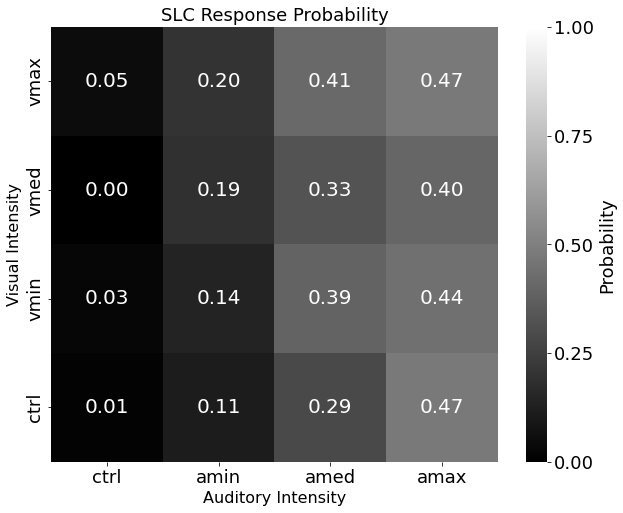

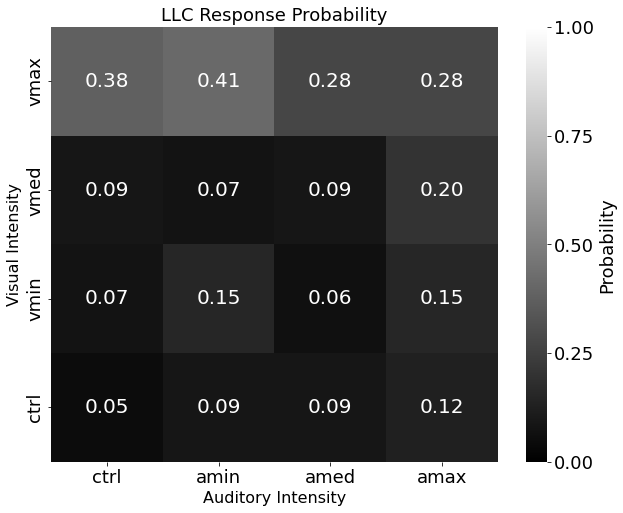

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Define stimulus intensities and combinations, including unisensory stimuli and control
auditory_stimuli = ['ctrl', 'amin', 'amed', 'amax']
visual_stimuli = ['ctrl', 'vmin', 'vmed', 'vmax']
combined_stimuli = ['ctrl', 'amin', 'amed', 'amax', 'vmin', 'vmed', 'vmax'] + [f"{v}_{a}" for v in visual_stimuli[1:] for a in auditory_stimuli[1:]]

# Function to calculate response probabilities
def calculate_response_probabilities(data, behavior_type):
    probabilities = {}
    for stim in combined_stimuli:
        behavior_count = np.sum(data[stim][behavior_type])
        total_trials = len(data[stim][behavior_type])
        probabilities[stim] = behavior_count / total_trials
    return probabilities

# Function to generate the heatmap
def plot_heatmap(probabilities, title):
    prob_matrix = np.full((4, 4), np.nan)
    stim_map = {
        'ctrl': (0, 0),
        'amin': (0, 1), 'amed': (0, 2), 'amax': (0, 3),
        'vmin': (1, 0), 'vmed': (2, 0), 'vmax': (3, 0)
    }
    for v, a in product(visual_stimuli[1:], auditory_stimuli[1:]):
        stim_map[f"{v}_{a}"] = (visual_stimuli.index(v), auditory_stimuli.index(a))

    for stim, (i, j) in stim_map.items():
        if stim in probabilities:
            prob_matrix[3 - i, j] = probabilities[stim]

    plt.figure(figsize=(10, 8))
    sns.heatmap(prob_matrix, annot=True, fmt=".2f", cmap="gray", xticklabels=auditory_stimuli, yticklabels=visual_stimuli[::-1], vmin=0, vmax=1, annot_kws={"size": 20}, cbar_kws={'label': 'Probability', 'ticks': [0, 0.25, 0.5, 0.75, 1], 'orientation': 'vertical'})
    plt.title(title, fontsize=18)
    plt.xlabel('Auditory Intensity', fontsize=16)
    plt.ylabel('Visual Intensity', fontsize=16)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Probability', size=18)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Calculate probabilities for SLC and LLC
slc_probabilities = calculate_response_probabilities(data, "SLC")
llc_probabilities = calculate_response_probabilities(data, "LLC")

# Plot heatmaps
plot_heatmap(slc_probabilities, "SLC Response Probability")
plot_heatmap(llc_probabilities, "LLC Response Probability")


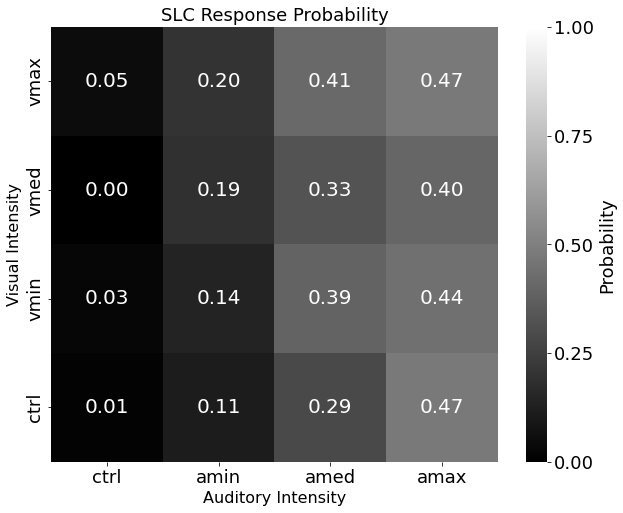

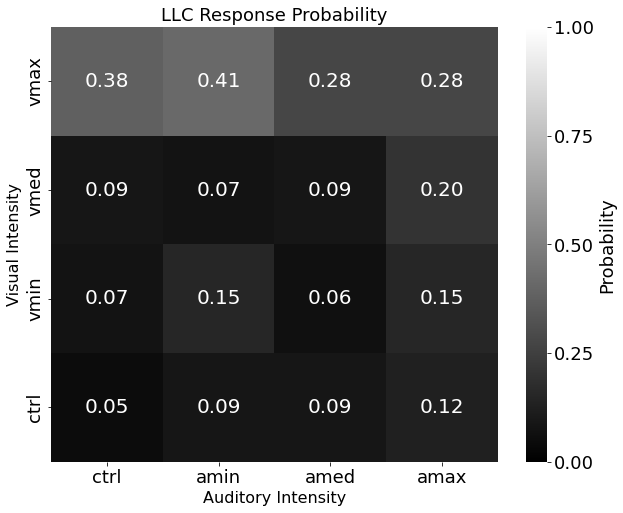

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Define stimulus intensities and combinations, including unisensory stimuli and control
auditory_stimuli = ['ctrl', 'amin', 'amed', 'amax']
visual_stimuli = ['ctrl', 'vmin', 'vmed', 'vmax']
combined_stimuli = ['ctrl', 'amin', 'amed', 'amax', 'vmin', 'vmed', 'vmax'] + [f"{v}_{a}" for v in visual_stimuli[1:] for a in auditory_stimuli[1:]]

# Function to calculate response probabilities
def calculate_response_probabilities(data, behavior_type):
    probabilities = {}
    for stim in combined_stimuli:
        behavior_count = np.sum(data[stim][behavior_type])
        total_trials = len(data[stim][behavior_type])
        probabilities[stim] = behavior_count / total_trials
    return probabilities

# Function to generate the heatmap
def plot_heatmap(probabilities, title):
    prob_matrix = np.full((4, 4), np.nan)
    stim_map = {
        'ctrl': (0, 0),
        'amin': (0, 1), 'amed': (0, 2), 'amax': (0, 3),
        'vmin': (1, 0), 'vmed': (2, 0), 'vmax': (3, 0)
    }
    for v, a in product(visual_stimuli[1:], auditory_stimuli[1:]):
        stim_map[f"{v}_{a}"] = (visual_stimuli.index(v), auditory_stimuli.index(a))

    for stim, (i, j) in stim_map.items():
        if stim in probabilities:
            prob_matrix[3 - i, j] = probabilities[stim]

    plt.figure(figsize=(10, 8))
    sns.heatmap(prob_matrix, annot=True, fmt=".2f", cmap="gray", xticklabels=auditory_stimuli, yticklabels=visual_stimuli[::-1], vmin=0, vmax=1, annot_kws={"size": 20}, cbar_kws={'label': 'Probability', 'ticks': [0, 0.25, 0.5, 0.75, 1], 'orientation': 'vertical'})
    plt.title(title, fontsize=18)
    plt.xlabel('Auditory Intensity', fontsize=16)
    plt.ylabel('Visual Intensity', fontsize=16)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Probability', size=18)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Calculate probabilities for SLC and LLC
slc_probabilities = calculate_response_probabilities(data, "SLC")
llc_probabilities = calculate_response_probabilities(data, "LLC")

# Plot heatmaps
plot_heatmap(slc_probabilities, "SLC Response Probability")
plot_heatmap(llc_probabilities, "LLC Response Probability")


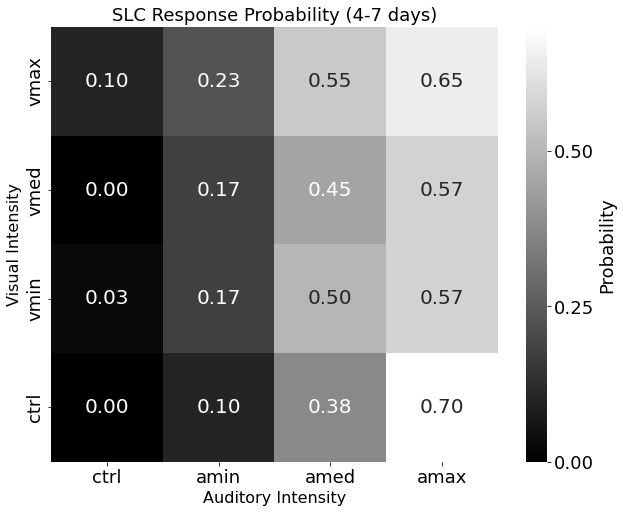

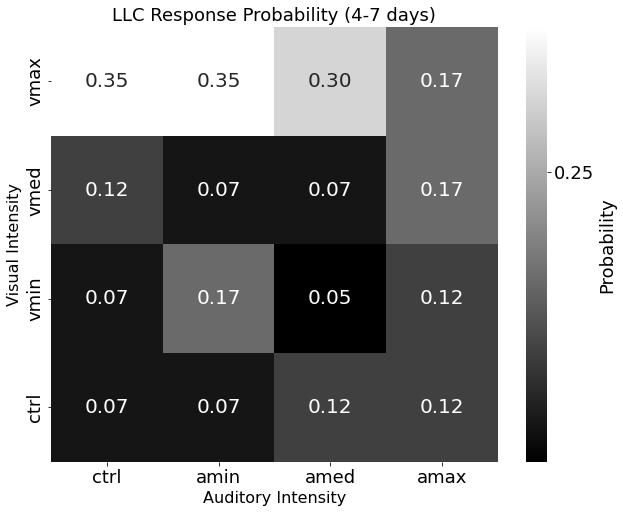

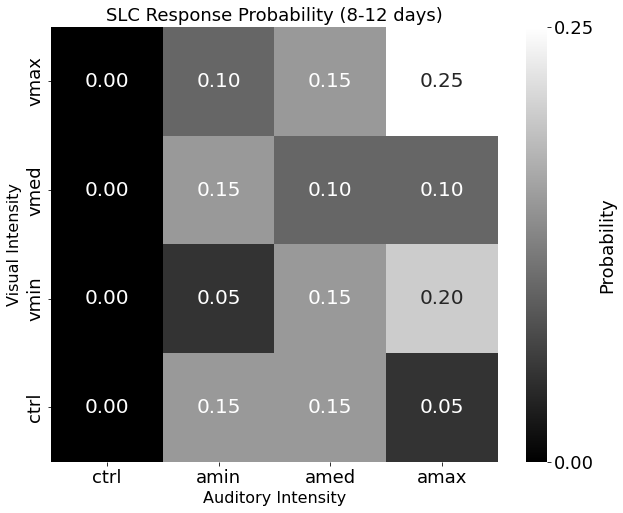

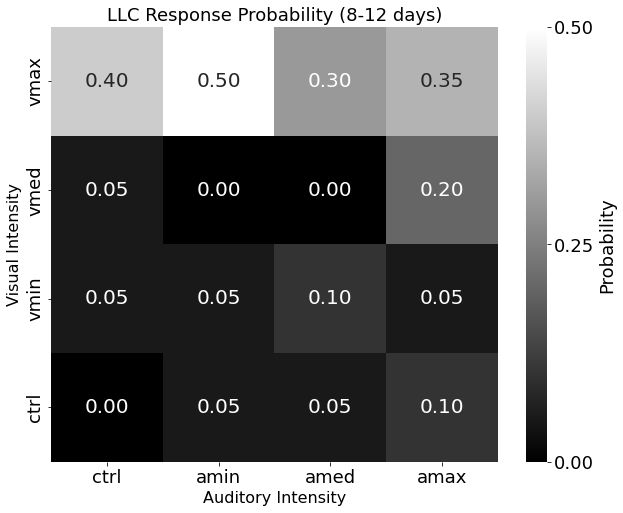

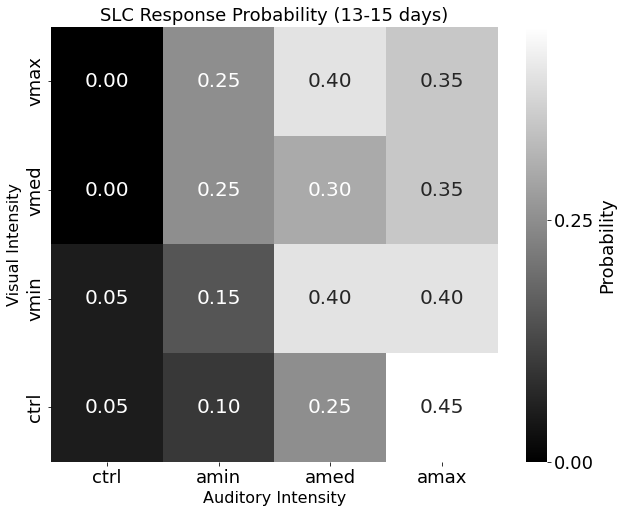

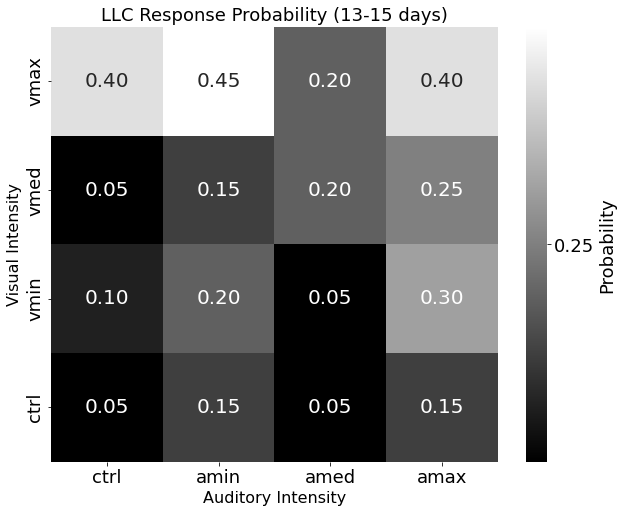

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Define stimulus intensities and combinations, including unisensory stimuli and control
auditory_stimuli = ['ctrl', 'amin', 'amed', 'amax']
visual_stimuli = ['ctrl', 'vmin', 'vmed', 'vmax']
combined_stimuli = ['ctrl', 'amin', 'amed', 'amax', 'vmin', 'vmed', 'vmax'] + [f"{v}_{a}" for v in visual_stimuli[1:] for a in auditory_stimuli[1:]]

# Function to calculate response probabilities by age
def calculate_response_probabilities_by_age(data, behavior_type, age_group):
    probabilities = {}
    for stim in combined_stimuli:
        trials = data[stim]["age"]
        behavior = data[stim][behavior_type]
        age_filter = (trials >= age_group[0]) & (trials <= age_group[1])
        behavior_count = np.sum(behavior[age_filter])
        total_trials = np.sum(age_filter)
        if total_trials > 0:
            probabilities[stim] = behavior_count / total_trials
        else:
            probabilities[stim] = np.nan  # No data for this age group
    return probabilities

# Function to generate the heatmap
def plot_heatmap(probabilities, title):
    prob_matrix = np.full((4, 4), np.nan)
    stim_map = {
        'ctrl': (0, 0),
        'amin': (0, 1), 'amed': (0, 2), 'amax': (0, 3),
        'vmin': (1, 0), 'vmed': (2, 0), 'vmax': (3, 0)
    }
    for v, a in product(visual_stimuli[1:], auditory_stimuli[1:]):
        stim_map[f"{v}_{a}"] = (visual_stimuli.index(v), auditory_stimuli.index(a))

    for stim, (i, j) in stim_map.items():
        if stim in probabilities:
            prob_matrix[3 - i, j] = probabilities[stim]

    plt.figure(figsize=(10, 8))
    sns.heatmap(prob_matrix, annot=True, fmt=".2f", cmap="gray", xticklabels=auditory_stimuli, yticklabels=visual_stimuli[::-1], annot_kws={"size": 20}, cbar_kws={'label': 'Probability', 'ticks': [0, 0.25, 0.5, 0.75, 1], 'orientation': 'vertical'})
    plt.title(title, fontsize=18)
    plt.xlabel('Auditory Intensity', fontsize=16)
    plt.ylabel('Visual Intensity', fontsize=16)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Probability', size=18)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Define age groups
age_groups = {
    "4-7 days": (4, 7),
    "8-12 days": (8, 12),
    "13-15 days": (13, 15)
}

# Plot heatmaps for each age group
for age_label, age_range in age_groups.items():
    slc_probabilities_age = calculate_response_probabilities_by_age(data, "SLC", age_range)
    llc_probabilities_age = calculate_response_probabilities_by_age(data, "LLC", age_range)

    plot_heatmap(slc_probabilities_age, f"SLC Response Probability ({age_label})")
    plot_heatmap(llc_probabilities_age, f"LLC Response Probability ({age_label})")

In [90]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Function to map visual and auditory stimuli to numeric values
def map_stimulus_to_numeric(visual, auditory):
    visual_map = {'ctrl': 0, 'vmin': 1, 'vmed': 2, 'vmax': 3}
    auditory_map = {'ctrl': 0, 'amin': 1, 'amed': 2, 'amax': 3}
    
    return visual_map[visual], auditory_map[auditory]

# Function to build the dataframe for GLM
def build_glm_dataframe(data, behavior_type, age_range):
    records = []
    
    # Loop through each stimulus condition
    for stim in combined_stimuli:
        trials = data[stim]["age"]
        behavior = data[stim][behavior_type]
        
        # Handle the stimulus cases
        if stim in auditory_stimuli:
            visual_component, auditory_component = 'ctrl', stim  # Auditory-only stimulus
        elif stim in visual_stimuli:
            visual_component, auditory_component = stim, 'ctrl'  # Visual-only stimulus
        else:
            # For combined stimuli, split into visual and auditory components
            visual_component, auditory_component = stim.split('_')
        
        # Filter trials by age
        age_filter = (trials >= age_range[0]) & (trials <= age_range[1])
        
        # Add data for each trial that matches the age filter
        for i, is_valid in enumerate(age_filter):
            if is_valid:
                visual_numeric, auditory_numeric = map_stimulus_to_numeric(visual_component, auditory_component)
                record = {
                    'response': behavior[i],  # 0 or 1 based on the behavior type
                    'visual_intensity': visual_numeric,  # Numeric visual intensity
                    'auditory_intensity': auditory_numeric,  # Numeric auditory intensity
                    'stimulus': stim,  # full stimulus code
                    'age': trials[i]  # fish age
                }
                records.append(record)
    
    # Convert to DataFrame
    df = pd.DataFrame(records)
    return df

# Function to run the binomial GLM for a given dataframe
def run_binomial_glm(df, behavior_type, age_label):
    # Fit a GLM model with binomial family (logistic regression)
    model = smf.glm(formula='response ~ visual_intensity + auditory_intensity', 
                    data=df, 
                    family=sm.families.Binomial()).fit()
    
    # Output summary results
    print(f"\n===== {behavior_type} Response Probability GLM Results (Age Group: {age_label}) =====")
    print(model.summary())
    
    return model

def calculate_mean_response_probability(df):
    # Group by visual and auditory intensities and calculate the mean response (probability)
    grouped = df.groupby(['visual_intensity', 'auditory_intensity'])['response'].mean().reset_index()
    
    # Rename the 'response' column to 'mean_response_probability' for clarity
    grouped.rename(columns={'response': 'mean_response_probability'}, inplace=True)
    
    return grouped

# Define age groups
age_groups = {
    "4-7 days": (4, 7),
    "8-12 days": (8, 12),
    "13-15 days": (13, 15)
}

# Loop through age groups and run GLM for both SLC and LLC
for age_label, age_range in age_groups.items():
    # SLC response
    slc_df = build_glm_dataframe(data, "SLC", age_range)
    
    slc_mean_probs = calculate_mean_response_probability(slc_df)
    
    print(f"\n===== Mean SLC Response Probability by Visual and Auditory Intensities (Age Group: {age_label}) =====")
    print(slc_mean_probs)
    
    slc_model = run_binomial_glm(slc_df, "SLC", age_label)
    
    # LLC response
    llc_df = build_glm_dataframe(data, "LLC", age_range)
    
    llc_mean_probs = calculate_mean_response_probability(llc_df)
    
    print(f"\n===== Mean LLC Response Probability by Visual and Auditory Intensities (Age Group: {age_label}) =====")
    print(llc_mean_probs)
    
    llc_model = run_binomial_glm(llc_df, "LLC", age_label)



===== Mean SLC Response Probability by Visual and Auditory Intensities (Age Group: 4-7 days) =====
    visual_intensity  auditory_intensity  mean_response_probability
0                  0                   0                      0.000
1                  0                   1                      0.100
2                  0                   2                      0.375
3                  0                   3                      0.700
4                  1                   0                      0.025
5                  1                   1                      0.175
6                  1                   2                      0.500
7                  1                   3                      0.575
8                  2                   0                      0.000
9                  2                   1                      0.175
10                 2                   2                      0.450
11                 2                   3                      0.575
12              

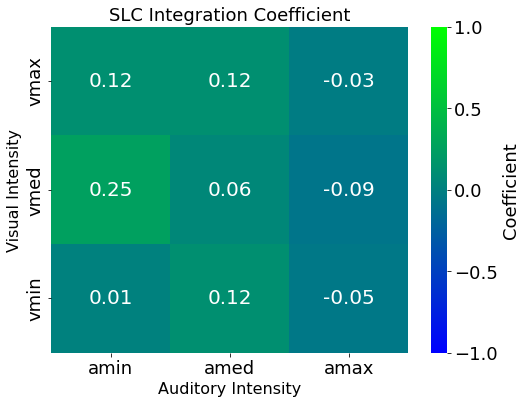

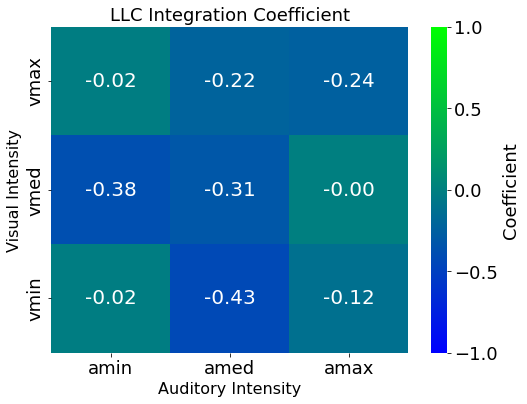

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from matplotlib.colors import LinearSegmentedColormap


# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Create a function to calculate response probabilities
def calculate_response_probabilities(data, behavior_type):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        behavior_count = np.sum(data[stim][behavior_type])
        total_trials = len(data[stim][behavior_type])
        probabilities[stim] = behavior_count / total_trials
    return probabilities

# Function to calculate integration coefficients
def calculate_integration_coefficients(data, behavior_type):
    probabilities = calculate_response_probabilities(data, behavior_type)
    coefficients = {}
    for stim in combined_stimuli:
        v_stim, a_stim = stim.split('_')
        v_prob = probabilities[v_stim]
        a_prob = probabilities[a_stim]
        ep = v_prob + a_prob - v_prob * a_prob
        op = probabilities[stim]
        coefficient = (op - ep) / (op + ep) if (op + ep) != 0 else np.nan
        coefficients[stim] = coefficient
    return coefficients

# Function to generate the heatmap
def plot_heatmap(coefficients, title):
    coef_matrix = np.full((3, 3), np.nan)
    for v, a in product(range(3), range(3)):
        stim = f"{visual_stimuli[v]}_{auditory_stimuli[a]}"
        if stim in coefficients:
            coef_matrix[2 - v, a] = coefficients[stim]

    plt.figure(figsize=(8, 6))
    custom_cmap = LinearSegmentedColormap.from_list("yellow_green", ["blue", "lime"])
    sns.heatmap(coef_matrix, annot=True, fmt=".2f", cmap=custom_cmap, xticklabels=auditory_stimuli, yticklabels=visual_stimuli[::-1], vmin=-1, vmax=1, annot_kws={"size": 20}, cbar_kws={'label': 'Coefficient', 'ticks': [-1, -0.5, 0, 0.5, 1], 'orientation': 'vertical'})
    plt.title(title, fontsize=18)
    plt.xlabel('Auditory Intensity', fontsize=16)
    plt.ylabel('Visual Intensity', fontsize=16)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Coefficient', size=18)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Calculate and plot integration coefficients for SLC and LLC
slc_coefficients = calculate_integration_coefficients(data, "SLC")
llc_coefficients = calculate_integration_coefficients(data, "LLC")

plot_heatmap(slc_coefficients, "SLC Integration Coefficient")
plot_heatmap(llc_coefficients, "LLC Integration Coefficient")


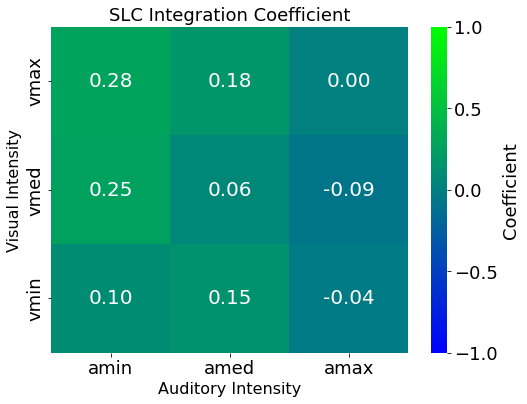

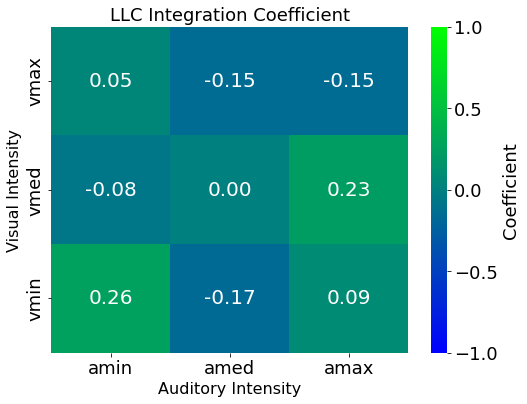

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Create a function to calculate response probabilities
def calculate_response_probabilities(data, behavior_type):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        behavior_count = np.sum(data[stim][behavior_type])
        total_trials = len(data[stim][behavior_type])
        probabilities[stim] = behavior_count / total_trials
    return probabilities

# Function to calculate integration coefficients
def calculate_integration_coefficients(data, behavior_type):
    probabilities = calculate_response_probabilities(data, behavior_type)
    coefficients = {}
    for stim in combined_stimuli:
        v_stim, a_stim = stim.split('_')
        v_prob = probabilities[v_stim]
        a_prob = probabilities[a_stim]
        ep = max(v_prob, a_prob)
        op = probabilities[stim]
        coefficient = (op - ep) / (op + ep) if (op + ep) != 0 else np.nan
        coefficients[stim] = coefficient
    return coefficients

# Function to generate the heatmap
def plot_heatmap(coefficients, title):
    coef_matrix = np.full((3, 3), np.nan)
    for v, a in product(range(3), range(3)):
        stim = f"{visual_stimuli[v]}_{auditory_stimuli[a]}"
        if stim in coefficients:
            coef_matrix[2 - v, a] = coefficients[stim]

    plt.figure(figsize=(8, 6))
    custom_cmap = LinearSegmentedColormap.from_list("yellow_green", ["blue", "lime"])
    sns.heatmap(coef_matrix, annot=True, fmt=".2f", cmap=custom_cmap, xticklabels=auditory_stimuli, yticklabels=visual_stimuli[::-1], vmin=-1, vmax=1, annot_kws={"size": 20}, cbar_kws={'label': 'Coefficient', 'ticks': [-1, -0.5, 0, 0.5, 1], 'orientation': 'vertical'})
    plt.title(title, fontsize=18)
    plt.xlabel('Auditory Intensity', fontsize=16)
    plt.ylabel('Visual Intensity', fontsize=16)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Coefficient', size=18)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Calculate and plot integration coefficients for SLC and LLC
slc_coefficients = calculate_integration_coefficients(data, "SLC")
llc_coefficients = calculate_integration_coefficients(data, "LLC")

plot_heatmap(slc_coefficients, "SLC Integration Coefficient")
plot_heatmap(llc_coefficients, "LLC Integration Coefficient")


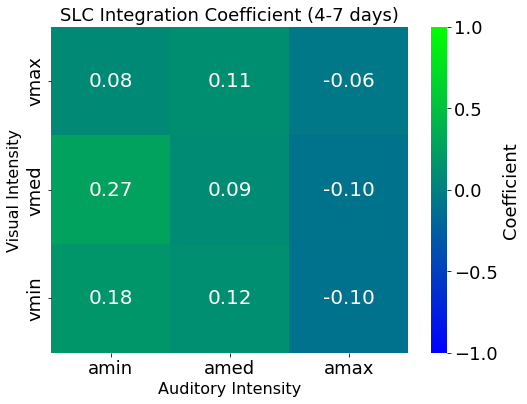

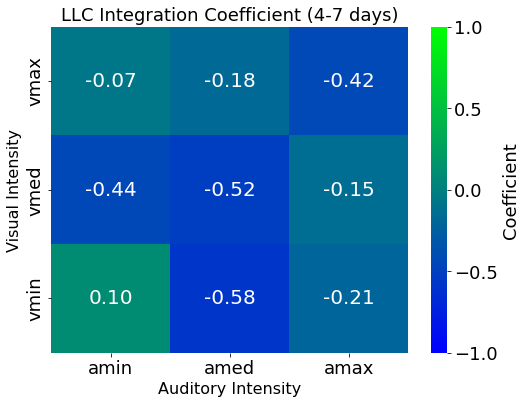

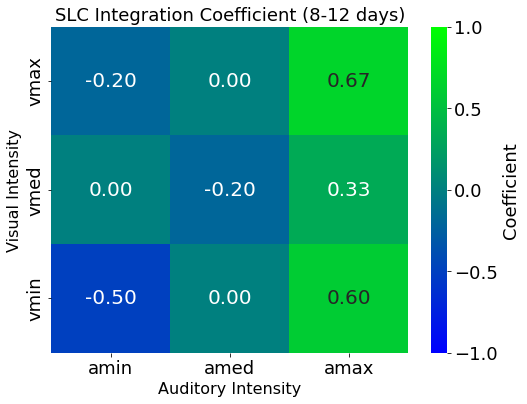

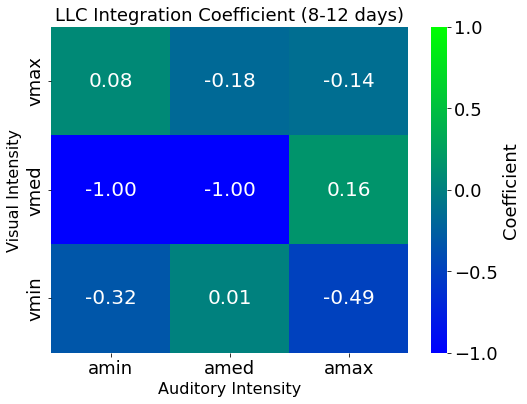

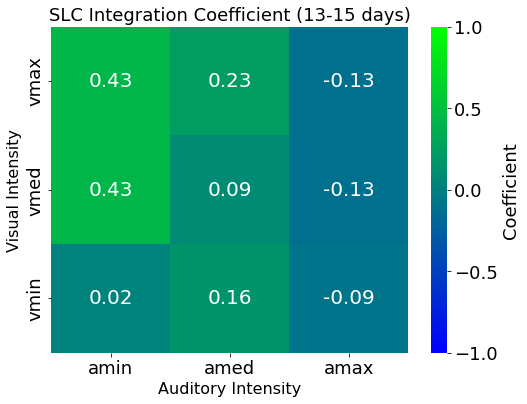

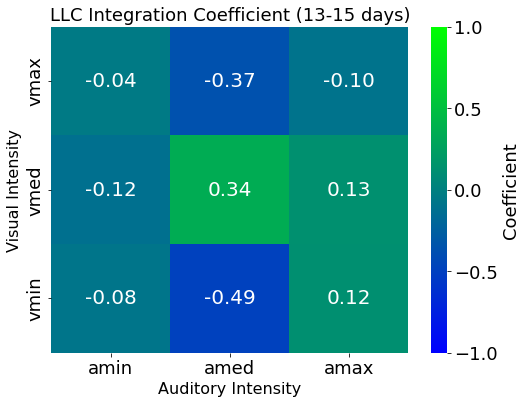

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Create a function to calculate response probabilities
def calculate_response_probabilities(data, behavior_type):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        behavior_count = np.sum(data[stim][behavior_type])
        total_trials = len(data[stim][behavior_type])
        probabilities[stim] = behavior_count / total_trials
    return probabilities

# Function to calculate integration coefficients by age
def calculate_integration_coefficients_by_age(data, behavior_type, age_group):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        trials = data[stim]["age"]
        behavior = data[stim][behavior_type]
        age_filter = (trials >= age_group[0]) & (trials <= age_group[1])
        behavior_count = np.sum(behavior[age_filter])
        total_trials = np.sum(age_filter)
        if total_trials > 0:
            probabilities[stim] = behavior_count / total_trials
        else:
            probabilities[stim] = np.nan  # No data for this age group

    coefficients = {}
    for stim in combined_stimuli:
        v_stim, a_stim = stim.split('_')
        v_prob = probabilities.get(v_stim, np.nan)
        a_prob = probabilities.get(a_stim, np.nan)
        if np.isnan(v_prob) or np.isnan(a_prob):
            coefficients[stim] = np.nan
        else:
            ep = v_prob + a_prob - v_prob * a_prob
            op = probabilities.get(stim, np.nan)
            coefficient = (op - ep) / (op + ep) if (op + ep) != 0 else np.nan
            coefficients[stim] = coefficient
    return coefficients

# Function to generate the heatmap
def plot_heatmap(coefficients, title):
    coef_matrix = np.full((3, 3), np.nan)
    for v, a in product(range(3), range(3)):
        stim = f"{visual_stimuli[v]}_{auditory_stimuli[a]}"
        if stim in coefficients:
            coef_matrix[2 - v, a] = coefficients[stim]

    plt.figure(figsize=(8, 6))
    custom_cmap = LinearSegmentedColormap.from_list("yellow_green", ["blue", "lime"])
    sns.heatmap(coef_matrix, annot=True, fmt=".2f", cmap=custom_cmap, xticklabels=auditory_stimuli, yticklabels=visual_stimuli[::-1], vmin=-1, vmax=1, annot_kws={"size": 20}, cbar_kws={'label': 'Coefficient', 'ticks': [-1, -0.5, 0, 0.5, 1], 'orientation': 'vertical'})
    plt.title(title, fontsize=18)
    plt.xlabel('Auditory Intensity', fontsize=16)
    plt.ylabel('Visual Intensity', fontsize=16)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Coefficient', size=18)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Define age groups
age_groups = {
    "4-7 days": (4, 7),
    "8-12 days": (8, 12),
    "13-15 days": (13, 15)
}

# Plot heatmaps for each age group
for age_label, age_range in age_groups.items():
    slc_coefficients_age = calculate_integration_coefficients_by_age(data, "SLC", age_range)
    llc_coefficients_age = calculate_integration_coefficients_by_age(data, "LLC", age_range)

    plot_heatmap(slc_coefficients_age, f"SLC Integration Coefficient ({age_label})")
    plot_heatmap(llc_coefficients_age, f"LLC Integration Coefficient ({age_label})")


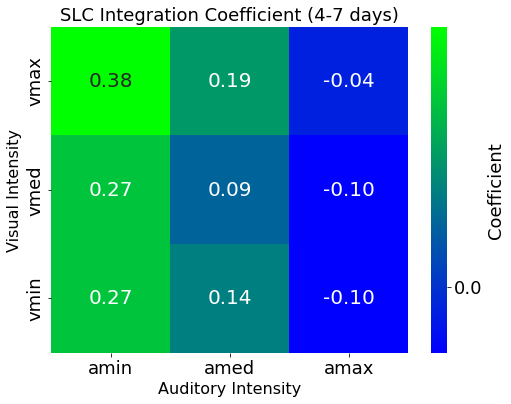

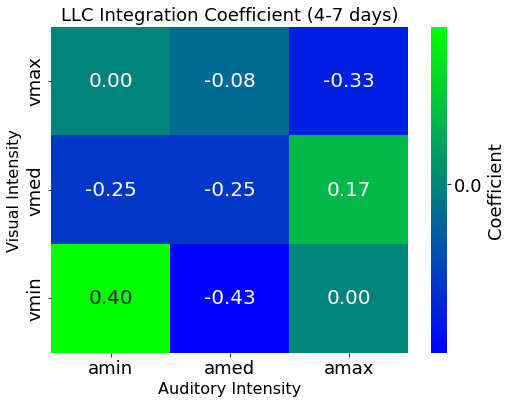

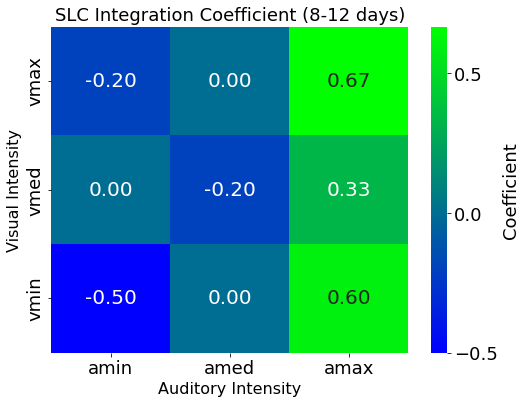

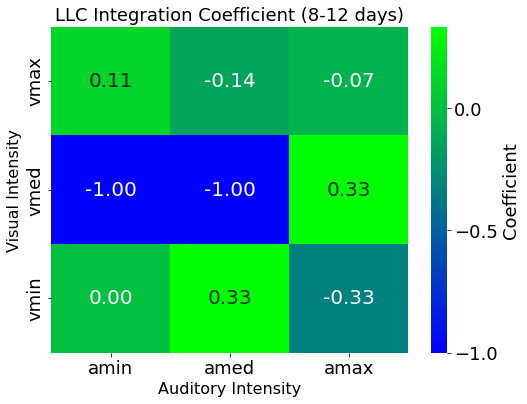

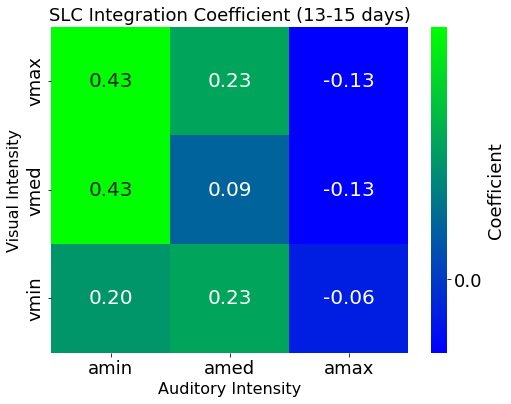

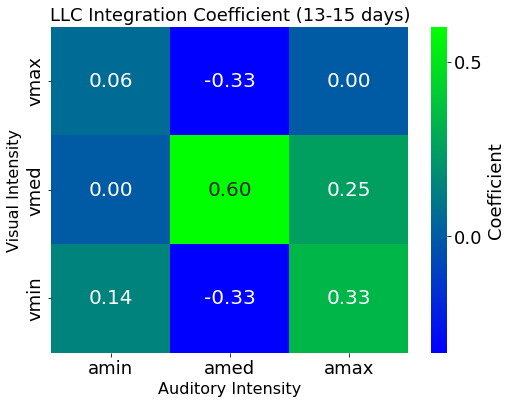

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Create a function to calculate response probabilities
def calculate_response_probabilities(data, behavior_type):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        behavior_count = np.sum(data[stim][behavior_type])
        total_trials = len(data[stim][behavior_type])
        probabilities[stim] = behavior_count / total_trials
    return probabilities

# Function to calculate integration coefficients by age
def calculate_integration_coefficients_by_age(data, behavior_type, age_group):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        trials = data[stim]["age"]
        behavior = data[stim][behavior_type]
        age_filter = (trials >= age_group[0]) & (trials <= age_group[1])
        behavior_count = np.sum(behavior[age_filter])
        total_trials = np.sum(age_filter)
        if total_trials > 0:
            probabilities[stim] = behavior_count / total_trials
        else:
            probabilities[stim] = np.nan  # No data for this age group

    coefficients = {}
    for stim in combined_stimuli:
        v_stim, a_stim = stim.split('_')
        v_prob = probabilities.get(v_stim, np.nan)
        a_prob = probabilities.get(a_stim, np.nan)
        if np.isnan(v_prob) or np.isnan(a_prob):
            coefficients[stim] = np.nan
        else:
            ep = max(v_prob, a_prob)
            op = probabilities.get(stim, np.nan)
            coefficient = (op - ep) / (op + ep) if (op + ep) != 0 else np.nan
            coefficients[stim] = coefficient
    return coefficients

# Function to generate the heatmap
def plot_heatmap(coefficients, title):
    coef_matrix = np.full((3, 3), np.nan)
    for v, a in product(range(3), range(3)):
        stim = f"{visual_stimuli[v]}_{auditory_stimuli[a]}"
        if stim in coefficients:
            coef_matrix[2 - v, a] = coefficients[stim]

    plt.figure(figsize=(8, 6))
    custom_cmap = LinearSegmentedColormap.from_list("yellow_green", ["blue", "lime"])
    sns.heatmap(coef_matrix, annot=True, fmt=".2f", cmap=custom_cmap, xticklabels=auditory_stimuli, yticklabels=visual_stimuli[::-1], annot_kws={"size": 20}, cbar_kws={'label': 'Coefficient', 'ticks': [-1, -0.5, 0, 0.5, 1], 'orientation': 'vertical'})
    plt.title(title, fontsize=18)
    plt.xlabel('Auditory Intensity', fontsize=16)
    plt.ylabel('Visual Intensity', fontsize=16)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Coefficient', size=18)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Define age groups
age_groups = {
    "4-7 days": (4, 7),
    "8-12 days": (8, 12),
    "13-15 days": (13, 15)
}

# Plot heatmaps for each age group
for age_label, age_range in age_groups.items():
    slc_coefficients_age = calculate_integration_coefficients_by_age(data, "SLC", age_range)
    llc_coefficients_age = calculate_integration_coefficients_by_age(data, "LLC", age_range)

    plot_heatmap(slc_coefficients_age, f"SLC Integration Coefficient ({age_label})")
    plot_heatmap(llc_coefficients_age, f"LLC Integration Coefficient ({age_label})")


In [95]:
import numpy as np
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Function to calculate the integration coefficient
def calculate_integration_coefficient(v, a, multi):
    base = max(v, a)
    integration_coeff = (multi - base) / (multi + base)
    return integration_coeff

# Function to perform bootstrap resampling and calculate integration coefficients
def bootstrap_integration_coefficients(data, stim_multi, stim_v, stim_a, age_group, behavior_type, n_bootstrap=1000):
    integration_coefficients = []
    
    multi_responses = data[stim_multi][behavior_type]
    v_responses = data[stim_v][behavior_type]
    a_responses = data[stim_a][behavior_type]
    
    ages_multi = data[stim_multi]["age"]
    ages_v = data[stim_v]["age"]
    ages_a = data[stim_a]["age"]
    
    age_filter_multi = (ages_multi >= age_group[0]) & (ages_multi <= age_group[1])
    age_filter_v = (ages_v >= age_group[0]) & (ages_v <= age_group[1])
    age_filter_a = (ages_a >= age_group[0]) & (ages_a <= age_group[1])
    
    multi_responses = multi_responses[age_filter_multi]
    v_responses = v_responses[age_filter_v]
    a_responses = a_responses[age_filter_a]
    
    n_trials = len(multi_responses)
    
    for _ in range(n_bootstrap):
        resample_indices = np.random.choice(np.arange(n_trials), size=n_trials, replace=True)
        
        multi_prob = np.mean(multi_responses[resample_indices])
        v_prob = np.mean(v_responses[resample_indices])
        a_prob = np.mean(a_responses[resample_indices])
        
        integration_coeff = calculate_integration_coefficient(v_prob, a_prob, multi_prob)
        integration_coefficients.append(integration_coeff)
    
    return np.array(integration_coefficients)

def compute_confidence_interval(coefficients, alpha):
    lower_bound = np.percentile(coefficients, 100 * (alpha / 2))
    upper_bound = np.percentile(coefficients, 100 * (1 - (alpha / 2)))
    return lower_bound, upper_bound

# Define age groups
age_groups = {
    "4-7 days": (4, 7),
    "8-12 days": (8, 12),
    "13-15 days": (13, 15)
}

# Bonferroni corrected alpha value
alpha = 0.05 / 9

# Calculate and print confidence intervals for each behavior and age group
for age_label, age_range in age_groups.items():
    print(f"Age Group: {age_label}")
    
    for behavior_type in ["SLC", "LLC"]:
        print(f"Behavior Type: {behavior_type}")
        
        for stim_multi in combined_stimuli:
            stim_v, stim_a = stim_multi.split('_')
            
            coefficients = bootstrap_integration_coefficients(data, stim_multi, stim_v, stim_a, age_range, behavior_type)
            lower_bound, upper_bound = compute_confidence_interval(coefficients, alpha)
            mean_coeff = np.mean(coefficients)
            
            ci_str = f"({lower_bound:.3f}, {upper_bound:.3f})"
            if lower_bound > 0 or upper_bound < 0:
                ci_str += " *"
            
            print(f"{data['stim_labels'][stim_multi]}: {mean_coeff:.3f} {ci_str}")
        
        print("-" * 40)


Age Group: 4-7 days
Behavior Type: SLC
Vis Min + Aud Min: 0.265 (-0.559, 1.000)
Vis Min + Aud Med: 0.146 (-0.167, 0.521)
Vis Min + Aud Max: -0.094 (-0.319, 0.126)
Vis Med + Aud Min: 0.284 (-0.600, 1.000)
Vis Med + Aud Med: 0.089 (-0.270, 0.382)
Vis Min + Aud Max: -0.096 (-0.299, 0.106)
Vis Max + Aud Min: 0.310 (-0.333, 0.845)
Vis Max + Aud Med: 0.192 (-0.152, 0.508)
Vis Max + Aud Max: -0.038 (-0.270, 0.147)
----------------------------------------
Behavior Type: LLC
Vis Min + Aud Min: 0.268 (-0.445, 0.756)
Vis Min + Aud Med: -0.467 (-1.000, 0.333)
Vis Min + Aud Max: -0.037 (-0.778, 0.615)
Vis Med + Aud Min: -0.284 (-1.000, 0.750)
Vis Med + Aud Med: -0.369 (-1.000, 0.211)
Vis Min + Aud Max: 0.060 (-0.600, 0.636)
Vis Max + Aud Min: -0.011 (-0.400, 0.339)
Vis Max + Aud Med: -0.086 (-0.500, 0.339)
Vis Max + Aud Max: -0.345 (-0.792, 0.069)
----------------------------------------
Age Group: 8-12 days
Behavior Type: SLC
Vis Min + Aud Min: nan (nan, nan)
Vis Min + Aud Med: nan (nan, nan)
Vis 

C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Vis Min + Aud Max: nan (nan, nan)
Vis Max + Aud Min: nan (nan, nan)
Vis Max + Aud Med: nan (nan, nan)
Vis Max + Aud Max: nan (nan, nan)
----------------------------------------
Behavior Type: LLC
Vis Min + Aud Min: nan (nan, nan)
Vis Min + Aud Med: nan (nan, nan)
Vis Min + Aud Max: nan (nan, nan)
Vis Med + Aud Min: nan (nan, nan)
Vis Med + Aud Med: nan (nan, nan)
Vis Min + Aud Max: 0.251 (-1.000, 1.000)
Vis Max + Aud Min: 0.110 (-0.303, 0.571)
Vis Max + Aud Med: -0.144 (-0.761, 0.400)
Vis Max + Aud Max: -0.077 (-0.643, 0.445)
----------------------------------------
Age Group: 13-15 days
Behavior Type: SLC
Vis Min + Aud Min: nan (nan, nan)
Vis Min + Aud Med: 0.239 (-0.387, 0.822)
Vis Min + Aud Max: -0.064 (-0.667, 0.388)
Vis Med + Aud Min: 0.435 (-0.806, 1.000)
Vis Med + Aud Med: 0.112 (-0.500, 0.722)
Vis Min + Aud Max: -0.130 (-0.636, 0.333)
Vis Max + Aud Min: 0.418 (-0.600, 1.000)
Vis Max + Aud Med: 0.246 (-0.434, 1.000)
Vis Max + Aud Max: -0.128 (-0.692, 0.474)
---------------------

In [96]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Function to calculate integration coefficients by age
def calculate_integration_coefficients_by_age(data, behavior_type, age_group):
    probabilities = {}
    for stim in combined_stimuli + auditory_stimuli + visual_stimuli + ['ctrl']:
        trials = data[stim]["age"]
        behavior = data[stim][behavior_type]
        age_filter = (trials >= age_group[0]) & (trials <= age_group[1])
        behavior_count = np.sum(behavior[age_filter])
        total_trials = np.sum(age_filter)
        if total_trials > 0:
            probabilities[stim] = behavior_count / total_trials
        else:
            probabilities[stim] = np.nan  # No data for this age group

    coefficients = {}
    for stim in combined_stimuli:
        v_stim, a_stim = stim.split('_')
        v_prob = probabilities.get(v_stim, np.nan)
        a_prob = probabilities.get(a_stim, np.nan)
        if np.isnan(v_prob) or np.isnan(a_prob):
            coefficients[stim] = np.nan
        else:
            ep = max(v_prob, a_prob)
            op = probabilities.get(stim, np.nan)
            coefficient = (op - ep) / (op + ep) if (op + ep) != 0 else np.nan
            coefficients[stim] = coefficient
    return coefficients

# Define age groups
age_groups = {
    "4-7 days": (4, 7),
    "8-12 days": (8, 12),
    "13-15 days": (13, 15)
}

# Prepare data for GLM
def prepare_glm_data(coefficients):
    data = []
    for stim in coefficients:
        v_stim, a_stim = stim.split('_')
        v_intensity = visual_stimuli.index(v_stim) + 1
        a_intensity = auditory_stimuli.index(a_stim) + 1
        data.append([v_intensity, a_intensity, coefficients[stim]])
    return pd.DataFrame(data, columns=['Visual_Intensity', 'Auditory_Intensity', 'Integration_Coefficient'])

# Run GLM and print summary
def run_glm(df, age_label, behavior_type):
    df = df.dropna()
    X = df[['Visual_Intensity', 'Auditory_Intensity']]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = df['Integration_Coefficient']
    model = sm.GLM(y, X, family=sm.families.Gaussian())
    results = model.fit()
    print(f"GLM Results for {behavior_type} ({age_label})")
    print(results.summary())
    print("\n")

# Calculate coefficients and run GLM for each age group and behavior type
for age_label, age_range in age_groups.items():
    slc_coefficients_age = calculate_integration_coefficients_by_age(data, "SLC", age_range)
    llc_coefficients_age = calculate_integration_coefficients_by_age(data, "LLC", age_range)

    slc_df = prepare_glm_data(slc_coefficients_age)
    llc_df = prepare_glm_data(llc_coefficients_age)

    run_glm(slc_df, age_label, "SLC")
    run_glm(llc_df, age_label, "LLC")


GLM Results for SLC (4-7 days)
                    Generalized Linear Model Regression Results                    
Dep. Variable:     Integration_Coefficient   No. Observations:                    9
Model:                                 GLM   Df Residuals:                        6
Model Family:                     Gaussian   Df Model:                            2
Link Function:                    identity   Scale:                       0.0014807
Method:                               IRLS   Log-Likelihood:                 18.373
Date:                     Wed, 30 Oct 2024   Deviance:                    0.0088845
Time:                             14:09:09   Pearson chi2:                  0.00888
No. Iterations:                          3   Pseudo R-squ. (CS):              1.000
Covariance Type:                 nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

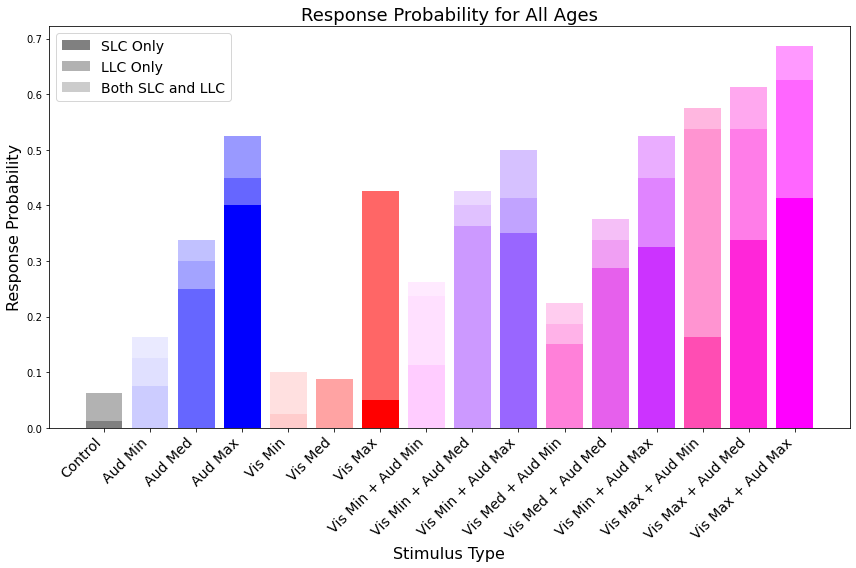

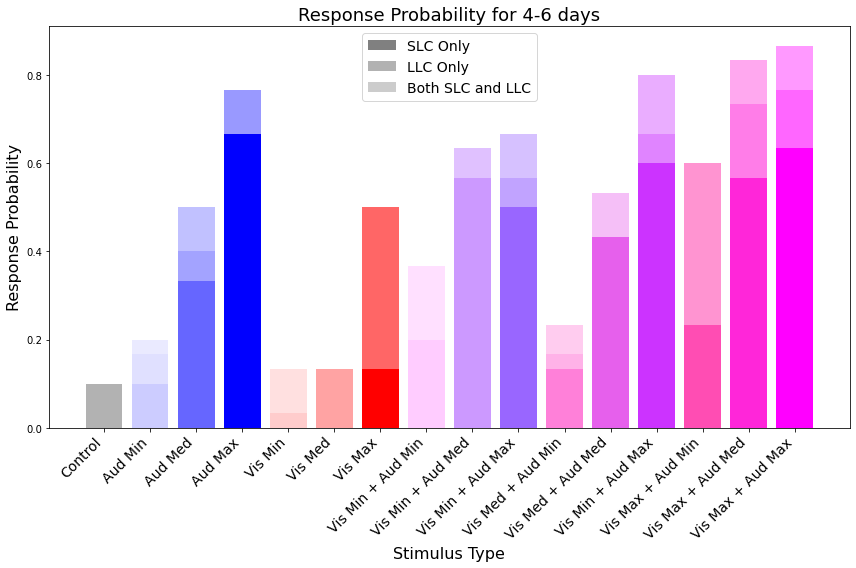

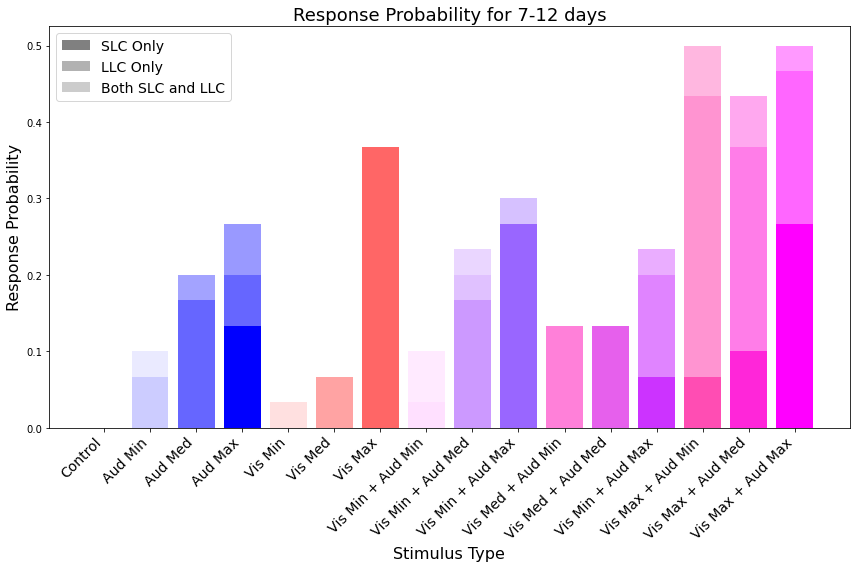

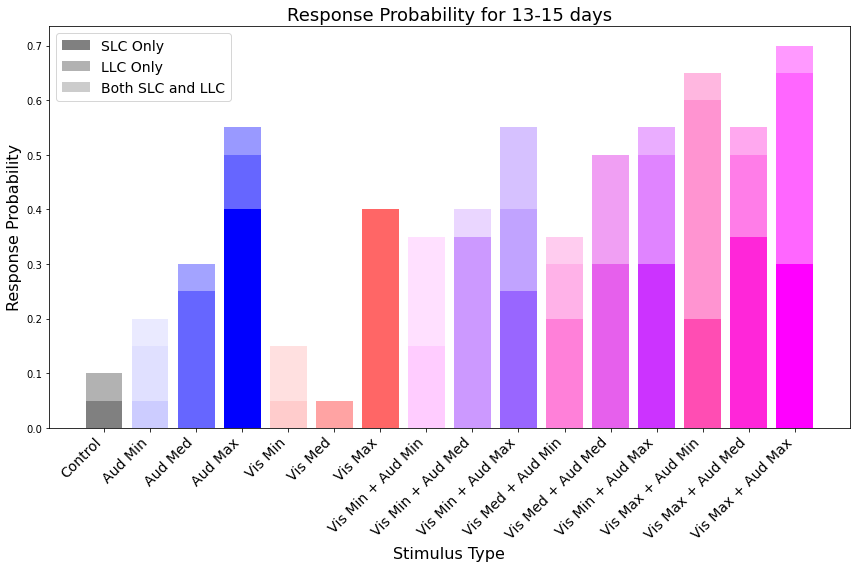

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Define stimulus intensities and combinations
auditory_stimuli = ['amin', 'amed', 'amax']
visual_stimuli = ['vmin', 'vmed', 'vmax']
all_stims = ['ctrl', 'amin', 'amed', 'amax', 'vmin', 'vmed', 'vmax'] + [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

# Define a function to calculate the proportions of SLC-only, LLC-only, and both
def calculate_proportions(data, stims):
    proportions = {}
    for stim in stims:
        total_trials = len(data[stim]['SLC'])
        slc_only = np.sum((data[stim]['SLC']) & (~data[stim]['LLC'])) / total_trials
        llc_only = np.sum((~data[stim]['SLC']) & (data[stim]['LLC'])) / total_trials
        both = np.sum((data[stim]['SLC']) & (data[stim]['LLC'])) / total_trials
        proportions[stim] = {'SLC_only': slc_only, 'LLC_only': llc_only, 'both': both}
    return proportions

# Define a function to plot the stacked bar plot
def plot_stacked_bar(proportions, title):
    labels = [data['stim_labels'][stim] for stim in proportions.keys()]
    slc_only = [proportions[stim]['SLC_only'] for stim in proportions.keys()]
    llc_only = [proportions[stim]['LLC_only'] for stim in proportions.keys()]
    both = [proportions[stim]['both'] for stim in proportions.keys()]
    
    x = np.arange(len(proportions))
    width = 0.8

    fig, ax = plt.subplots(figsize=(12, 8))

    bars1 = ax.bar(x, slc_only, width, label='SLC Only', color=[data['colors'][stim] for stim in proportions.keys()])
    bars2 = ax.bar(x, llc_only, width, bottom=slc_only, label='LLC Only', color=[data['colors'][stim] for stim in proportions.keys()], alpha=0.6)
    bars3 = ax.bar(x, both, width, bottom=np.array(slc_only) + np.array(llc_only), label='Both SLC and LLC', color=[data['colors'][stim] for stim in proportions.keys()], alpha=0.4)

    ax.set_xlabel('Stimulus Type', fontsize=16)
    ax.set_ylabel('Response Probability', fontsize=16)
    ax.set_title(title, fontsize=18)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
    ax.legend(fontsize=14)
    plt.tight_layout()
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Calculate proportions for all ages
all_ages_proportions = calculate_proportions(data, all_stims)
plot_stacked_bar(all_ages_proportions, 'Response Probability for All Ages')

# Define a function to filter data by age group
def filter_data_by_age(data, age_range):
    filtered_data = {}
    for stim in all_stims:
        age_filter = (data[stim]['age'] >= age_range[0]) & (data[stim]['age'] <= age_range[1])
        filtered_data[stim] = {
            'SLC': data[stim]['SLC'][age_filter],
            'LLC': data[stim]['LLC'][age_filter],
            'age': data[stim]['age'][age_filter]
        }
    return filtered_data

# Define age groups
age_groups = {
    "4-6 days": (4, 6),
    "7-12 days": (7, 12),
    "13-15 days": (13, 15)
}

# Calculate and plot proportions for each age group
for age_label, age_range in age_groups.items():
    filtered_data = filter_data_by_age(data, age_range)
    age_group_proportions = calculate_proportions(filtered_data, all_stims)
    plot_stacked_bar(age_group_proportions, f'Response Probability for {age_label}')


C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\ipykernel_launcher.py:49: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\ipykernel_launcher.py:54: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


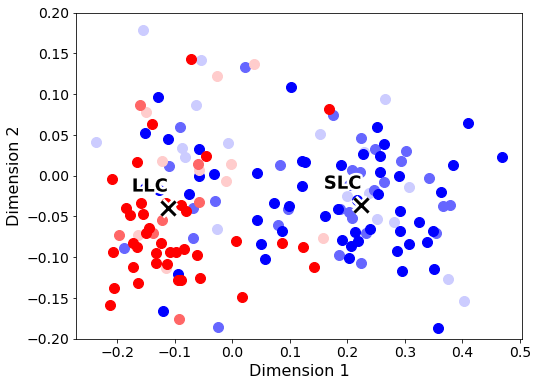

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Define unisensory stimuli
unisensory_stims = ['amin', 'amed', 'amax', 'vmin', 'vmed', 'vmax']

# Extract the events that happened inside the stimulation window
def extract_events_within_window(data):
    all_events = []
    for stim in unisensory_stims:
        stim_time = data['stim_time']
        window_start = data['window_start']
        window_end = data['window_end']
        for trial_index in range(len(data[stim]['valid_event_times'])):
            event_times = data[stim]['valid_event_times'][trial_index]
            events = data[stim]['events_in_low_dim'][trial_index]
            behavior_types = data[stim]['behavior_type'][trial_index]
            # Filter events within the stimulation window
            within_window = (event_times >= window_start) & (event_times <= window_end)
            events_within_window = events[within_window]
            behaviors_within_window = behavior_types[within_window]
            stim_color = data['colors'][stim]
            for i, event in enumerate(events_within_window):
                all_events.append({
                    'event': event,
                    'behavior_type': behaviors_within_window[i],
                    'stim': stim,
                    'color': stim_color
                })
    return all_events

# Calculate the median centers for SLC and LLC events
def calculate_median_centers(events):
    slc_events = [e['event'] for e in events if e['behavior_type'] == 1]
    llc_events = [e['event'] for e in events if e['behavior_type'] == 0]
    slc_median = np.median(slc_events, axis=0) if slc_events else np.array([np.nan, np.nan])
    llc_median = np.median(llc_events, axis=0) if llc_events else np.array([np.nan, np.nan])
    return slc_median, llc_median

# Plot the events with the median centers
def plot_events_with_medians(events, slc_median, llc_median):
    plt.figure(figsize=(8, 6))
    
    for event in events:
        plt.scatter(event['event'][0], event['event'][1], color=event['color'], s=100)

    if not np.isnan(slc_median).any():
        plt.scatter(slc_median[0], slc_median[1], color='white', s=200, marker='x', linewidths=8, edgecolors='white')
        plt.scatter(slc_median[0], slc_median[1], color='black', s=200, marker='x', linewidths=3)
        text_slc = plt.text(slc_median[0], slc_median[1] + 0.02, 'SLC', fontsize=18, ha='right', fontweight='bold')
        text_slc.set_path_effects([path_effects.Stroke(linewidth=5, foreground='white'), path_effects.Normal()])
    if not np.isnan(llc_median).any():
        plt.scatter(llc_median[0], llc_median[1], color='white', s=200, marker='x', linewidths=8, edgecolors='white')
        plt.scatter(llc_median[0], llc_median[1], color='black', s=200, marker='x', linewidths=3)
        text_llc = plt.text(llc_median[0], llc_median[1] + 0.02, 'LLC', fontsize=18, ha='right', fontweight='bold')
        text_llc.set_path_effects([path_effects.Stroke(linewidth=5, foreground='white'), path_effects.Normal()])

    plt.xlabel('Dimension 1', fontsize=16)
    plt.ylabel('Dimension 2', fontsize=16)
    #plt.title('2D Representation of Events During Stimulation Window', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-.2,.2)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Extract events and calculate medians
events = extract_events_within_window(data)
slc_median, llc_median = calculate_median_centers(events)

# Plot the events with median centers
plot_events_with_medians(events, slc_median, llc_median)


cluster 1 n 338
cluster 2 n 216


C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\ipykernel_launcher.py:80: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\ipykernel_launcher.py:85: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


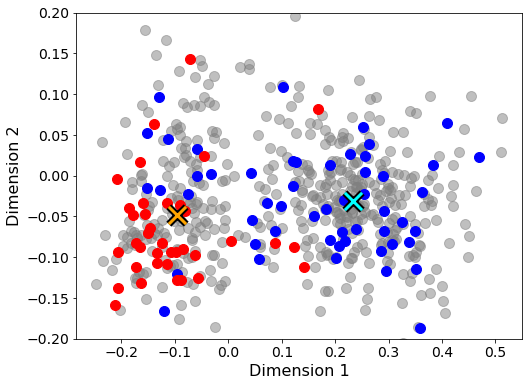

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from scipy.spatial import ConvexHull

# Define stimuli
all_stims = ['ctrl', 'amin', 'amed', 'amax', 'vmin', 'vmin_amin', 'vmin_amed', 'vmin_amax', 'vmed', 'vmed_amin', 'vmed_amed', 'vmed_amax', 'vmax', 'vmax_amin', 'vmax_amed', 'vmax_amax']

# Extract the events that happened inside the stimulation window
def extract_events_within_window(data):
    all_events = []
    for stim in all_stims:
        stim_time = data['stim_time']
        window_start = data['window_start']
        window_end = data['window_end']
        for trial_index in range(len(data[stim]['valid_event_times'])):
            event_times = data[stim]['valid_event_times'][trial_index]
            events = data[stim]['events_in_low_dim'][trial_index]
            behavior_types = data[stim]['behavior_type'][trial_index]
            # Filter events within the stimulation window
            within_window = (event_times >= window_start) & (event_times <= window_end)
            events_within_window = events[within_window]
            behaviors_within_window = behavior_types[within_window]
            stim_color = data['colors'][stim] if stim in ['vmax', 'amax'] else (0.5, 0.5, 0.5, 0.5) # gray for others
            for i, event in enumerate(events_within_window):
                if behaviors_within_window[i] in [0, 1]:  # Only include Cluster 1 and Cluster 2
                    all_events.append({
                        'event': event,
                        'behavior_type': behaviors_within_window[i],
                        'stim': stim,
                        'color': stim_color
                    })
    return all_events

# Calculate the median centers for Cluster 1 and Cluster 2 events
def calculate_median_centers(events):
    cluster1_events = [e['event'] for e in events if e['behavior_type'] == 1]
    cluster2_events = [e['event'] for e in events if e['behavior_type'] == 0]
    cluster1_median = np.median(cluster1_events, axis=0) if cluster1_events else np.array([np.nan, np.nan])
    cluster2_median = np.median(cluster2_events, axis=0) if cluster2_events else np.array([np.nan, np.nan])
    return cluster1_median, cluster2_median

# Calculate the convex hull (minimum encompassing polygon) for a set of points
def calculate_convex_hull(points):
    if len(points) < 3:
        return np.array(points)
    hull = ConvexHull(points)
    return points[hull.vertices]

# Plot the events with the median centers and convex hulls
def plot_events_with_medians(events, cluster1_median, cluster2_median):
    plt.figure(figsize=(8, 6))

    cluster1_events = [e['event'] for e in events if e['behavior_type'] == 1]
    cluster2_events = [e['event'] for e in events if e['behavior_type'] == 0]
    
    print("cluster 1 n", len(cluster1_events))
    print("cluster 2 n", len(cluster2_events))

#     # Draw polygons first
#     if cluster1_events:
#         hull1 = calculate_convex_hull(np.array(cluster1_events))
#         plt.fill(hull1[:, 0], hull1[:, 1], color='cyan', alpha=0.3, zorder=1)
#     if cluster2_events:
#         hull2 = calculate_convex_hull(np.array(cluster2_events))
#         plt.fill(hull2[:, 0], hull2[:, 1], color='orange', alpha=0.3, zorder=1)
    
    # Draw gray points
    for event in events:
        if event['stim'] not in ['vmax', 'amax']:
            plt.scatter(event['event'][0], event['event'][1], color=event['color'], s=100, zorder=2)

    # Draw vmax and amax points last
    for event in events:
        if event['stim'] in ['vmax', 'amax']:
            plt.scatter(event['event'][0], event['event'][1], color=event['color'], s=100, zorder=3)

    # Draw median centers
    if not np.isnan(cluster1_median).any():
        plt.scatter(cluster1_median[0], cluster1_median[1], color='black', s=300, marker='x', linewidths=7, edgecolors='white', zorder=4)
        plt.scatter(cluster1_median[0], cluster1_median[1], color='cyan', s=300, marker='x', linewidths=3, zorder=5)
        #text_cluster1 = plt.text(cluster1_median[0], cluster1_median[1] + 0.02, 'Cluster 1', color='orange', fontsize=18, ha='right', fontweight='bold', zorder=5)
        #text_cluster1.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
    if not np.isnan(cluster2_median).any():
        plt.scatter(cluster2_median[0], cluster2_median[1], color='black', s=300, marker='x', linewidths=7, edgecolors='white', zorder=4)
        plt.scatter(cluster2_median[0], cluster2_median[1], color='orange', s=300, marker='x', linewidths=3, zorder=5)
        #text_cluster2 = plt.text(cluster2_median[0], cluster2_median[1] + 0.02, 'Cluster 2', color='cyan', fontsize=18, ha='right', fontweight='bold', zorder=5)
        #text_cluster2.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])

    plt.xlabel('Dimension 1', fontsize=16)
    plt.ylabel('Dimension 2', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-.2, .2)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()
    plt.show()

# Extract events and calculate medians
events = extract_events_within_window(data)
cluster1_median, cluster2_median = calculate_median_centers(events)

# Plot the events with median centers and convex hulls
plot_events_with_medians(events, cluster1_median, cluster2_median)


In [66]:
len(events)

554

Mann-Whitney U statistic: 1053391.5
P-value: 1.5850850869587053e-275


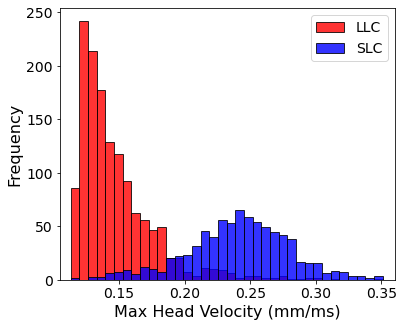

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

mm_per_px = 0.067
frames_per_msecond = 437/1000

# Define all stimuli
visual_stimuli = ['vmin', 'vmed', 'vmax']
auditory_stimuli = ['amin', 'amed', 'amax']
all_stims = ['ctrl'] + visual_stimuli + auditory_stimuli + [f"{v}_{a}" for v, a in product(visual_stimuli, auditory_stimuli)]

window_before = 10
window_after = 40

# Extract the maximum head velocity for each event
def extract_max_head_velocity(data):
    slc_max_velocities = []
    llc_max_velocities = []
    for stim in all_stims:
        for trial_index in range(len(data[stim]['valid_event_times'])):
            event_times = data[stim]['valid_event_times'][trial_index]
            head_velocity = data[stim]['head_velocity'][trial_index]
            behavior_types = data[stim]['behavior_type'][trial_index]
            for i, event_frame in enumerate(event_times):
                start_frame = max(0, event_frame - window_before)
                end_frame = min(len(head_velocity), event_frame + window_after)
                max_velocity = np.max(head_velocity[start_frame:end_frame]) * mm_per_px * frames_per_msecond
                if behavior_types[i] == 1:  # SLC
                    slc_max_velocities.append(max_velocity)
                elif behavior_types[i] == 0:  # LLC
                    llc_max_velocities.append(max_velocity)
    return slc_max_velocities, llc_max_velocities

# Plot the distribution of max head velocity values
def plot_max_head_velocity_distribution(slc_max_velocities, llc_max_velocities):
    plt.figure(figsize=(6, 5))

    # Determine common bin edges
    all_velocities = slc_max_velocities + llc_max_velocities
    bin_edges = np.linspace(min(all_velocities), max(all_velocities), 100)
    
    plt.hist(llc_max_velocities, bins=bin_edges, alpha=.8, label='LLC', color='red', edgecolor='black')
    plt.hist(slc_max_velocities, bins=bin_edges, alpha=.8, label='SLC', color='blue', edgecolor='black')

    plt.xlabel('Max Head Velocity (mm/ms)', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    #plt.title('Distribution of Max Head Velocity Values for SLC and LLC Events', fontsize=18)
    plt.legend(fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(105/1000, 360/1000)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Extract max head velocities
slc_max_velocities, llc_max_velocities = extract_max_head_velocity(data)

# Plot distributions
plot_max_head_velocity_distribution(slc_max_velocities, llc_max_velocities)

from scipy.stats import mannwhitneyu

# Remove NaNs from the data
slc_max_velocities = [val for val in slc_max_velocities if not np.isnan(val)]
llc_max_velocities = [val for val in llc_max_velocities if not np.isnan(val)]

# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(slc_max_velocities, llc_max_velocities, alternative='two-sided')

print
print(f"Mann-Whitney U statistic: {u_statistic}")
print(f"P-value: {p_value}")

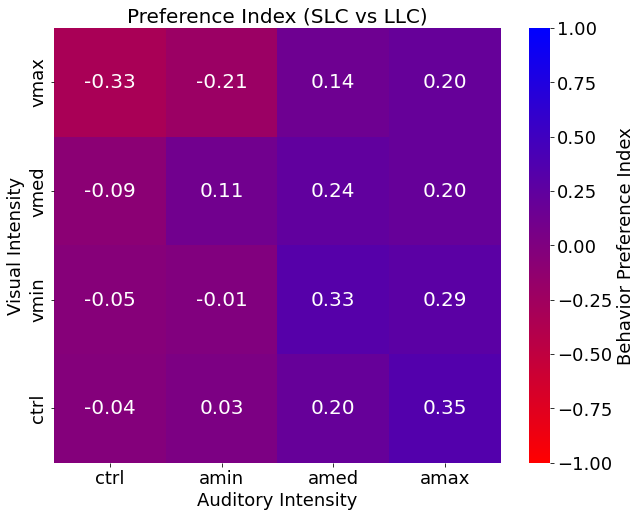

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Define all stimuli
auditory_stimuli = ['ctrl', 'amin', 'amed', 'amax']
visual_stimuli = ['ctrl', 'vmin', 'vmed', 'vmax']
combined_stimuli = ['ctrl', 'amin', 'amed', 'amax', 'vmin', 'vmed', 'vmax'] + [f"{v}_{a}" for v, a in product(visual_stimuli[1:], auditory_stimuli[1:])]

# Calculate preference index for each stimulus
def calculate_preference_index(data):
    preference_index = {}
    for stim in combined_stimuli:
        slc_trials = np.sum(data[stim]['SLC'])
        llc_trials = np.sum(data[stim]['LLC'])
        total_trials = len(data[stim]['SLC'])
        preference_index[stim] = (slc_trials - llc_trials) / total_trials
    return preference_index

# Generate the heatmap
def plot_heatmap(preference_index, title):
    pref_matrix = np.full((4, 4), np.nan)
    stim_map = {
        'ctrl': (0, 0),
        'amin': (0, 1), 'amed': (0, 2), 'amax': (0, 3),
        'vmin': (1, 0), 'vmed': (2, 0), 'vmax': (3, 0)
    }
    for v, a in product(visual_stimuli[1:], auditory_stimuli[1:]):
        stim_map[f"{v}_{a}"] = (visual_stimuli.index(v), auditory_stimuli.index(a))

    for stim, (i, j) in stim_map.items():
        if stim in preference_index:
            pref_matrix[3 - i, j] = preference_index[stim]

    plt.figure(figsize=(10, 8))
    
    custom_cmap = LinearSegmentedColormap.from_list("yellow_green", ["red", "blue"])
    sns.heatmap(pref_matrix, annot=True, fmt=".2f", cmap=custom_cmap, xticklabels=auditory_stimuli, yticklabels=visual_stimuli[::-1], vmin=-1, vmax=1, annot_kws={"size": 20}, cbar_kws={'label': 'Preference Index', 'orientation': 'vertical'})
    
    
    plt.title(title, fontsize=20)
    plt.xlabel('Auditory Intensity', fontsize=18)
    plt.ylabel('Visual Intensity', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Behavior Preference Index', size=18)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Calculate preference index
preference_index = calculate_preference_index(data)

# Plot heatmap
plot_heatmap(preference_index, "Preference Index (SLC vs LLC)")


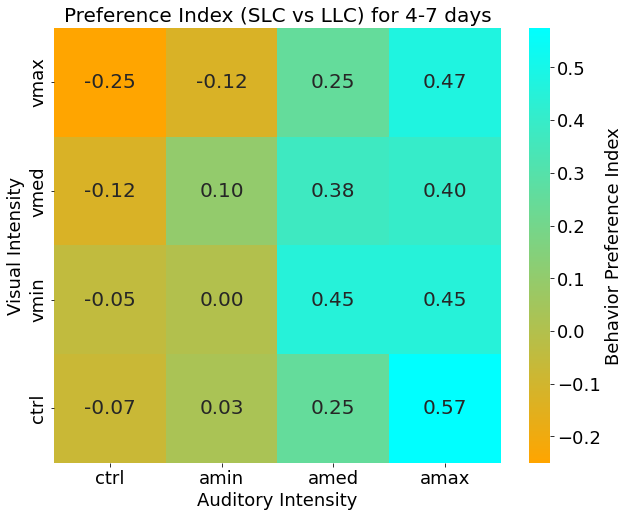


===== Gaussian GLM Results for Preference Index (Age Group: 4-7 days) =====
                 Generalized Linear Model Regression Results                  
Dep. Variable:       preference_index   No. Observations:                   16
Model:                            GLM   Df Residuals:                       13
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                       0.0079381
Method:                          IRLS   Log-Likelihood:                 17.647
Date:                Wed, 30 Oct 2024   Deviance:                      0.10320
Time:                        14:10:29   Pearson chi2:                    0.103
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9994
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

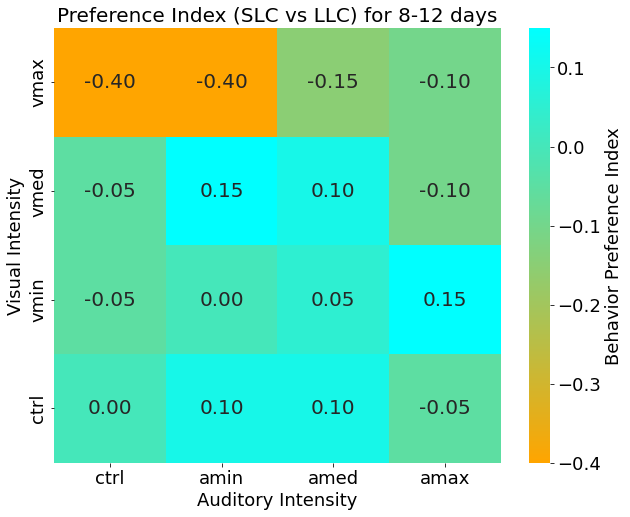


===== Gaussian GLM Results for Preference Index (Age Group: 8-12 days) =====
                 Generalized Linear Model Regression Results                  
Dep. Variable:       preference_index   No. Observations:                   16
Model:                            GLM   Df Residuals:                       13
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                        0.017560
Method:                          IRLS   Log-Likelihood:                 11.295
Date:                Wed, 30 Oct 2024   Deviance:                      0.22828
Time:                        14:10:30   Pearson chi2:                    0.228
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5066
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

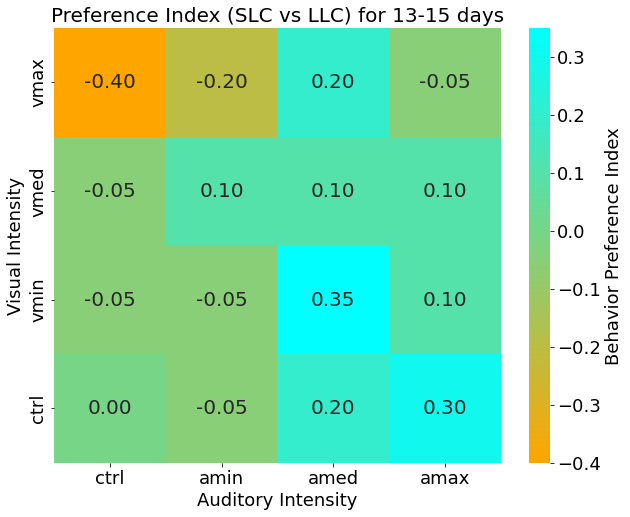


===== Gaussian GLM Results for Preference Index (Age Group: 13-15 days) =====
                 Generalized Linear Model Regression Results                  
Dep. Variable:       preference_index   No. Observations:                   16
Model:                            GLM   Df Residuals:                       13
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                        0.018029
Method:                          IRLS   Log-Likelihood:                 11.084
Date:                Wed, 30 Oct 2024   Deviance:                      0.23438
Time:                        14:10:30   Pearson chi2:                    0.234
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6390
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Define all stimuli
auditory_stimuli = ['ctrl', 'amin', 'amed', 'amax']
visual_stimuli = ['ctrl', 'vmin', 'vmed', 'vmax']
combined_stimuli = ['ctrl', 'amin', 'amed', 'amax', 'vmin', 'vmed', 'vmax'] + [f"{v}_{a}" for v, a in product(visual_stimuli[1:], auditory_stimuli[1:])]

# Function to calculate preference index for each stimulus
def calculate_preference_index(data):
    preference_index = {}
    for stim in combined_stimuli:
        slc_trials = np.sum(data[stim]['SLC'])
        llc_trials = np.sum(data[stim]['LLC'])
        total_trials = len(data[stim]['SLC'])
        preference_index[stim] = (slc_trials - llc_trials) / total_trials
    return preference_index

# Function to generate the heatmap
def plot_heatmap(preference_index, title):
    pref_matrix = np.full((4, 4), np.nan)
    stim_map = {
        'ctrl': (0, 0),
        'amin': (0, 1), 'amed': (0, 2), 'amax': (0, 3),
        'vmin': (1, 0), 'vmed': (2, 0), 'vmax': (3, 0)
    }
    for v, a in product(visual_stimuli[1:], auditory_stimuli[1:]):
        stim_map[f"{v}_{a}"] = (visual_stimuli.index(v), auditory_stimuli.index(a))

    for stim, (i, j) in stim_map.items():
        if stim in preference_index:
            pref_matrix[3 - i, j] = preference_index[stim]

    plt.figure(figsize=(10, 8))
    custom_cmap = LinearSegmentedColormap.from_list("yellow_green", ["orange", "cyan"])
    sns.heatmap(pref_matrix, annot=True, fmt=".2f", cmap=custom_cmap, xticklabels=auditory_stimuli, yticklabels=visual_stimuli[::-1], annot_kws={"size": 20}, cbar_kws={'label': 'Preference Index', 'orientation': 'vertical'})
    plt.title(title, fontsize=20)
    plt.xlabel('Auditory Intensity', fontsize=18)
    plt.ylabel('Visual Intensity', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label('Behavior Preference Index', size=18)
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

# Function to filter data by age group
def filter_data_by_age(data, age_range):
    filtered_data = {}
    for stim in combined_stimuli:
        age_filter = (data[stim]['age'] >= age_range[0]) & (data[stim]['age'] <= age_range[1])
        filtered_data[stim] = {
            'SLC': data[stim]['SLC'][age_filter],
            'LLC': data[stim]['LLC'][age_filter],
            'age': data[stim]['age'][age_filter]
        }
    return filtered_data

import pandas as pd
import statsmodels.formula.api as smf

# Function to map stimuli to numeric values for visual and auditory intensity
def map_stimuli_to_numeric(stim):
    visual_map = {'ctrl': 0, 'vmin': 1, 'vmed': 2, 'vmax': 3}
    auditory_map = {'ctrl': 0, 'amin': 1, 'amed': 2, 'amax': 3}
    
    # Handle combined stimuli
    if '_' in stim:
        visual, auditory = stim.split('_')
    else:
        if stim in visual_map:
            visual, auditory = stim, 'ctrl'
        else:
            visual, auditory = 'ctrl', stim
    
    return visual_map[visual], auditory_map[auditory]

# Function to build dataframe for GLM
def build_glm_dataframe(preference_index):
    records = []
    
    for stim, pref_index in preference_index.items():
        visual_numeric, auditory_numeric = map_stimuli_to_numeric(stim)
        
        # Create a record for each stimulus condition
        record = {
            'stimulus': stim,
            'visual_intensity': visual_numeric,
            'auditory_intensity': auditory_numeric,
            'preference_index': pref_index
        }
        records.append(record)
    
    # Convert records to a DataFrame
    df = pd.DataFrame(records)
    return df

# Function to run the Gaussian GLM
def run_gaussian_glm(df, age_label):
    # Fit a Gaussian GLM (linear regression) with visual and auditory intensities as predictors
    model = smf.glm(formula='preference_index ~ visual_intensity + auditory_intensity', 
                    data=df, 
                    family=sm.families.Gaussian()).fit()
    
    # Print the summary results
    print(f"\n===== Gaussian GLM Results for Preference Index (Age Group: {age_label}) =====")
    print(model.summary())
    
    return model


# Define age groups
age_groups = {
    "4-7 days": (4, 7),
    "8-12 days": (8, 12),
    "13-15 days": (13, 15)
}

# Calculate and plot preference index for each age group
for age_label, age_range in age_groups.items():
    filtered_data = filter_data_by_age(data, age_range)
    preference_index_age = calculate_preference_index(filtered_data)
    plot_heatmap(preference_index_age, f"Preference Index (SLC vs LLC) for {age_label}")
    
    # Build the DataFrame for GLM
    df_glm = build_glm_dataframe(preference_index_age)
    
    # Run the Gaussian GLM
    run_gaussian_glm(df_glm, age_label)

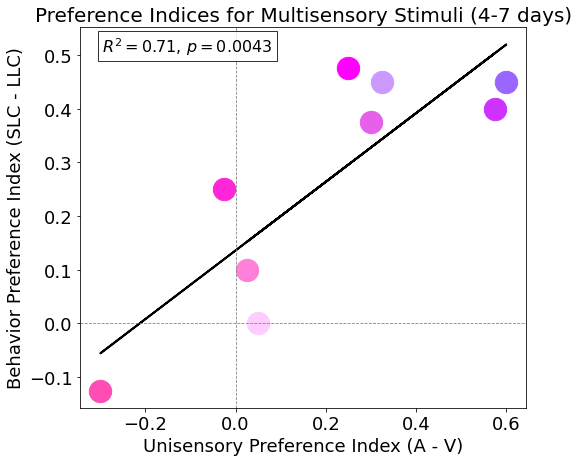

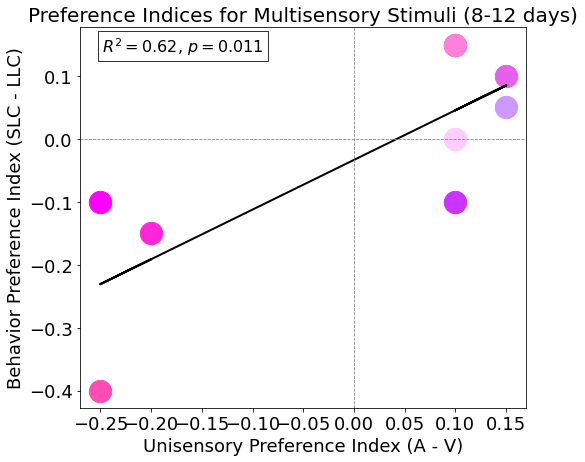

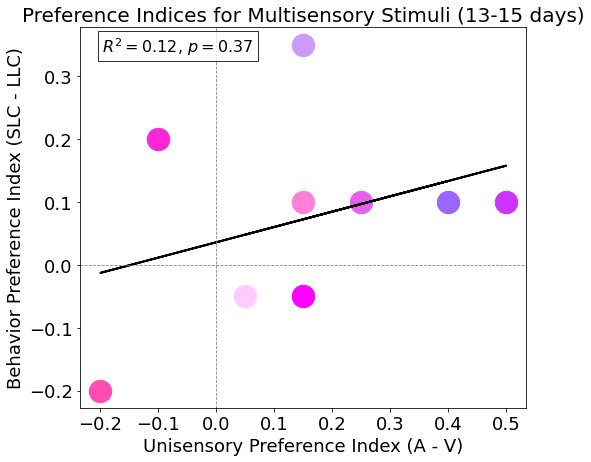

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.stats import linregress

# Define all stimuli
auditory_stimuli = ['ctrl', 'amin', 'amed', 'amax']
visual_stimuli = ['ctrl', 'vmin', 'vmed', 'vmax']
combined_stimuli = [f"{v}_{a}" for v, a in product(visual_stimuli[1:], auditory_stimuli[1:])]

# Function to calculate preference index for each stimulus
def calculate_preference_index(data):
    preference_index = {}
    for stim in combined_stimuli:
        slc_trials = np.sum(data[stim]['SLC'])
        llc_trials = np.sum(data[stim]['LLC'])
        total_trials = len(data[stim]['SLC'])
        preference_index[stim] = (slc_trials - llc_trials) / total_trials
    return preference_index

# Function to calculate escape preference index
def calculate_escape_preference(data):
    escape_preference = {}
    for v, a in product(visual_stimuli[1:], auditory_stimuli[1:]):
        combined_stim = f"{v}_{a}"
        v_escapes = np.sum(data[v]['is_escape'])
        a_escapes = np.sum(data[a]['is_escape'])
        total_escapes = len(data[v]['is_escape'])
        escape_preference[combined_stim] = (a_escapes - v_escapes) / total_escapes
    return escape_preference

# Function to filter data by age group
def filter_data_by_age(data, age_range):
    filtered_data = {}
    for stim in visual_stimuli[1:] + auditory_stimuli[1:] + combined_stimuli:
        age_filter = (data[stim]['age'] >= age_range[0]) & (data[stim]['age'] <= age_range[1])
        filtered_data[stim] = {
            'SLC': data[stim]['SLC'][age_filter],
            'LLC': data[stim]['LLC'][age_filter],
            'is_escape': data[stim]['is_escape'][age_filter],
            'age': data[stim]['age'][age_filter]
        }
    return filtered_data

# Define age groups
age_groups = {
    "4-7 days": (4, 7),
    "8-12 days": (8, 12),
    "13-15 days": (13, 15)
}

# Calculate and plot preference index for each age group
for age_label, age_range in age_groups.items():
    filtered_data = filter_data_by_age(data, age_range)
    preference_index_age = calculate_preference_index(filtered_data)
    escape_preference_age = calculate_escape_preference(filtered_data)
    
    # Extract x and y values for the scatter plot
    x_values = []
    y_values = []
    colors = []
    labels = []

    for stim in combined_stimuli:
        x_values.append(escape_preference_age[stim])
        y_values.append(preference_index_age[stim])
        colors.append(data["colors"][stim])
        labels.append(data["stim_labels"][stim])

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Scatter plot
    plt.figure(figsize=(8, 7))
    for i, stim in enumerate(combined_stimuli):
        plt.scatter(
            x_values[i], 
            y_values[i], 
            color=colors[i], 
            s=500  # Size of the dots
        )

    # Plot the trend line
    line_x = np.array(x_values)
    line_y = slope * line_x + intercept
    plt.plot(line_x, line_y, color='black', linewidth=2)

    # Add text for R-squared and p-value
    plt.text(
        0.05, 0.95, 
        f'$R^2={r_value**2:.2f}$, $p={p_value:.2}$', 
        ha='left', va='center', 
        transform=plt.gca().transAxes, 
        fontsize=16, 
        bbox=dict(facecolor='white', alpha=0.8)
    )

    plt.title(f"Preference Indices for Multisensory Stimuli ({age_label})", fontsize=20)
    plt.xlabel("Unisensory Preference Index (A - V)", fontsize=18)
    plt.ylabel("Behavior Preference Index (SLC - LLC)", fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
#     plt.xlim(-.4,.75)
#     plt.ylim(-.2,.65)
    plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

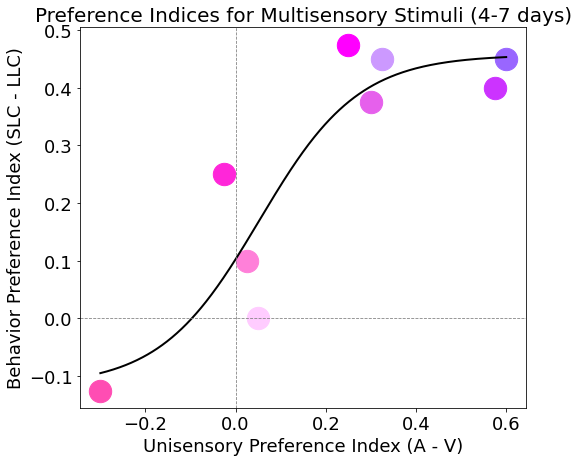

C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


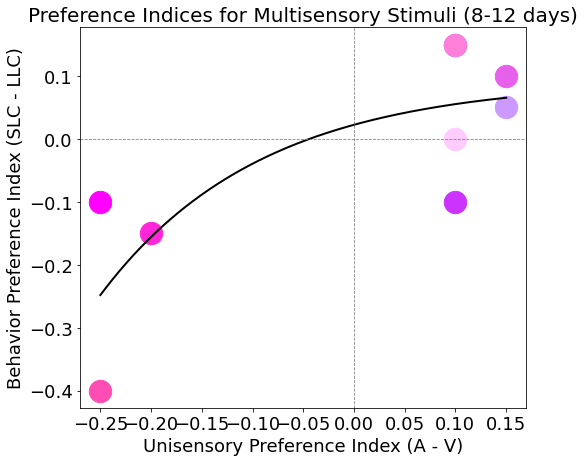

C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


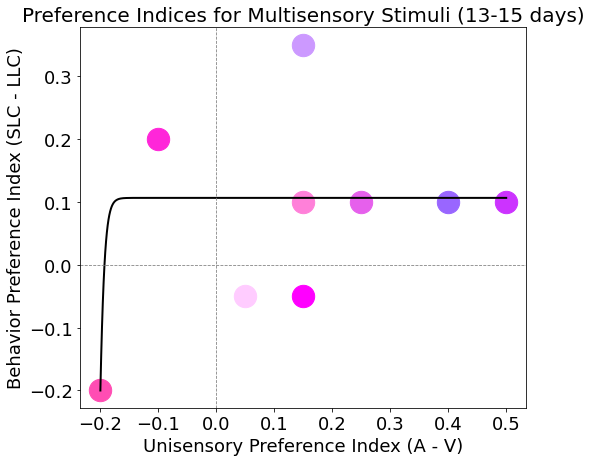

In [102]:
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Define sigmoid function that allows values to go below zero
def sigmoid(x, L, x0, k, d):
    return L / (1 + np.exp(-k * (x - x0))) + d

# Function to fit either a sigmoid or linear regression
def fit_sigmoid_or_linear(x_values, y_values):
    try:
        # Initial guess for L, x0, k, and d
        p0 = [1, 0, 1, 0]
        # Try to fit a sigmoid function
        popt, pcov = curve_fit(sigmoid, x_values, y_values, p0, maxfev=10000)
        # Generate fitted sigmoid values
        fitted_y = sigmoid(np.array(x_values), *popt)
        return fitted_y, "sigmoid", popt
    except RuntimeError:
        # If fitting sigmoid fails, perform linear regression as a fallback
        slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
        fitted_y = slope * np.array(x_values) + intercept
        return fitted_y, "linear", (slope, intercept)

# Calculate and plot preference index for each age group with sigmoid fitting
for age_label, age_range in age_groups.items():
    filtered_data = filter_data_by_age(data, age_range)
    preference_index_age = calculate_preference_index(filtered_data)
    escape_preference_age = calculate_escape_preference(filtered_data)
    
    # Extract x and y values for the scatter plot
    x_values = []
    y_values = []
    colors = []
    labels = []

    for stim in combined_stimuli:
        x_values.append(escape_preference_age[stim])
        y_values.append(preference_index_age[stim])
        colors.append(data["colors"][stim])
        labels.append(data["stim_labels"][stim])

    # Fit either a sigmoid or linear model to the data
    fitted_y, fit_type, params = fit_sigmoid_or_linear(x_values, y_values)

    # Scatter plot
    plt.figure(figsize=(8, 7))
    for i, stim in enumerate(combined_stimuli):
        plt.scatter(
            x_values[i], 
            y_values[i], 
            color=colors[i], 
            s=500  # Size of the dots
        )

    # Plot the fitted curve (sigmoid or linear)
    line_x = np.linspace(min(x_values), max(x_values), 500)
    
    if fit_type == "sigmoid":
        line_y = sigmoid(line_x, *params)
        # Add sigmoid parameters to the plot
#         plt.text(
#             0.05, 0.95, 
#             f'$L={params[0]:.2f}$, $x_0={params[1]:.2f}$, $k={params[2]:.2f}$, $d={params[3]:.2f}$', 
#             ha='left', va='center', 
#             transform=plt.gca().transAxes, 
#             fontsize=16, 
#             bbox=dict(facecolor='white', alpha=0.8)
#        )
    else:
        line_y = params[0] * line_x + params[1]
        # Add linear regression parameters to the plot
#         plt.text(
#             0.05, 0.95, 
#             f'$slope={params[0]:.2f}$, $intercept={params[1]:.2f}$', 
#             ha='left', va='center', 
#             transform=plt.gca().transAxes, 
#             fontsize=16, 
#             bbox=dict(facecolor='white', alpha=0.8)
#         )

    plt.plot(line_x, line_y, color='black', linewidth=2)

    plt.title(f"Preference Indices for Multisensory Stimuli ({age_label})", fontsize=20)
    plt.xlabel("Unisensory Preference Index (A - V)", fontsize=18)
    plt.ylabel("Behavior Preference Index (SLC - LLC)", fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')
    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()


GLM Results for head_velocity (LLC):
                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                  136
Model:                            GLM   Df Residuals:                      133
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.65494
Method:                          IRLS   Log-Likelihood:                -162.68
Date:                Sat, 28 Sep 2024   Deviance:                       87.107
Time:                        12:55:34   Pearson chi2:                     87.1
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01944
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

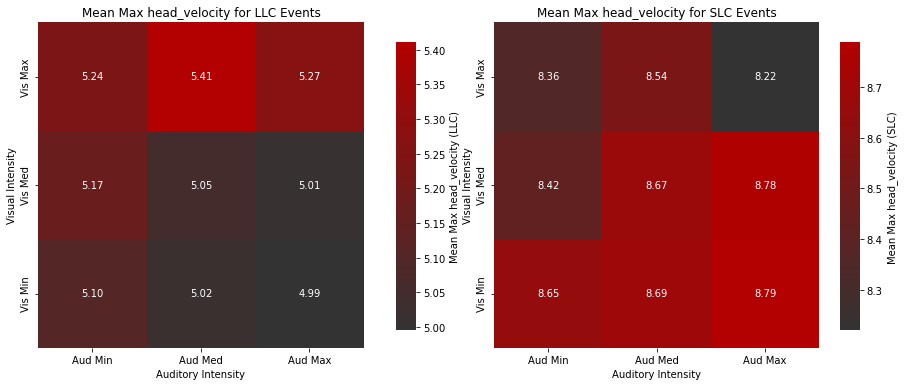

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import matplotlib.colors as mcolors

# List of variables to analyze
variables_to_analyze = ['head_velocity']

# Define a custom colormap from gray to bright red
colors = [(0.2, 0.2, 0.2), (0.7, 0, 0)]  # RGB for gray and red
n_bins = 100  # Use 100 discrete colors
cmap_name = 'gray_to_red'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def prepare_glm_data(variable, behavior_type):
    glm_data = {'response': [], 'visual_intensity': [], 'auditory_intensity': []}
    
    for stim in stims:
        if '_' in stim:
            visual, auditory = stim.split('_')
            if visual in visual_levels and auditory in auditory_levels:
                intensity_visual = visual_levels.index(visual) + 1
                intensity_auditory = auditory_levels.index(auditory) + 1
                
                for velocity in max_velocities[stim][behavior_type]:
                    glm_data['response'].append(velocity)
                    glm_data['visual_intensity'].append(intensity_visual)
                    glm_data['auditory_intensity'].append(intensity_auditory)
    
    return pd.DataFrame(glm_data)

for variable in variables_to_analyze:
    # Initialize dictionary to store max velocities for each stim and behavior type
    max_velocities = {stim: {'LLC': [], 'SLC': []} for stim in stims}

    # Loop through each stimulus type
    for stim in stims:
        trials = data[stim]['trials']
        velocity_data = data[stim][variable]
        stim_time = data['stim_time']
        window_start = data['window_start']
        window_end = data['window_end']
        valid_event_times = data[stim]['valid_event_times']
        behavior_type = data[stim]['behavior_type']

        # Loop through each trial
        for trial_idx in range(len(trials)):
            trial_velocity_data = velocity_data[trial_idx]
            trial_event_times = valid_event_times[trial_idx]
            trial_behavior_type = behavior_type[trial_idx]

            # Filter events within the stimulation window
            events_in_window = [
                (event_time, behavior) for event_time, behavior in zip(trial_event_times, trial_behavior_type)
                if window_start <= event_time <= window_end
            ]

            # Calculate max velocity around each event
            for event_time, behavior in events_in_window:
                if behavior in [0, 1]:  # LLC or SLC
                    start = max(event_time - 10, 0)
                    end = min(event_time + 40, len(trial_velocity_data))
                    max_velocity = np.max(trial_velocity_data[start:end])
                    if behavior == 0:
                        max_velocities[stim]['LLC'].append(max_velocity)
                    elif behavior == 1:
                        max_velocities[stim]['SLC'].append(max_velocity)

    # Calculate the average max velocity per stim type and behavior type
    mean_max_velocities = {stim: {'LLC': np.nan, 'SLC': np.nan} for stim in stims}

    for stim in stims:
        if max_velocities[stim]['LLC']:
            mean_max_velocities[stim]['LLC'] = np.mean(max_velocities[stim]['LLC'])
        if max_velocities[stim]['SLC']:
            mean_max_velocities[stim]['SLC'] = np.mean(max_velocities[stim]['SLC'])

    # Define intensity levels for plotting, excluding control and unisensory stimuli
    auditory_levels = ['amin', 'amed', 'amax']
    visual_levels = ['vmin', 'vmed', 'vmax']

    # Initialize heatmap matrices
    heatmap_llc = np.full((len(visual_levels), len(auditory_levels)), np.nan)
    heatmap_slc = np.full((len(visual_levels), len(auditory_levels)), np.nan)

    # Populate heatmap matrices
    for i, visual in enumerate(visual_levels[::-1]):  # Reverse the visual levels for correct matrix population
        for j, auditory in enumerate(auditory_levels):
            stim_code = f'{visual}_{auditory}'
            if stim_code in mean_max_velocities:
                heatmap_llc[i, j] = mean_max_velocities[stim_code]['LLC']
                heatmap_slc[i, j] = mean_max_velocities[stim_code]['SLC']

    # Plot heatmaps with individual colorbars and the custom colormap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.4})

    # LLC heatmap
    sns.heatmap(
        heatmap_llc, annot=True, fmt='.2f', cmap=cm, square=True, annot_kws={"size": 10},
        xticklabels=[data['stim_labels'][level] for level in auditory_levels],
        yticklabels=[data['stim_labels'][level] for level in visual_levels][::-1],
        cbar_ax=fig.add_axes([0.48, 0.25, 0.02, 0.5]), cbar_kws={'label': f'Mean Max {variable} (LLC)'}, ax=ax1
    )
    ax1.set_title(f'Mean Max {variable} for LLC Events')
    ax1.set_xlabel('Auditory Intensity')
    ax1.set_ylabel('Visual Intensity')

    # SLC heatmap
    sns.heatmap(
        heatmap_slc, annot=True, fmt='.2f', cmap=cm, square=True, annot_kws={"size": 10},
        xticklabels=[data['stim_labels'][level] for level in auditory_levels],
        yticklabels=[data['stim_labels'][level] for level in visual_levels][::-1],
        cbar_ax=fig.add_axes([0.92, 0.25, 0.02, 0.5]), cbar_kws={'label': f'Mean Max {variable} (SLC)'}, ax=ax2
    )
    ax2.set_title(f'Mean Max {variable} for SLC Events')
    ax2.set_xlabel('Auditory Intensity')
    ax2.set_ylabel('Visual Intensity')

    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

    # Perform GLM analysis for LLC and SLC separately
    glm_data_llc = prepare_glm_data(variable, 'LLC')
    glm_data_slc = prepare_glm_data(variable, 'SLC')

    # Fit GLM for LLC
    model_llc = sm.GLM(glm_data_llc['response'], sm.add_constant(glm_data_llc[['visual_intensity', 'auditory_intensity']]), family=sm.families.Gaussian()).fit()
    print(f"GLM Results for {variable} (LLC):")
    print(model_llc.summary())

    # Fit GLM for SLC
    model_slc = sm.GLM(glm_data_slc['response'], sm.add_constant(glm_data_slc[['visual_intensity', 'auditory_intensity']]), family=sm.families.Gaussian()).fit()
    print(f"GLM Results for {variable} (SLC):")
    print(model_slc.summary())


GLM Results for head_velocity (LLC) (Ages 4-6):
                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                   47
Model:                            GLM   Df Residuals:                       44
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.63565
Method:                          IRLS   Log-Likelihood:                -54.492
Date:                Sat, 28 Sep 2024   Deviance:                       27.969
Time:                        12:55:34   Pearson chi2:                     28.0
No. Iterations:                     3   Pseudo R-squ. (CS):           0.008678
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

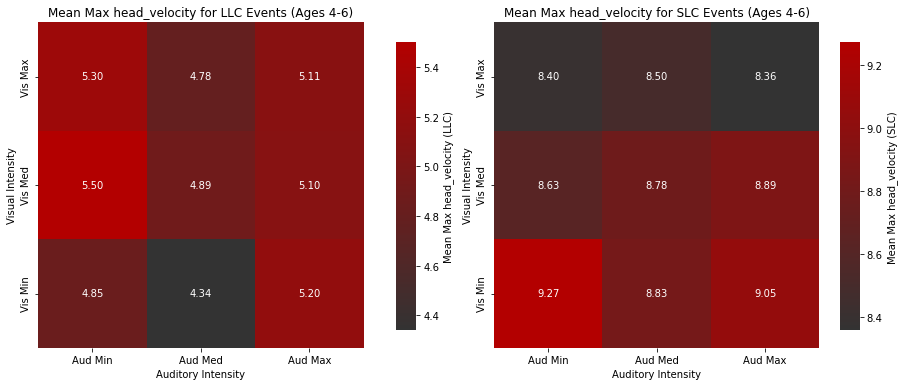

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import matplotlib.colors as mcolors

# List of variables to analyze
variables_to_analyze = ['head_velocity']

# Define a custom colormap from gray to bright red
colors = [(0.2, 0.2, 0.2), (0.7, 0, 0)]  # RGB for gray and red
n_bins = 100  # Use 100 discrete colors
cmap_name = 'gray_to_red'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def prepare_glm_data(variable, behavior_type):
    glm_data = {'response': [], 'visual_intensity': [], 'auditory_intensity': []}
    
    for stim in stims:
        if '_' in stim:
            visual, auditory = stim.split('_')
            if visual in visual_levels and auditory in auditory_levels:
                intensity_visual = visual_levels.index(visual) + 1
                intensity_auditory = auditory_levels.index(auditory) + 1
                
                for velocity in max_velocities[stim][behavior_type]:
                    glm_data['response'].append(velocity)
                    glm_data['visual_intensity'].append(intensity_visual)
                    glm_data['auditory_intensity'].append(intensity_auditory)
    
    return pd.DataFrame(glm_data)

for variable in variables_to_analyze:
    # Initialize dictionary to store max velocities for each stim and behavior type
    max_velocities = {stim: {'LLC': [], 'SLC': []} for stim in stims}

    # Loop through each stimulus type
    for stim in stims:
        trials = data[stim]['trials']
        velocity_data = data[stim][variable]
        stim_time = data['stim_time']
        window_start = data['window_start']
        window_end = data['window_end']
        valid_event_times = data[stim]['valid_event_times']
        behavior_type = data[stim]['behavior_type']

        # Loop through each trial
        for trial_idx in range(len(trials)):
            if data[stim]['age'][trial_idx] < 4 or data[stim]['age'][trial_idx] > 6:
                continue

            trial_velocity_data = velocity_data[trial_idx]
            trial_event_times = valid_event_times[trial_idx]
            trial_behavior_type = behavior_type[trial_idx]

            # Filter events within the stimulation window
            events_in_window = [
                (event_time, behavior) for event_time, behavior in zip(trial_event_times, trial_behavior_type)
                if window_start <= event_time <= window_end
            ]

            # Calculate max velocity around each event
            for event_time, behavior in events_in_window:
                if behavior in [0, 1]:  # LLC or SLC
                    start = max(event_time - 10, 0)
                    end = min(event_time + 40, len(trial_velocity_data))
                    max_velocity = np.max(trial_velocity_data[start:end])
                    if behavior == 0:
                        max_velocities[stim]['LLC'].append(max_velocity)
                    elif behavior == 1:
                        max_velocities[stim]['SLC'].append(max_velocity)

    # Calculate the average max velocity per stim type and behavior type
    mean_max_velocities = {stim: {'LLC': np.nan, 'SLC': np.nan} for stim in stims}

    for stim in stims:
        if max_velocities[stim]['LLC']:
            mean_max_velocities[stim]['LLC'] = np.mean(max_velocities[stim]['LLC'])
        if max_velocities[stim]['SLC']:
            mean_max_velocities[stim]['SLC'] = np.mean(max_velocities[stim]['SLC'])

    # Define intensity levels for plotting, excluding control and unisensory stimuli
    auditory_levels = ['amin', 'amed', 'amax']
    visual_levels = ['vmin', 'vmed', 'vmax']

    # Initialize heatmap matrices
    heatmap_llc = np.full((len(visual_levels), len(auditory_levels)), np.nan)
    heatmap_slc = np.full((len(visual_levels), len(auditory_levels)), np.nan)

    # Populate heatmap matrices
    for i, visual in enumerate(visual_levels[::-1]):  # Reverse the visual levels for correct matrix population
        for j, auditory in enumerate(auditory_levels):
            stim_code = f'{visual}_{auditory}'
            if stim_code in mean_max_velocities:
                heatmap_llc[i, j] = mean_max_velocities[stim_code]['LLC']
                heatmap_slc[i, j] = mean_max_velocities[stim_code]['SLC']

    # Plot heatmaps with individual colorbars and the custom colormap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.4})

    # LLC heatmap
    sns.heatmap(
        heatmap_llc, annot=True, fmt='.2f', cmap=cm, square=True, annot_kws={"size": 10},
        xticklabels=[data['stim_labels'][level] for level in auditory_levels],
        yticklabels=[data['stim_labels'][level] for level in visual_levels][::-1],
        cbar_ax=fig.add_axes([0.48, 0.25, 0.02, 0.5]), cbar_kws={'label': f'Mean Max {variable} (LLC)'}, ax=ax1
    )
    ax1.set_title(f'Mean Max {variable} for LLC Events (Ages 4-6)')
    ax1.set_xlabel('Auditory Intensity')
    ax1.set_ylabel('Visual Intensity')

    # SLC heatmap
    sns.heatmap(
        heatmap_slc, annot=True, fmt='.2f', cmap=cm, square=True, annot_kws={"size": 10},
        xticklabels=[data['stim_labels'][level] for level in auditory_levels],
        yticklabels=[data['stim_labels'][level] for level in visual_levels][::-1],
        cbar_ax=fig.add_axes([0.92, 0.25, 0.02, 0.5]), cbar_kws={'label': f'Mean Max {variable} (SLC)'}, ax=ax2
    )
    ax2.set_title(f'Mean Max {variable} for SLC Events (Ages 4-6)')
    ax2.set_xlabel('Auditory Intensity')
    ax2.set_ylabel('Visual Intensity')

    pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()

    # Perform GLM analysis for LLC and SLC separately
    glm_data_llc = prepare_glm_data(variable, 'LLC')
    glm_data_slc = prepare_glm_data(variable, 'SLC')

    # Fit GLM for LLC
    model_llc = sm.GLM(glm_data_llc['response'], sm.add_constant(glm_data_llc[['visual_intensity', 'auditory_intensity']]), family=sm.families.Gaussian()).fit()
    print(f"GLM Results for {variable} (LLC) (Ages 4-6):")
    print(model_llc.summary())

    # Fit GLM for SLC
    model_slc = sm.GLM(glm_data_slc['response'], sm.add_constant(glm_data_slc[['visual_intensity', 'auditory_intensity']]), family=sm.families.Gaussian()).fit()
    print(f"GLM Results for {variable} (SLC) (Ages 4-6):")
    print(model_slc.summary())


In [74]:
cm_per_px = 0.00677
frames_per_s = 437

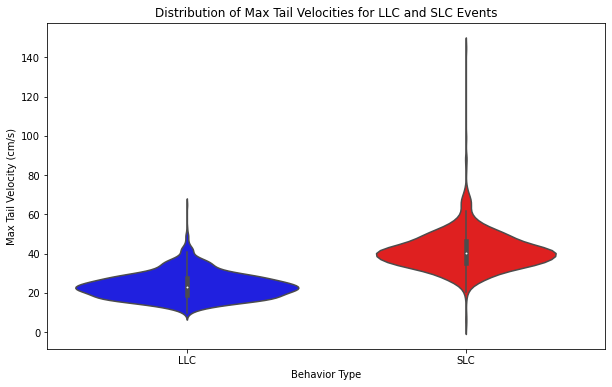

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize lists to store max tail velocities
llc_max_tail_velocities = []
slc_max_tail_velocities = []

# Loop through each stimulus type
for stim in stims:
    trials = data[stim]['trials']
    tail_velocity_data = data[stim]['tail_velocity']
    valid_event_times = data[stim]['valid_event_times']
    behavior_type = data[stim]['behavior_type']

    # Loop through each trial
    for trial_idx in range(len(trials)):
        trial_tail_velocity_data = tail_velocity_data[trial_idx]
        trial_event_times = valid_event_times[trial_idx]
        trial_behavior_type = behavior_type[trial_idx]

        # Process each event
        for event_time, behavior in zip(trial_event_times, trial_behavior_type):
            start = max(event_time - 10, 0)
            end = min(event_time + 40, len(trial_tail_velocity_data))
            max_tail_velocity = np.max(trial_tail_velocity_data[start:end])
            
            if behavior == 0:  # LLC
                llc_max_tail_velocities.append(max_tail_velocity * cm_per_px * frames_per_s)
            elif behavior == 1:  # SLC
                slc_max_tail_velocities.append(max_tail_velocity * cm_per_px * frames_per_s)

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Max Tail Velocity': llc_max_tail_velocities + slc_max_tail_velocities,
    'Behavior Type': ['LLC'] * len(llc_max_tail_velocities) + ['SLC'] * len(slc_max_tail_velocities)
})

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Behavior Type', y='Max Tail Velocity', data=df, palette=['blue', 'red'])
plt.title('Distribution of Max Tail Velocities for LLC and SLC Events')
plt.xlabel('Behavior Type')
plt.ylabel('Max Tail Velocity (cm/s)')
pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()


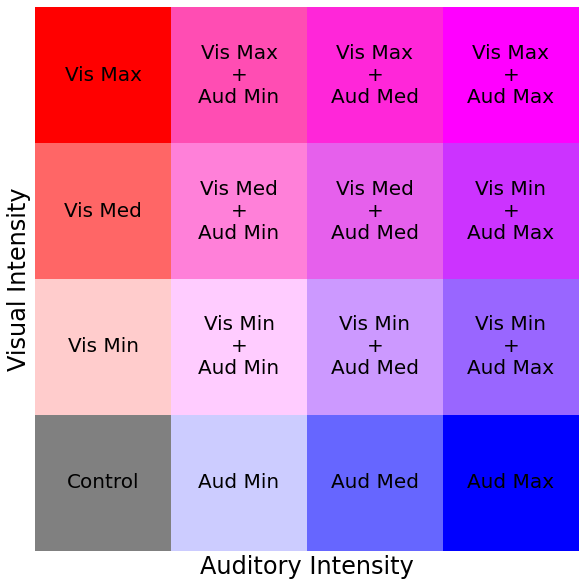

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import rgb_to_hsv

# Define the stim matrix layout
stim_matrix = [
    ['ctrl', 'amin', 'amed', 'amax'],
    ['vmin', 'vmin_amin', 'vmin_amed', 'vmin_amax'],
    ['vmed', 'vmed_amin', 'vmed_amed', 'vmed_amax'],
    ['vmax', 'vmax_amin', 'vmax_amed', 'vmax_amax']
]

# Define the intensities for axis titles
auditory_intensities = ['No Aud', 'Aud Min', 'Aud Med', 'Aud Max']
visual_intensities = ['No Vis', 'Vis Min', 'Vis Med', 'Vis Max']

# Function to determine text color based on background color
def get_text_color(background_color):
    hsv = rgb_to_hsv(np.array(background_color).reshape(1, 1, 3))
    return 'white' if hsv[0, 0, 2] < 0.5 else 'black'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Iterate over the stim_matrix to create the diagram
for y in range(len(stim_matrix)):
    for x in range(len(stim_matrix[y])):
        stim = stim_matrix[y][x]
        color = data['colors'][stim]
        text_color = get_text_color(color)
        label = data['stim_labels'][stim]
        
        # Add newlines around the '+' sign for multisensory annotations
        if ' + ' in label:
            label = label.replace(' + ', '\n+\n')
        
        ax.add_patch(plt.Rectangle((x, y), 1, 1, facecolor=color))
        ax.text(x + 0.5, y + 0.5, label, 
                color=text_color, ha='center', va='center', fontsize=20)

# Set the axis titles
ax.set_xlabel('Auditory Intensity', fontsize=24)
ax.set_ylabel('Visual Intensity', fontsize=24)

# Set the limits and grid
ax.set_xlim(0, len(auditory_intensities))
ax.set_ylim(0, len(visual_intensities))
#ax.invert_yaxis()
ax.set_aspect('equal')
ax.grid(False)

# Hide axis lines and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
pdf_file.savefig(plt.gcf()) if save_to_pdf else plt.show()


In [77]:
# Close the PdfPages object to finalize the PDF file
pdf_file.close()

In [8]:
import os
import numpy as np
import pandas as pd

# Define the window for frame extraction
frame_window_before = 10
frame_window_after = 50
frame_window_size = frame_window_before + frame_window_after + 1

# Body parts we are interested in
bodyparts = ["eyeL", "eyeR", "vejigaA", "vejigaP", "tail1", "tail2", "tail3", "tail4", "tail5", "tail6", "tail7", "tail8"]
num_bodyparts = len(bodyparts)

# Define a function to process the CSV and extract the necessary tracking data
def process_tracking_csv(file_path):
    # First, read the CSV file with the first three rows, since we need the second and third to create headers
    df = pd.read_csv(file_path, header=None, skiprows=1, nrows=2)  # Read only the second and third rows for the headers
    
    # Combine the second and third rows to form the new column names
    new_columns = [f"{str(df.iloc[0, i])}_{str(df.iloc[1, i])}" for i in range(df.shape[1])]
    
    # Now read the actual data, skipping the first 3 rows (first row irrelevant + 2 rows for the header)
    df = pd.read_csv(file_path, header=None, skiprows=3, names=new_columns)
    
    # Extract frame numbers (assumed to be in the first column)
    df["frame"] = df.iloc[:, 0].astype(int)
    
    # Process each body part's x, y
    tracking_data = {}
    for part in bodyparts:
        tracking_data[part] = {
            "x": df[f"{part}_x"].astype(float).values,
            "y": df[f"{part}_y"].astype(float).values
        }
    
    return tracking_data

# Function to get the tracking data for a window of frames around an event
def get_event_window_data(tracking_data, event_frame):
    window_data = np.zeros((frame_window_size, num_bodyparts, 2))
    start_frame = event_frame - frame_window_before
    end_frame = event_frame + frame_window_after
    
    # For each frame in the window, extract the x and y coordinates of all body parts
    for i, frame in enumerate(range(start_frame, end_frame + 1)):
        if frame >= 0 and frame < len(tracking_data[bodyparts[0]]["x"]):  # Ensure the frame is valid
            for j, part in enumerate(bodyparts):
                window_data[i, j, 0] = tracking_data[part]["x"][frame]
                window_data[i, j, 1] = tracking_data[part]["y"][frame]
        else:
            # If the frame is out of bounds, leave the data as zeros (default)
            pass
    return window_data

# Go through each stim and trial
for stim in data.keys():
    if stim == "stim_time" or stim == "window_start" or stim == "window_end" or stim == "colors" or stim == "stim_labels" or stim == "stim_window" or stim == "frames_per_trial":
        continue  # Skip non-stim data

    num_trials = len(data[stim]["trials"])
    data[stim]["tracked_events"] = []

    for trial_idx in range(num_trials):
        video_name = data[stim]["videos"][trial_idx]
        print(video_name)
        
        # Find the corresponding CSV file in the directory
        csv_file = [f for f in os.listdir(data_dir) if video_name in f and f.endswith('.csv')]
        if len(csv_file) != 1:
            print(f"Warning: Could not find a unique CSV file for video {video_name}. Skipping trial.")
            continue
        csv_file_path = os.path.join(data_dir, csv_file[0])
        
        # Process the CSV file and extract tracking data
        tracking_data = process_tracking_csv(csv_file_path)
        
        # Get the valid event times for this trial
        valid_event_times = data[stim]["valid_event_times"][trial_idx]
        if len(valid_event_times) == 0:
            data[stim]["tracked_events"].append(np.zeros((0, frame_window_size, num_bodyparts, 2)))  # No events in this trial
            continue
        
        trial_tracked_events = []
        for event_frame in valid_event_times:
            # Get the window of tracking data around the event
            event_window_data = get_event_window_data(tracking_data, event_frame)
            trial_tracked_events.append(event_window_data)
        
        # Append the tracked event data for this trial
        data[stim]["tracked_events"].append(np.array(trial_tracked_events))

confocallike3-02122024105922-0000
confocallike3-02122024111238-0000
confocallike3-02122024115623-0000
confocallike3-02122024122702-0000
confocallike3-02122024125447-0000
confocallike3-02122024132356-0000
confocallike3-02122024135736-0000
confocallike3-02122024141128-0000
confocallike3-02122024143050-0000
confocallike3-02122024145653-0000
confocallike3-02132024104012-0000
confocallike3-02132024110028-0000
confocallike3-02132024112839-0000
confocallike3-02132024120943-0000
confocallike3-02132024122935-0000
confocallike3-02132024124707-0000
confocallike3-02132024132315-0000
confocallike3-02132024133657-0000
confocallike3-02132024141504-0000
confocallike3-02132024144031-0000
confocallike3-02142024100106-0000
confocallike3-02142024104036-0000
confocallike3-02142024110342-0000
confocallike3-02142024114639-0000
confocallike3-02142024130022-0000
confocallike3-02142024131522-0000
confocallike3-02142024134242-0000
confocallike3-02142024141138-0000
confocallike3-02142024144546-0000
confocallike3-

confocallike3-02122024111623-0000
confocallike3-02122024114623-0000
confocallike3-02122024122317-0000
confocallike3-02122024125602-0000
confocallike3-02122024133126-0000
confocallike3-02122024134506-0000
confocallike3-02122024140358-0000
confocallike3-02122024143820-0000
confocallike3-02122024145809-0000
confocallike3-02132024103742-0000
confocallike3-02132024110143-0000
confocallike3-02132024113224-0000
confocallike3-02132024115443-0000
confocallike3-02132024121935-0000
confocallike3-02132024125552-0000
confocallike3-02132024130930-0000
confocallike3-02132024133812-0000
confocallike3-02132024140504-0000
confocallike3-02132024143032-0000
confocallike3-02142024095951-0000
confocallike3-02142024105422-0000
confocallike3-02142024110456-0000
confocallike3-02142024114909-0000
confocallike3-02142024125637-0000
confocallike3-02142024131407-0000
confocallike3-02142024134357-0000
confocallike3-02142024142024-0000
confocallike3-02142024143816-0000
confocallike3-02142024150205-0000
confocallike3-

confocallike3-02122024114237-0000
confocallike3-02122024123047-0000
confocallike3-02122024130447-0000
confocallike3-02122024131856-0000
confocallike3-02122024135236-0000
confocallike3-02122024141858-0000
confocallike3-02122024143320-0000
confocallike3-02122024151039-0000
confocallike3-02132024103627-0000
confocallike3-02132024110528-0000
confocallike3-02132024112225-0000
confocallike3-02132024115558-0000
confocallike3-02132024123205-0000
confocallike3-02132024125707-0000
confocallike3-02132024131930-0000
confocallike3-02132024133157-0000
confocallike3-02132024140734-0000
confocallike3-02132024144802-0000
confocallike3-02142024101607-0000
confocallike3-02142024103922-0000
confocallike3-02142024110841-0000
confocallike3-02142024113754-0000
confocallike3-02142024125522-0000
confocallike3-02142024131907-0000
confocallike3-02142024134512-0000
confocallike3-02142024141023-0000
confocallike3-02142024143431-0000
confocallike3-02142024150550-0000
confocallike3-02152024111013-0000
confocallike3-

confocallike3-02122024123817-0000
confocallike3-02122024130102-0000
confocallike3-02122024132241-0000
confocallike3-02122024134351-0000
confocallike3-02122024141627-0000
confocallike3-02122024143550-0000
confocallike3-02122024150924-0000
confocallike3-02132024105012-0000
confocallike3-02132024105643-0000
confocallike3-02132024113454-0000
confocallike3-02132024120058-0000
confocallike3-02132024122705-0000
confocallike3-02132024124822-0000
confocallike3-02132024131430-0000
confocallike3-02132024134812-0000
confocallike3-02132024141004-0000
confocallike3-02132024144417-0000
confocallike3-02142024101221-0000
confocallike3-02142024104151-0000
confocallike3-02142024111726-0000
confocallike3-02142024113909-0000
confocallike3-02142024125907-0000
confocallike3-02142024132407-0000
confocallike3-02142024135127-0000
confocallike3-02142024140638-0000
confocallike3-02142024144316-0000
confocallike3-02142024151205-0000
confocallike3-02152024110128-0000
confocallike3-02152024112210-0000
confocallike3-

confocallike3-02122024130217-0000
confocallike3-02122024131626-0000
confocallike3-02122024134006-0000
confocallike3-02122024140742-0000
confocallike3-02122024144205-0000
confocallike3-02122024150039-0000
confocallike3-02132024104512-0000
confocallike3-02132024111143-0000
confocallike3-02132024112609-0000
confocallike3-02132024121058-0000
confocallike3-02132024122550-0000
confocallike3-02132024125207-0000
confocallike3-02132024131815-0000
confocallike3-02132024133042-0000
confocallike3-02132024140619-0000
confocallike3-02132024143917-0000
confocallike3-02142024100606-0000
confocallike3-02142024104536-0000
confocallike3-02142024111841-0000
confocallike3-02142024115139-0000
confocallike3-02142024125022-0000
confocallike3-02142024130907-0000
confocallike3-02142024134742-0000
confocallike3-02142024141909-0000
confocallike3-02142024143045-0000
confocallike3-02142024150320-0000
confocallike3-02152024105358-0000
confocallike3-02152024113825-0000
confocallike3-02152024115220-0000
confocallike3-

confocallike3-02122024135121-0000
confocallike3-02122024141242-0000
confocallike3-02122024144050-0000
confocallike3-02122024145309-0000
confocallike3-02132024103512-0000
confocallike3-02132024110413-0000
confocallike3-02132024113610-0000
confocallike3-02132024115213-0000
confocallike3-02132024122205-0000
confocallike3-02132024125822-0000
confocallike3-02132024130815-0000
confocallike3-02132024133542-0000
confocallike3-02132024141349-0000
confocallike3-02132024144532-0000
confocallike3-02142024101837-0000
confocallike3-02142024103807-0000
confocallike3-02142024111956-0000
confocallike3-02142024114024-0000
confocallike3-02142024124752-0000
confocallike3-02142024132022-0000
confocallike3-02142024134127-0000
confocallike3-02142024140753-0000
confocallike3-02142024144046-0000
confocallike3-02142024145435-0000
confocallike3-02152024110858-0000
confocallike3-02152024112555-0000
confocallike3-02152024115335-0000
confocallike3-02152024122608-0000
confocallike3-02152024124646-0000
confocallike3-

In [9]:
stims = ['ctrl', 'amin', 'amed', 'amax', 'vmin', 'vmin_amin', 'vmin_amed', 'vmin_amax', 'vmed', 'vmed_amin', 'vmed_amed', 'vmed_amax', 'vmax', 'vmax_amin', 'vmax_amed', 'vmax_amax']

for stim in data.keys():
    if stim in stims:
        print(stim, data[stim]["tracked_events"][1].shape)

ctrl (13, 61, 12, 2)
amin (14, 61, 12, 2)
amed (3, 61, 12, 2)
amax (13, 61, 12, 2)
vmin (3, 61, 12, 2)
vmin_amin (7, 61, 12, 2)
vmin_amed (5, 61, 12, 2)
vmin_amax (13, 61, 12, 2)
vmed (8, 61, 12, 2)
vmed_amin (0, 61, 12, 2)
vmed_amed (1, 61, 12, 2)
vmed_amax (7, 61, 12, 2)
vmax (15, 61, 12, 2)
vmax_amin (6, 61, 12, 2)
vmax_amed (6, 61, 12, 2)
vmax_amax (7, 61, 12, 2)


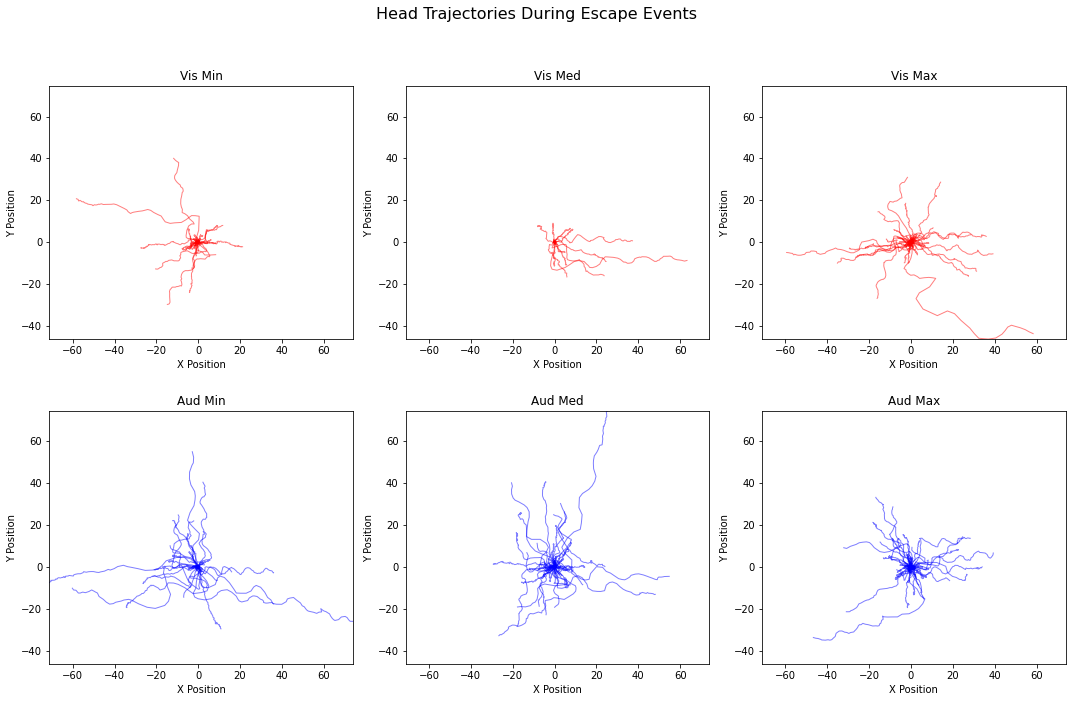

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define intensities and stimuli for subplots
intensities = ['min', 'med', 'max']
visual_stimuli = [f'v{i}' for i in intensities]  # ['vmin', 'vmed', 'vmax']
auditory_stimuli = [f'a{i}' for i in intensities]  # ['amin', 'amed', 'amax']

# Initialize the plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Head Trajectories During Escape Events", fontsize=16)

# Calculate the common x and y limits by gathering all positions
all_x_positions = []
all_y_positions = []

# Loop through each stimulus and extract head trajectories
for row, stim_list in enumerate([visual_stimuli, auditory_stimuli]):
    for col, stim in enumerate(stim_list):
        ax = axes[row, col]

        if stim not in data:
            print(f"Warning: Stimulus {stim} not found in data.")
            continue

        # Loop through trials and extract escape event trajectories
        for trial_idx in range(len(data[stim]["trials"])):
            # Check if there's an escape event in the trial
            if data[stim]["is_escape"][trial_idx]:
                # Get tracking data for events
                tracked_events = data[stim]["tracked_events"][trial_idx]

                # Loop through each event in the trial
                for event_data in tracked_events:
                    # Calculate head position as the average of eyeL and eyeR positions
                    head_x = (event_data[:, bodyparts.index("eyeL"), 0] + event_data[:, bodyparts.index("eyeR"), 0]) / 2
                    head_y = (event_data[:, bodyparts.index("eyeL"), 1] + event_data[:, bodyparts.index("eyeR"), 1]) / 2
                    
                    # Normalize trajectory by subtracting initial position
                    head_x -= head_x[0]
                    head_y -= head_y[0]
                    
                    # Collect positions for global axis limits
                    all_x_positions.extend(head_x)
                    all_y_positions.extend(head_y)

                    # Plot the trajectory for this escape event
                    ax.plot(head_x, head_y, color="red" if stim in visual_stimuli else "blue", alpha=0.5, lw=1)

        # Set title using stim_labels
        ax.set_title(data["stim_labels"][stim])

        # Aspect ratio to make trajectories more interpretable
        ax.set_aspect('equal', adjustable='box')

# Apply consistent limits to all subplots
x_limits = [min(all_x_positions), max(all_x_positions)]
y_limits = [min(all_y_positions), max(all_y_positions)]

for ax in axes.flat:
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


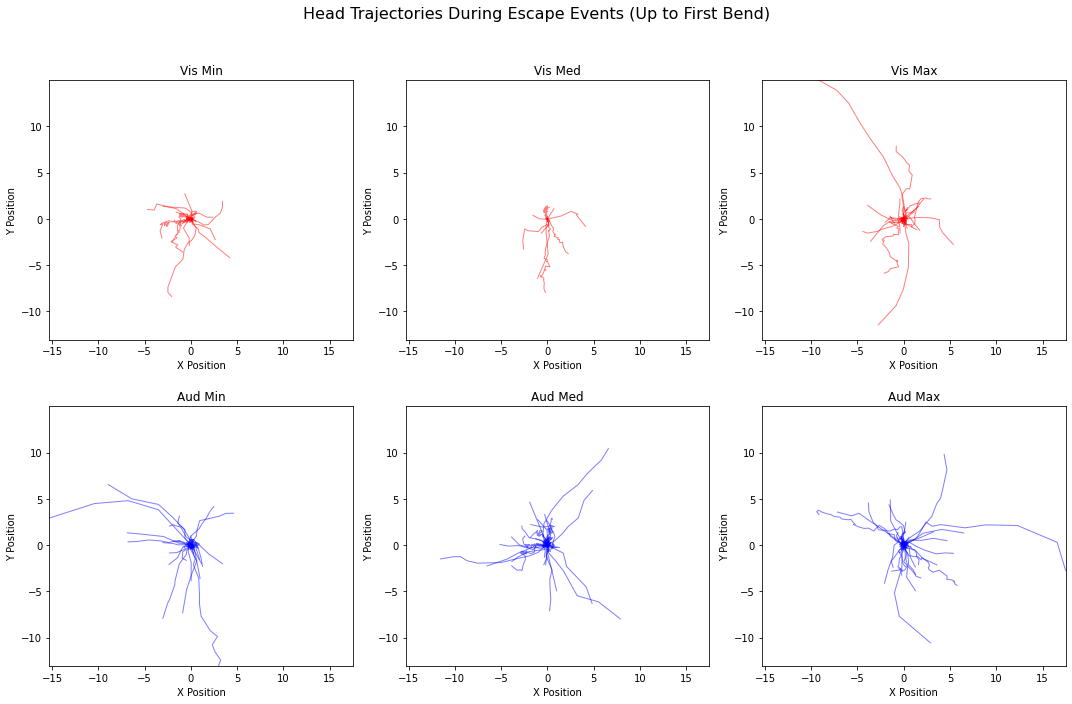

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Define intensities and stimuli for subplots
intensities = ['min', 'med', 'max']
visual_stimuli = [f'v{i}' for i in intensities]  # ['vmin', 'vmed', 'vmax']
auditory_stimuli = [f'a{i}' for i in intensities]  # ['amin', 'amed', 'amax']

# Function to calculate heading angles and find the start and end of the first bend
def calculate_heading_angles(event_data):
    # Get the head position as the average of eyeL and eyeR
    head_x = (event_data[:, bodyparts.index("eyeL"), 0] + event_data[:, bodyparts.index("eyeR"), 0]) / 2
    head_y = (event_data[:, bodyparts.index("eyeL"), 1] + event_data[:, bodyparts.index("eyeR"), 1]) / 2

    # Get the position of vejigaP
    vejigaP_x = event_data[:, bodyparts.index("vejigaP"), 0]
    vejigaP_y = event_data[:, bodyparts.index("vejigaP"), 1]

    # Calculate the initial heading vector (from vejigaP to head in the first frame)
    initial_vec_x = head_x[0] - vejigaP_x[0]
    initial_vec_y = head_y[0] - vejigaP_y[0]
    initial_angle = np.arctan2(initial_vec_y, initial_vec_x)

    # Calculate heading angles relative to the initial vector
    angles_over_time = []
    for i in range(len(head_x)):
        # Current heading vector
        vec_x = head_x[i] - vejigaP_x[i]
        vec_y = head_y[i] - vejigaP_y[i]
        
        # Angle of the current vector relative to the initial vector
        current_angle = np.arctan2(vec_y, vec_x)
        relative_angle = current_angle - initial_angle
        relative_angle = (relative_angle + np.pi) % (2 * np.pi) - np.pi  # Normalize to [-pi, pi]

        angles_over_time.append(relative_angle)

    return np.array(angles_over_time)

# Smoothing function (moving average)
def smooth_data(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Derivative function (frame-by-frame difference)
def calculate_derivative(data):
    return np.diff(data)

# Find the start and end of the first bend
def find_first_bend(heading_angles):
    smoothed_angles = smooth_data(heading_angles, window_size=5)
    derivative_angles = calculate_derivative(smoothed_angles)

    threshold = 0.03
    if np.max(np.abs(derivative_angles)) > threshold:
        # Find the first frame where the derivative surpasses the threshold
        first_above_threshold = np.argmax(np.abs(derivative_angles) > threshold)
        sign = np.sign(derivative_angles[first_above_threshold])

        # Find the start of the bend
        start_bend = first_above_threshold
        while start_bend > 0 and np.sign(derivative_angles[start_bend - 1]) == sign:
            start_bend -= 1

        # Find the end of the bend
        end_bend = first_above_threshold
        while end_bend < len(derivative_angles) - 1 and np.sign(derivative_angles[end_bend + 1]) == sign:
            end_bend += 1

        return start_bend, end_bend
    return None, None

# Initialize the plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Head Trajectories During Escape Events (Up to First Bend)", fontsize=16)

# Calculate the common x and y limits by gathering all positions
all_x_positions = []
all_y_positions = []

# Loop through each stimulus and extract head trajectories
for row, stim_list in enumerate([visual_stimuli, auditory_stimuli]):
    for col, stim in enumerate(stim_list):
        ax = axes[row, col]

        if stim not in data:
            print(f"Warning: Stimulus {stim} not found in data.")
            continue

        # Loop through trials and extract escape event trajectories
        for trial_idx in range(len(data[stim]["trials"])):
            # Check if there's an escape event in the trial
            if data[stim]["is_escape"][trial_idx]:
                # Get tracking data for events
                tracked_events = data[stim]["tracked_events"][trial_idx]

                # Loop through each event in the trial
                for event_data in tracked_events:
                    # Calculate heading angles over time and detect the first bend
                    heading_angles = calculate_heading_angles(event_data)
                    start_bend, end_bend = find_first_bend(heading_angles)

                    if start_bend is not None and end_bend is not None:
                        # Calculate head position as the average of eyeL and eyeR positions up to the end of the first bend
                        head_x = (event_data[:end_bend + 1, bodyparts.index("eyeL"), 0] + event_data[:end_bend + 1, bodyparts.index("eyeR"), 0]) / 2
                        head_y = (event_data[:end_bend + 1, bodyparts.index("eyeL"), 1] + event_data[:end_bend + 1, bodyparts.index("eyeR"), 1]) / 2

                        # Normalize trajectory by subtracting initial position
                        head_x -= head_x[0]
                        head_y -= head_y[0]

                        # Collect positions for global axis limits
                        all_x_positions.extend(head_x)
                        all_y_positions.extend(head_y)

                        # Plot the trajectory up to the end of the first bend
                        color = "red" if stim in visual_stimuli else "blue"
                        ax.plot(head_x, head_y, color=color, alpha=0.5, lw=1)

        # Set title using stim_labels
        ax.set_title(data["stim_labels"][stim])

        # Aspect ratio to make trajectories more interpretable
        ax.set_aspect('equal', adjustable='box')

# Apply consistent limits to all subplots
x_limits = [min(all_x_positions), max(all_x_positions)]
y_limits = [min(all_y_positions), max(all_y_positions)]

for ax in axes.flat:
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


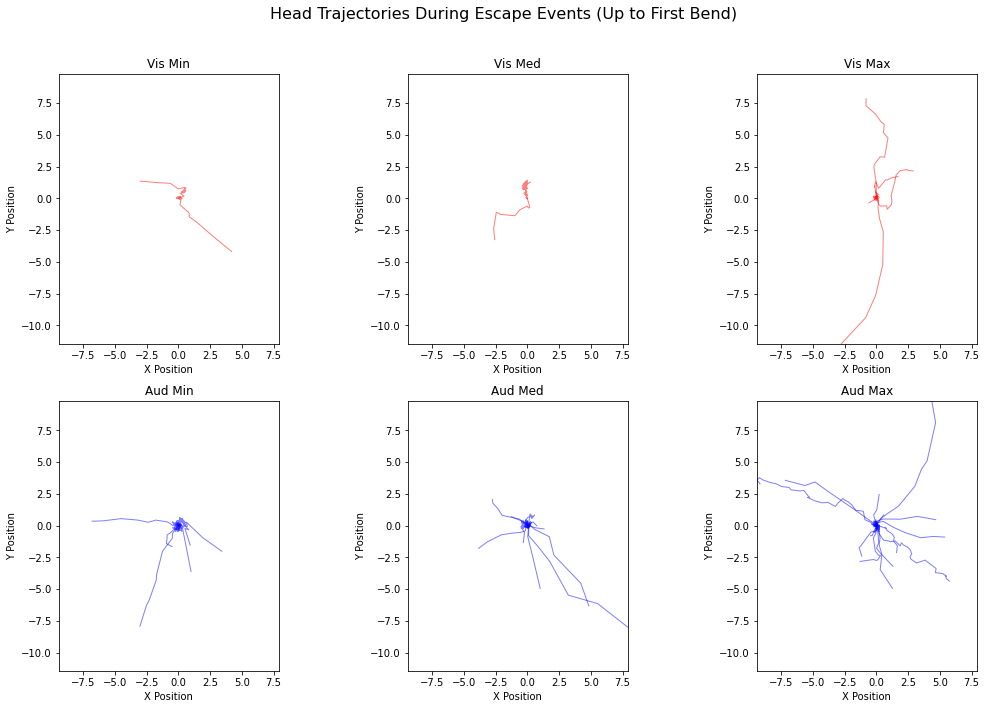

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Define intensities and stimuli for subplots
intensities = ['min', 'med', 'max']
visual_stimuli = [f'v{i}' for i in intensities]  # ['vmin', 'vmed', 'vmax']
auditory_stimuli = [f'a{i}' for i in intensities]  # ['amin', 'amed', 'amax']

# Function to calculate heading angles and find the start and end of the first bend
def calculate_heading_angles(event_data):
    # Get the head position as the average of eyeL and eyeR
    head_x = (event_data[:, bodyparts.index("eyeL"), 0] + event_data[:, bodyparts.index("eyeR"), 0]) / 2
    head_y = (event_data[:, bodyparts.index("eyeL"), 1] + event_data[:, bodyparts.index("eyeR"), 1]) / 2

    # Get the position of vejigaP
    vejigaP_x = event_data[:, bodyparts.index("vejigaP"), 0]
    vejigaP_y = event_data[:, bodyparts.index("vejigaP"), 1]

    # Calculate the initial heading vector (from vejigaP to head in the first frame)
    initial_vec_x = head_x[0] - vejigaP_x[0]
    initial_vec_y = head_y[0] - vejigaP_y[0]
    initial_angle = np.arctan2(initial_vec_y, initial_vec_x)

    # Calculate heading angles relative to the initial vector
    angles_over_time = []
    for i in range(len(head_x)):
        # Current heading vector
        vec_x = head_x[i] - vejigaP_x[i]
        vec_y = head_y[i] - vejigaP_y[i]
        
        # Angle of the current vector relative to the initial vector
        current_angle = np.arctan2(vec_y, vec_x)
        relative_angle = current_angle - initial_angle
        relative_angle = (relative_angle + np.pi) % (2 * np.pi) - np.pi  # Normalize to [-pi, pi]

        angles_over_time.append(relative_angle)

    return np.array(angles_over_time)

# Smoothing function (moving average)
def smooth_data(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Derivative function (frame-by-frame difference)
def calculate_derivative(data):
    return np.diff(data)

# Find the start and end of the first bend
def find_first_bend(heading_angles):
    smoothed_angles = smooth_data(heading_angles, window_size=5)
    derivative_angles = calculate_derivative(smoothed_angles)

    threshold = 0.03
    if np.max(np.abs(derivative_angles)) > threshold:
        # Find the first frame where the derivative surpasses the threshold
        first_above_threshold = np.argmax(np.abs(derivative_angles) > threshold)
        sign = np.sign(derivative_angles[first_above_threshold])

        # Find the start of the bend
        start_bend = first_above_threshold
        while start_bend > 0 and np.sign(derivative_angles[start_bend - 1]) == sign:
            start_bend -= 1

        # Find the end of the bend
        end_bend = first_above_threshold
        while end_bend < len(derivative_angles) - 1 and np.sign(derivative_angles[end_bend + 1]) == sign:
            end_bend += 1

        return start_bend, end_bend
    return None, None

# Initialize the plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Head Trajectories During Escape Events (Up to First Bend)", fontsize=16)

# Calculate the common x and y limits by gathering all positions
all_x_positions = []
all_y_positions = []

# Loop through each stimulus and extract head trajectories
for row, stim_list in enumerate([visual_stimuli, auditory_stimuli]):
    for col, stim in enumerate(stim_list):
        ax = axes[row, col]

        if stim not in data:
            print(f"Warning: Stimulus {stim} not found in data.")
            continue

        # Loop through trials and extract escape event trajectories
        for trial_idx in range(len(data[stim]["trials"])):
            # Check if there's an escape event in the trial
            if data[stim]["is_escape"][trial_idx]:
                # Get tracking data for events
                tracked_events = data[stim]["tracked_events"][trial_idx]
                event_times = data[stim]["valid_event_times"][trial_idx]  # Get event times for the trial

                # Loop through each event in the trial
                for event_idx, event_data in enumerate(tracked_events):
                    event_time = event_times[event_idx]  # Frame number of the event start

                    # Check if event time is within the stim window
                    if data["window_start"] <= event_time <= data["window_end"]:
                        # Calculate heading angles over time and detect the first bend
                        heading_angles = calculate_heading_angles(event_data)
                        start_bend, end_bend = find_first_bend(heading_angles)

                        if start_bend is not None and end_bend is not None:
                            # Calculate head position as the average of eyeL and eyeR positions up to the end of the first bend
                            head_x = (event_data[:end_bend + 1, bodyparts.index("eyeL"), 0] +
                                      event_data[:end_bend + 1, bodyparts.index("eyeR"), 0]) / 2
                            head_y = (event_data[:end_bend + 1, bodyparts.index("eyeL"), 1] +
                                      event_data[:end_bend + 1, bodyparts.index("eyeR"), 1]) / 2

                            # Normalize trajectory by subtracting initial position
                            head_x -= head_x[0]
                            head_y -= head_y[0]

                            # Collect positions for global axis limits
                            all_x_positions.extend(head_x)
                            all_y_positions.extend(head_y)

                            # Plot the trajectory up to the end of the first bend
                            color = "red" if stim in visual_stimuli else "blue"
                            ax.plot(head_x, head_y, color=color, alpha=0.5, lw=1)

        # Set title using stim_labels
        ax.set_title(data["stim_labels"][stim])

        # Aspect ratio to make trajectories more interpretable
        ax.set_aspect('equal', adjustable='box')

# Apply consistent limits to all subplots
x_limits = [min(all_x_positions), max(all_x_positions)]
y_limits = [min(all_y_positions), max(all_y_positions)]

for ax in axes.flat:
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


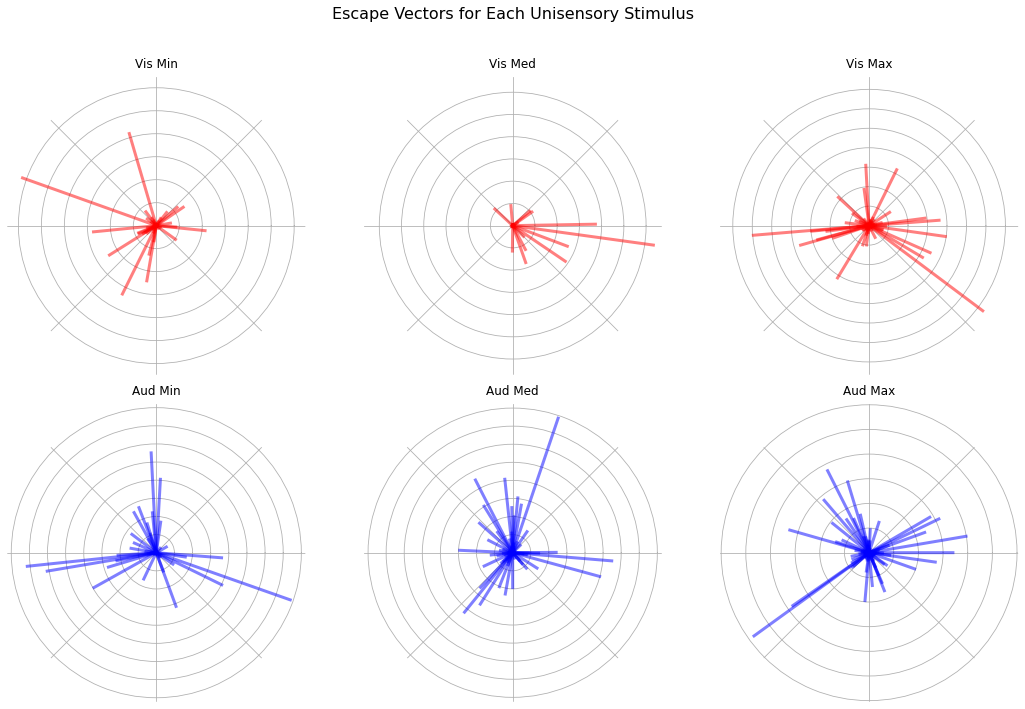

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define intensities and stimuli for subplots
intensities = ['min', 'med', 'max']
visual_stimuli = [f'v{i}' for i in intensities]  # ['vmin', 'vmed', 'vmax']
auditory_stimuli = [f'a{i}' for i in intensities]  # ['amin', 'amed', 'amax']

# Initialize the polar plot
fig, axes = plt.subplots(2, 3, subplot_kw={'projection': 'polar'}, figsize=(15, 10))
fig.suptitle("Escape Vectors for Each Unisensory Stimulus", fontsize=16)

# Loop through each stimulus and calculate escape vectors
for row, stim_list in enumerate([visual_stimuli, auditory_stimuli]):
    for col, stim in enumerate(stim_list):
        ax = axes[row, col]

        if stim not in data:
            print(f"Warning: Stimulus {stim} not found in data.")
            continue

        # Loop through trials and calculate escape vectors
        for trial_idx in range(len(data[stim]["trials"])):
            # Check if there's an escape event in the trial
            if data[stim]["is_escape"][trial_idx]:
                # Get tracking data for events
                tracked_events = data[stim]["tracked_events"][trial_idx]

                # Loop through each event in the trial
                for event_data in tracked_events:
                    # Calculate normalized head position
                    head_x = (event_data[:, bodyparts.index("eyeL"), 0] + event_data[:, bodyparts.index("eyeR"), 0]) / 2
                    head_y = (event_data[:, bodyparts.index("eyeL"), 1] + event_data[:, bodyparts.index("eyeR"), 1]) / 2

                    # Normalize trajectory by subtracting initial position
                    head_x -= head_x[0]
                    head_y -= head_y[0]

                    # Calculate the vector from the start to the end of the trajectory
                    delta_x = head_x[-1] - head_x[0]
                    delta_y = head_y[-1] - head_y[0]

                    # Calculate the magnitude and angle of the vector
                    magnitude = np.sqrt(delta_x**2 + delta_y**2)
                    angle = np.arctan2(delta_y, delta_x)

                    # Plot the vector on the polar plot
                    ax.plot([0, angle], [0, magnitude], color="red" if stim in visual_stimuli else "blue", alpha=0.5, lw=3)

        # Set title using stim_labels
        ax.set_title(data["stim_labels"][stim], va='bottom', fontsize=12)

        # Remove radial and angular gridlines, labels, and circles for a cleaner look
        #ax.grid(False)
        ax.set_yticklabels([])  # Remove radial distance labels
        ax.set_xticklabels([])  # Remove angular labels
        ax.spines['polar'].set_visible(False)  # Hide the polar circle boundary

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


In [133]:
os.chdir(r"G:\My Drive\Proyectos\Zebrafish Multisensory Integration\Cstart Escape Response and Integration - Behavioral Paradigm\Resultados")

Rayleigh test for vmin: p-value = 1.7185365625831974
Rayleigh test for vmed: p-value = 0.05607447641105779
Rayleigh test for vmax: p-value = 8.700469140055823
Rayleigh test for amin: p-value = 7.960717776325647
Rayleigh test for amed: p-value = 9.006531034616216
Rayleigh test for amax: p-value = 13.593300386538749


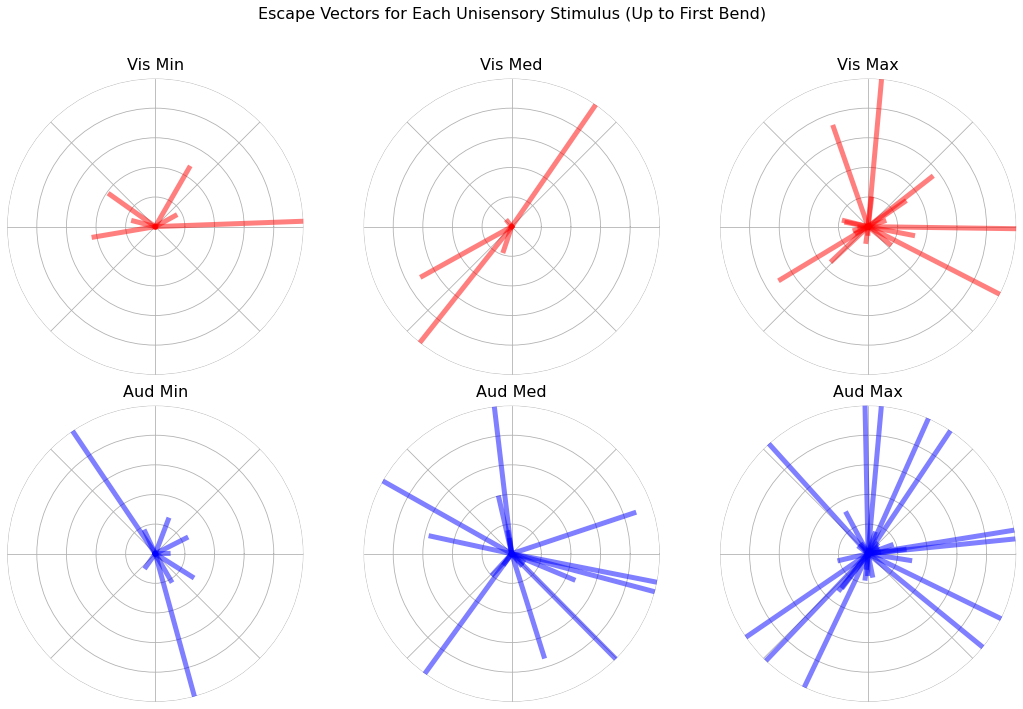

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pycircstat

# Define intensities and stimuli for subplots
intensities = ['min', 'med', 'max']
visual_stimuli = [f'v{i}' for i in intensities]  # ['vmin', 'vmed', 'vmax']
auditory_stimuli = [f'a{i}' for i in intensities]  # ['amin', 'amed', 'amax']

# Store angles for each stimulus to perform the Rayleigh test
stim_angles = {stim: [] for stim in visual_stimuli + auditory_stimuli}

# Function to calculate the angle between heading vector and initial vector without discontinuities
def calculate_heading_angles(event_data):
    # Get the head position as the average of eyeL and eyeR
    head_x = (event_data[:, bodyparts.index("eyeL"), 0] + event_data[:, bodyparts.index("eyeR"), 0]) / 2
    head_y = (event_data[:, bodyparts.index("eyeL"), 1] + event_data[:, bodyparts.index("eyeR"), 1]) / 2

    # Get the position of vejigaP
    vejigaP_x = event_data[:, bodyparts.index("vejigaP"), 0]
    vejigaP_y = event_data[:, bodyparts.index("vejigaP"), 1]

    # Calculate the initial heading vector (from vejigaP to head in the first frame)
    initial_vec_x = head_x[0] - vejigaP_x[0]
    initial_vec_y = head_y[0] - vejigaP_y[0]
    initial_magnitude = np.sqrt(initial_vec_x**2 + initial_vec_y**2)

    # Calculate heading angles relative to the initial vector using the dot product
    angles_over_time = []
    for i in range(len(head_x)):
        # Current heading vector
        vec_x = head_x[i] - vejigaP_x[i]
        vec_y = head_y[i] - vejigaP_y[i]
        vec_magnitude = np.sqrt(vec_x**2 + vec_y**2)

        # Calculate the dot product with the initial vector
        dot_product = initial_vec_x * vec_x + initial_vec_y * vec_y
        cosine_angle = dot_product / (initial_magnitude * vec_magnitude)

        # Clamp cosine_angle to the range [-1, 1] to avoid numerical errors with arccos
        cosine_angle = np.clip(cosine_angle, -1.0, 1.0)

        # Calculate the angle between the initial vector and the current vector
        relative_angle = np.arccos(cosine_angle)
        angles_over_time.append(relative_angle)

    return np.array(angles_over_time)

# Smoothing function (moving average)
def smooth_data(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Derivative function (frame-by-frame difference)
def calculate_derivative(data):
    return np.diff(data)

# Find the start and end of the first bend
def find_first_bend(heading_angles):
    smoothed_angles = smooth_data(heading_angles, window_size=5)
    derivative_angles = calculate_derivative(smoothed_angles)

    threshold = 0.0
    if np.max(np.abs(derivative_angles)) > threshold:
        # Find the first frame where the derivative surpasses the threshold
        first_above_threshold = np.argmax(np.abs(derivative_angles) > threshold)
        sign = np.sign(derivative_angles[first_above_threshold])

        # Find the start of the bend
        start_bend = first_above_threshold
        while start_bend > 0 and np.sign(derivative_angles[start_bend - 1]) == sign:
            start_bend -= 1

        # Find the end of the bend
        end_bend = first_above_threshold
        while end_bend < len(derivative_angles) - 1 and np.sign(derivative_angles[end_bend + 1]) == sign:
            end_bend += 1

        return start_bend, end_bend
    return None, None

# Initialize the polar plot
fig, axes = plt.subplots(2, 3, subplot_kw={'projection': 'polar'}, figsize=(15, 10))
fig.suptitle("Escape Vectors for Each Unisensory Stimulus (Up to First Bend)", fontsize=16)

# Loop through each stimulus and calculate escape vectors
for row, stim_list in enumerate([visual_stimuli, auditory_stimuli]):
    for col, stim in enumerate(stim_list):
        ax = axes[row, col]

        if stim not in data:
            print(f"Warning: Stimulus {stim} not found in data.")
            continue

        # Loop through trials and calculate escape vectors
        for trial_idx in range(len(data[stim]["trials"])):
            # Check if there's an escape event in the trial
            if data[stim]["is_escape"][trial_idx]:
                # Get tracking data for events
                tracked_events = data[stim]["tracked_events"][trial_idx]
                event_times = data[stim]["valid_event_times"][trial_idx]  # Get event times for the trial
                
                # Loop through each event in the trial
                for event_idx, event_data in enumerate(tracked_events):
                    event_time = event_times[event_idx]  # Frame number of the event start

                    # Check if event time is within the stim window
                    if data["window_start"] <= event_time <= data["window_end"]:
                        # Calculate heading angles over time and detect the first bend
                        heading_angles = calculate_heading_angles(event_data)
                        _, end_bend = find_first_bend(heading_angles)

                        if end_bend is not None:
                            # Calculate head position as the average of eyeL and eyeR positions up to the end of the first bend
                            head_x = (event_data[:end_bend + 1, bodyparts.index("eyeL"), 0] + event_data[:end_bend + 1, bodyparts.index("eyeR"), 0]) / 2
                            head_y = (event_data[:end_bend + 1, bodyparts.index("eyeL"), 1] + event_data[:end_bend + 1, bodyparts.index("eyeR"), 1]) / 2

                            # Normalize trajectory by subtracting initial position
                            head_x -= head_x[0]
                            head_y -= head_y[0]

                            # Calculate the vector from the start to the end of the first bend
                            delta_x = head_x[-1] - head_x[0]
                            delta_y = head_y[-1] - head_y[0]

                            # Calculate the magnitude and angle of the vector
                            magnitude = np.sqrt(delta_x**2 + delta_y**2)
                            angle = np.arctan2(delta_y, delta_x)

                            # Store angle for Rayleigh test
                            stim_angles[stim].append(angle)

                            # Plot the vector on the polar plot
                            color = "red" if stim in visual_stimuli else "blue"
                            ax.plot([0, angle], [0, magnitude], color=color, alpha=0.5, lw=5)

        # Set title using stim_labels
        ax.set_title(data["stim_labels"][stim], va='bottom', fontsize=16)
        
        ax.set_ylim(0,1)

        # Remove radial and angular gridlines, labels, and circles for a cleaner look
        ax.set_yticklabels([])  # Remove radial distance labels
        ax.set_xticklabels([])  # Remove angular labels
        ax.spines['polar'].set_visible(False)  # Hide the polar circle boundary

# Perform Rayleigh test for each stimulus using pycircstat
rayleigh_results = {}
for stim, angles in stim_angles.items():
    angles_array = np.array(angles)
    _, p_value = pycircstat.tests.rayleigh(angles_array)
    rayleigh_results[stim] = p_value
    print(f"Rayleigh test for {stim}: p-value = {p_value}")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.savefig(os.getcwd() + "/escape_event_trajectories.pdf", format="pdf")
plt.show()


Rayleigh test for vmin: p-value = 0.1894419202394349
Rayleigh test for vmed: p-value = 0.9668242396779231
Rayleigh test for vmax: p-value = 0.7973967470945723
Rayleigh test for amin: p-value = 1.3760331267049142
Rayleigh test for amed: p-value = 0.0888160622769449
Rayleigh test for amax: p-value = 0.18532987224337097


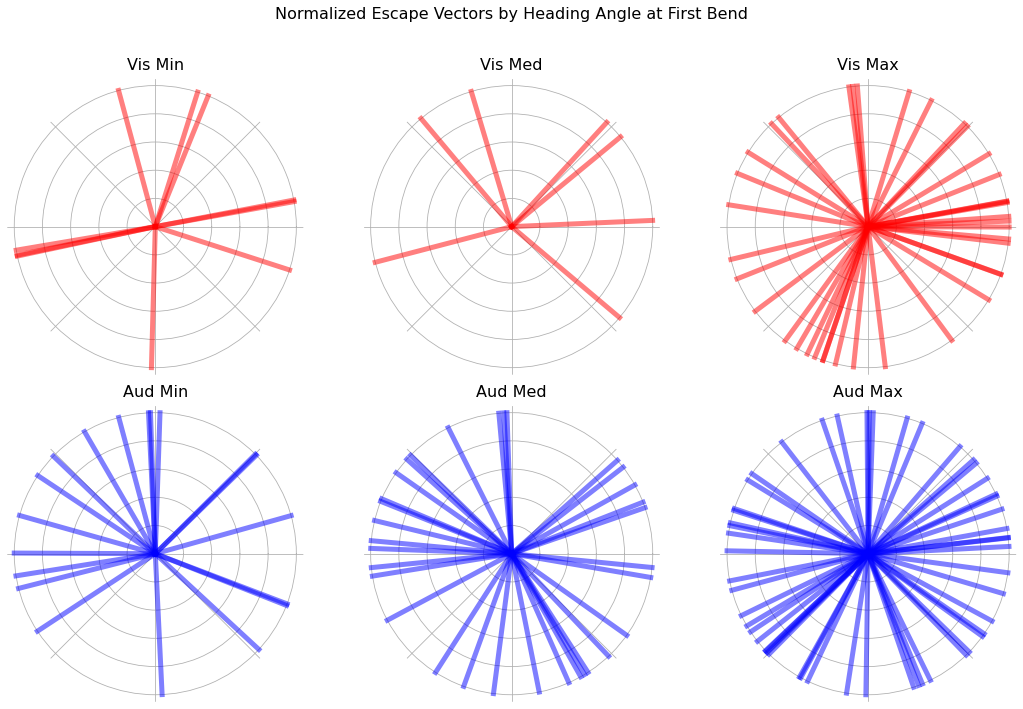

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pycircstat

# Define intensities and stimuli for subplots
intensities = ['min', 'med', 'max']
visual_stimuli = [f'v{i}' for i in intensities]  # ['vmin', 'vmed', 'vmax']
auditory_stimuli = [f'a{i}' for i in intensities]  # ['amin', 'amed', 'amax']

# Store angles for each stimulus to perform the Rayleigh test
stim_angles = {stim: [] for stim in visual_stimuli + auditory_stimuli}

# Function to calculate heading angles
def calculate_heading_angle(event_data, end_bend):
    # Get the head position as the average of eyeL and eyeR at the end of the bend
    head_x = (event_data[end_bend, bodyparts.index("eyeL"), 0] + event_data[end_bend, bodyparts.index("eyeR"), 0]) / 2
    head_y = (event_data[end_bend, bodyparts.index("eyeL"), 1] + event_data[end_bend, bodyparts.index("eyeR"), 1]) / 2

    # Get the position of vejigaP at the end of the bend
    vejigaP_x = event_data[end_bend, bodyparts.index("vejigaP"), 0]
    vejigaP_y = event_data[end_bend, bodyparts.index("vejigaP"), 1]

    # Calculate the heading vector and its angle
    delta_x = head_x - vejigaP_x
    delta_y = head_y - vejigaP_y
    angle = np.arctan2(delta_y, delta_x)

    return angle

# Initialize the polar plot
fig, axes = plt.subplots(2, 3, subplot_kw={'projection': 'polar'}, figsize=(15, 10))
fig.suptitle("Normalized Escape Vectors by Heading Angle at First Bend", fontsize=16)

# Loop through each stimulus and calculate escape vectors
for row, stim_list in enumerate([visual_stimuli, auditory_stimuli]):
    for col, stim in enumerate(stim_list):
        ax = axes[row, col]

        if stim not in data:
            print(f"Warning: Stimulus {stim} not found in data.")
            continue

        # Loop through trials and calculate escape vectors
        for trial_idx in range(len(data[stim]["trials"])):
            # Check if there's an escape event in the trial
            if data[stim]["is_escape"][trial_idx]:
                # Get tracking data for events
                tracked_events = data[stim]["tracked_events"][trial_idx]
                event_times = data[stim]["valid_event_times"][trial_idx]  # Get event times for the trial
                
                # Loop through each event in the trial
                for event_idx, event_data in enumerate(tracked_events):
                    event_time = event_times[event_idx]  # Frame number of the event start

                    # Check if event time is within the stim window
                    if data["window_start"] <= event_time <= data["window_end"]:
                        # Calculate heading angles over time and detect the first bend
                        heading_angles = calculate_heading_angles(event_data)
                        _, end_bend = find_first_bend(heading_angles)

                        if end_bend is not None:
                            # Calculate heading angle at the end of the first bend
                            heading_angle = calculate_heading_angle(event_data, end_bend)

                            # Store angle for Rayleigh test
                            stim_angles[stim].append(heading_angle)

                            # Plot the normalized vector on the polar plot
                            color = "red" if stim in visual_stimuli else "blue"
                            ax.plot([0, heading_angle], [0, 1], color=color, alpha=0.5, lw=5)

        # Set title using stim_labels
        ax.set_title(data["stim_labels"][stim], va='bottom', fontsize=16)
        
        # Remove radial and angular gridlines, labels, and circles for a cleaner look
        ax.set_yticklabels([])  # Remove radial distance labels
        ax.set_xticklabels([])  # Remove angular labels
        ax.spines['polar'].set_visible(False)  # Hide the polar circle boundary

# Perform Rayleigh test for each stimulus using pycircstat
rayleigh_results = {}
for stim, angles in stim_angles.items():
    angles_array = np.array(angles)
    _, p_value = pycircstat.tests.rayleigh(angles_array)
    rayleigh_results[stim] = p_value
    print(f"Rayleigh test for {stim}: p-value = {p_value}")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.savefig(os.getcwd() + "/escape_event_trajectories.pdf", format="pdf")
plt.show()


Stimulus vmin: Wilcoxon p-value = 0.5296
Stimulus vmed: Wilcoxon p-value = 0.2343
Stimulus vmax: Wilcoxon p-value = 0.6339
Stimulus amin: Wilcoxon p-value = 0.0922
Stimulus amed: Wilcoxon p-value = 0.2616
Stimulus amax: Wilcoxon p-value = 0.5340


C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\envs\imaging\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\envs\imaging\

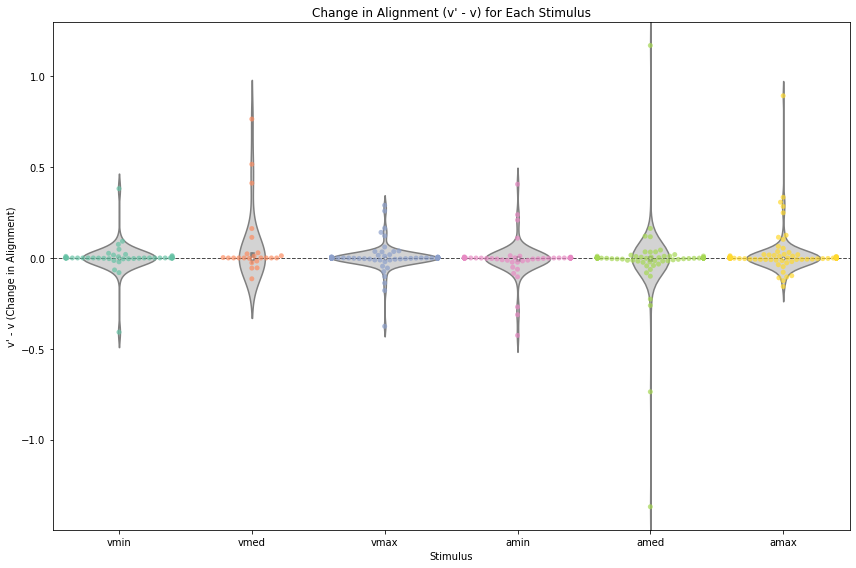

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import wilcoxon

# Define stimulus vectors
auditory_stimulus_vector = np.array([-1, 0])  # Horizontal left
visual_stimulus_vector = np.array([0, 1])  # Vertical up

# Store results for analysis and plotting
stim_results = {stim: [] for stim in visual_stimuli + auditory_stimuli}

# Function to calculate the angular difference between two vectors
def calculate_vector_difference(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    magnitude_product = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    cosine_angle = dot_product / magnitude_product
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)  # Avoid numerical errors
    return np.arccos(cosine_angle)  # Angle in radians

# Loop through each stimulus and calculate v' - v
for stim in visual_stimuli + auditory_stimuli:
    if stim not in data:
        print(f"Warning: Stimulus {stim} not found in data.")
        continue

    stim_vector = (
        visual_stimulus_vector if stim in visual_stimuli else auditory_stimulus_vector
    )

    for trial_idx in range(len(data[stim]["trials"])):
        if data[stim]["is_escape"][trial_idx]:
            # Get tracking data for events
            tracked_events = data[stim]["tracked_events"][trial_idx]

            for event_data in tracked_events:
                # Initial heading vector
                initial_vec_x = (
                    (event_data[0, bodyparts.index("eyeL"), 0] + event_data[0, bodyparts.index("eyeR"), 0]) / 2
                    - event_data[0, bodyparts.index("vejigaP"), 0]
                )
                initial_vec_y = (
                    (event_data[0, bodyparts.index("eyeL"), 1] + event_data[0, bodyparts.index("eyeR"), 1]) / 2
                    - event_data[0, bodyparts.index("vejigaP"), 1]
                )
                initial_vector = np.array([initial_vec_x, initial_vec_y])

                # Final heading vector (at the end of the first bend)
                _, end_bend = find_first_bend(calculate_heading_angles(event_data))
                if end_bend is None:
                    continue
                final_vec_x = (
                    (event_data[end_bend, bodyparts.index("eyeL"), 0] + event_data[end_bend, bodyparts.index("eyeR"), 0]) / 2
                    - event_data[end_bend, bodyparts.index("vejigaP"), 0]
                )
                final_vec_y = (
                    (event_data[end_bend, bodyparts.index("eyeL"), 1] + event_data[end_bend, bodyparts.index("eyeR"), 1]) / 2
                    - event_data[end_bend, bodyparts.index("vejigaP"), 1]
                )
                final_vector = np.array([final_vec_x, final_vec_y])

                # Calculate v and v'
                v = calculate_vector_difference(initial_vector, stim_vector)
                v_prime = calculate_vector_difference(final_vector, stim_vector)

                # Append v' - v
                stim_results[stim].append(v_prime - v)

# Convert results into a DataFrame for seaborn
plot_data = []
for stim, values in stim_results.items():
    for value in values:
        plot_data.append({"Stimulus": stim, "v' - v": value})
df = pd.DataFrame(plot_data)

# Perform Wilcoxon signed-rank test for each stimulus
wilcoxon_results = {}
for stim in stim_results.keys():
    differences = stim_results[stim]
    if len(differences) > 0:
        stat, p_value = wilcoxon(differences, alternative="two-sided")
        wilcoxon_results[stim] = p_value
        print(f"Stimulus {stim}: Wilcoxon p-value = {p_value:.4f}")
    else:
        wilcoxon_results[stim] = None
        print(f"Stimulus {stim}: No data available for testing.")

# Plotting
plt.figure(figsize=(12, 8))
sns.violinplot(x="Stimulus", y="v' - v", data=df, inner="box", color="lightgray")
sns.swarmplot(x="Stimulus", y="v' - v", data=df, hue="Stimulus", dodge=False, alpha=0.7, palette="Set2")
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)  # Reference line at 0
plt.title("Change in Alignment (v' - v) for Each Stimulus")
plt.ylabel("v' - v (Change in Alignment)")
plt.xlabel("Stimulus")
plt.legend([],[], frameon=False)  # Remove legend for swarmplot colors
plt.tight_layout()
plt.show()


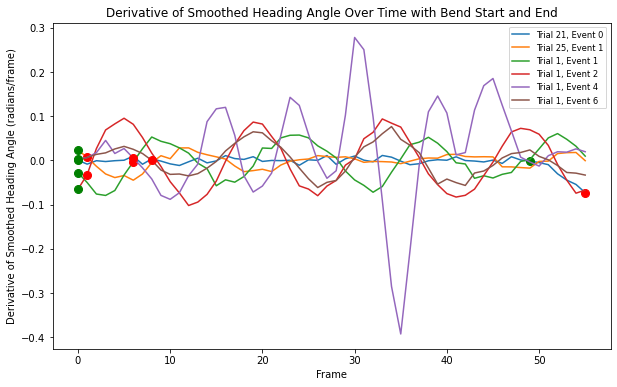

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to calculate the heading angle over time
def calculate_heading_angles(event_data):
    # Get the head position as the average of eyeL and eyeR
    head_x = (event_data[:, bodyparts.index("eyeL"), 0] + event_data[:, bodyparts.index("eyeR"), 0]) / 2
    head_y = (event_data[:, bodyparts.index("eyeL"), 1] + event_data[:, bodyparts.index("eyeR"), 1]) / 2

    # Get the position of vejigaP
    vejigaP_x = event_data[:, bodyparts.index("vejigaP"), 0]
    vejigaP_y = event_data[:, bodyparts.index("vejigaP"), 1]

    # Calculate the initial heading vector (from vejigaP to head in the first frame)
    initial_vec_x = head_x[0] - vejigaP_x[0]
    initial_vec_y = head_y[0] - vejigaP_y[0]
    initial_angle = np.arctan2(initial_vec_y, initial_vec_x)

    # Calculate heading angles relative to the initial vector
    angles_over_time = []
    for i in range(len(head_x)):
        # Current heading vector
        vec_x = head_x[i] - vejigaP_x[i]
        vec_y = head_y[i] - vejigaP_y[i]
        
        # Angle of the current vector relative to the initial vector
        current_angle = np.arctan2(vec_y, vec_x)
        relative_angle = current_angle - initial_angle
        relative_angle = (relative_angle + np.pi) % (2 * np.pi) - np.pi  # Normalize to [-pi, pi]

        angles_over_time.append(relative_angle)

    return np.array(angles_over_time)

# Smoothing function (moving average)
def smooth_data(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Derivative function (frame-by-frame difference)
def calculate_derivative(data):
    return np.diff(data)

# Threshold for the derivative
threshold = 0.02

# Plot derivative of smoothed heading angles over time with start and end of the bend marked
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Derivative of Smoothed Heading Angle Over Time with Bend Start and End")

# Choose a random set of trials for visualization
stimuli = list(data.keys())
random_stim = random.choice([s for s in stimuli if s not in ["stim_time", "window_start", "window_end", "colors", "stim_labels"]])
random_trials = random.sample(range(len(data[random_stim]["trials"])), min(5, len(data[random_stim]["trials"])))

for trial_idx in random_trials:
    # Check if there's an escape event in the trial
    if data[random_stim]["is_escape"][trial_idx]:
        tracked_events = data[random_stim]["tracked_events"][trial_idx]

        for event_idx, event_data in enumerate(tracked_events):
            # Calculate heading angles over time
            heading_angles = calculate_heading_angles(event_data)
            # Smooth the heading angles
            smoothed_angles = smooth_data(heading_angles, window_size=5)
            # Calculate the derivative of the smoothed heading angles
            derivative_angles = calculate_derivative(smoothed_angles)

            # Check if any derivative surpasses the threshold
            if np.max(np.abs(derivative_angles)) > threshold:
                # Find the first frame where the derivative surpasses the threshold
                first_above_threshold = np.argmax(np.abs(derivative_angles) > threshold)
                sign = np.sign(derivative_angles[first_above_threshold])

                # Find the start of the bend: first frame with the same sign when looking backwards
                start_bend = first_above_threshold
                while start_bend > 0 and np.sign(derivative_angles[start_bend - 1]) == sign:
                    start_bend -= 1

                # Find the end of the bend: last frame with the same sign when looking forwards
                end_bend = first_above_threshold
                while end_bend < len(derivative_angles) - 1 and np.sign(derivative_angles[end_bend + 1]) == sign:
                    end_bend += 1

                # Plot derivative of smoothed heading angles over time
                ax.plot(derivative_angles, label=f'Trial {trial_idx}, Event {event_idx}')
                
                # Mark start and end of the bend
                ax.plot(start_bend, derivative_angles[start_bend], 'go', markersize=8, label='Bend Start' if trial_idx == random_trials[0] and event_idx == 0 else "")
                ax.plot(end_bend, derivative_angles[end_bend], 'ro', markersize=8, label='Bend End' if trial_idx == random_trials[0] and event_idx == 0 else "")

# Improve plot readability
ax.set_xlabel("Frame")
ax.set_ylabel("Derivative of Smoothed Heading Angle (radians/frame)")
ax.legend(loc='best', fontsize='small')
plt.show()


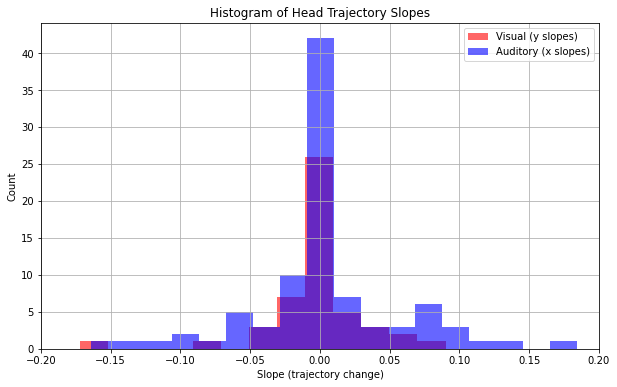

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define unisensory visual and auditory stimuli
unisensory_visual = ['vmin', 'vmed', 'vmax']
unisensory_auditory = ['amin', 'amed', 'amax']

# Storage for slopes
visual_slopes = []
auditory_slopes = []

# Linear regression function to calculate the slope of a trajectory
def calculate_slope(positions):
    frames = np.arange(positions.shape[0])  # Create an array of frame numbers (0 to 50)
    x_slope, _, _, _, _ = linregress(frames, positions[:, 0])  # Linear regression on x-coordinates
    y_slope, _, _, _, _ = linregress(frames, positions[:, 1])  # Linear regression on y-coordinates
    return x_slope, y_slope

# Loop through stims and trials
for stim in data.keys():
    if stim in unisensory_visual or stim in unisensory_auditory:
        for trial_idx in range(len(data[stim]["trials"])):
            valid_event_times = data[stim]["valid_event_times"][trial_idx]
            if len(valid_event_times) == 0:
                continue
            
            tracked_events = data[stim]["tracked_events"][trial_idx]
            for event_idx, event_time in enumerate(valid_event_times):
                # Check if the event is inside the stimulation window
                if data["window_start"] <= event_time <= data["window_end"]:
                    # Extract the last 51 frames of the event window (ignore the first 10)
                    head_positions = tracked_events[event_idx][10:, :, :]
                    head_x = (head_positions[:, 0, 0] + head_positions[:, 1, 0]) / 2  # Average of eyeL_x and eyeR_x
                    head_y = (head_positions[:, 0, 1] + head_positions[:, 1, 1]) / 2  # Average of eyeL_y and eyeR_y

                    # Stack x and y coordinates for linear regression
                    head_trajectory = np.stack((head_x, head_y), axis=1)

                    # Calculate slopes for x and y dimensions
                    x_slope, y_slope = calculate_slope(head_trajectory)

                    # Classify slopes by modality (visual or auditory)
                    if stim in unisensory_visual:
                        visual_slopes.append(-y_slope)  # Use y slope (closer/further to visual stimulus)
                    elif stim in unisensory_auditory:
                        auditory_slopes.append(x_slope)  # Use x slope (closer/further to auditory stimulus)

# Convert to numpy arrays for easy handling
visual_slopes = np.array(visual_slopes)
auditory_slopes = np.array(auditory_slopes)

# Plot histograms for visual and auditory slopes
plt.figure(figsize=(10, 6))

# Histogram for visual slopes
plt.hist(visual_slopes, bins=100, color='red', alpha=0.6, label='Visual (y slopes)')

# Histogram for auditory slopes
plt.hist(auditory_slopes, bins=100, color='blue', alpha=0.6, label='Auditory (x slopes)')
plt.xlim(-0.2,0.2)
plt.xlabel('Slope (trajectory change)')
plt.ylabel('Count')
plt.title('Histogram of Head Trajectory Slopes')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
from scipy.stats import wilcoxon
import numpy as np

# Calculate the mean of the distributions
mean_visual_slopes = np.mean(visual_slopes)
mean_auditory_slopes = np.mean(auditory_slopes)

# Perform Wilcoxon signed-rank test for visual slopes (testing against zero)
stat_visual, p_visual = wilcoxon(visual_slopes - 0)

# Perform Wilcoxon signed-rank test for auditory slopes (testing against zero)
stat_auditory, p_auditory = wilcoxon(auditory_slopes - 0)

# Report the results
print(f"Mean of visual slopes: {mean_visual_slopes:.4f}")
print(f"Mean of auditory slopes: {mean_auditory_slopes:.4f}")

print(f"Wilcoxon signed-rank test for visual slopes: W={stat_visual:.4f}, p-value={p_visual:.4e}")
if p_visual < 0.05:
    print("The visual slope distribution is significantly different from zero.")
else:
    print("The visual slope distribution is not significantly different from zero.")

print(f"Wilcoxon signed-rank test for auditory slopes: W={stat_auditory:.4f}, p-value={p_auditory:.4e}")
if p_auditory < 0.05:
    print("The auditory slope distribution is significantly different from zero.")
else:
    print("The auditory slope distribution is not significantly different from zero.")


Mean of visual slopes: -0.0031
Mean of auditory slopes: 0.0004
Wilcoxon signed-rank test for visual slopes: W=678.0000, p-value=4.4081e-01
The visual slope distribution is not significantly different from zero.
Wilcoxon signed-rank test for auditory slopes: W=2638.0000, p-value=7.6544e-01
The auditory slope distribution is not significantly different from zero.


Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Consistent!
Cons

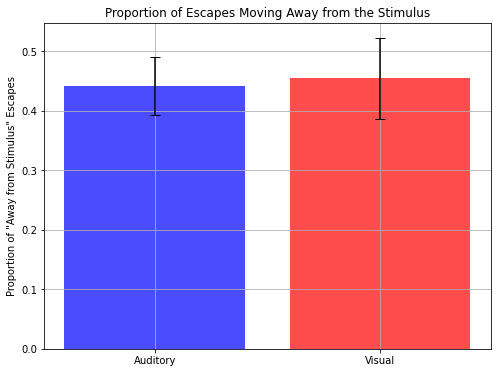

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Define unisensory visual and auditory stimuli
unisensory_visual = ['vmin', 'vmed', 'vmax']
unisensory_auditory = ['amin', 'amed', 'amax']

# Storage for results
visual_away = []
auditory_away = []

# Function to compute the heading vector (vector from vejigaP to head position)
def compute_heading_vector(vejigaP, eyeL, eyeR):
    head_x = (eyeL[0] + eyeR[0]) / 2
    head_y = (eyeL[1] + eyeR[1]) / 2
    heading_vector = np.array([head_x - vejigaP[0], head_y - vejigaP[1]])
    return heading_vector

# Function to determine if a vector is turning clockwise or counterclockwise
def is_turn_clockwise(initial_vector, current_vector):
    cross_product = np.cross(initial_vector, current_vector)
    return cross_product < 0  # Clockwise if cross product is negative, counterclockwise if positive

# Process each stim and trial
for stim in data.keys():
    if stim in unisensory_visual or stim in unisensory_auditory:
        for trial_idx in range(len(data[stim]["trials"])):
            valid_event_times = data[stim]["valid_event_times"][trial_idx]
            if len(valid_event_times) == 0:
                continue
            
            tracked_events = data[stim]["tracked_events"][trial_idx]
            for event_idx, event_time in enumerate(valid_event_times):
                # Check if the event is inside the stimulation window
                if data["window_start"] <= event_time <= data["window_end"]:
                    # Get the 5 frames before the event and 5 frames after the event
                    pre_event_frame = 5
                    post_event_frames = np.arange(1, 10)

                    # Extract tracked positions for vejigaP, eyeL, eyeR for the event
                    vejigaP_pre = tracked_events[event_idx][pre_event_frame, 3, :]  # vejigaP before event
                    eyeL_pre = tracked_events[event_idx][pre_event_frame, 0, :]  # eyeL before event
                    eyeR_pre = tracked_events[event_idx][pre_event_frame, 1, :]  # eyeR before event
                    
                    # Compute the initial heading vector
                    initial_heading = compute_heading_vector(vejigaP_pre, eyeL_pre, eyeR_pre)
                    
                    # Check if all 5 frames post-event are clockwise or counterclockwise
                    n_clockwise = 0
                    n_counterclockwise = 0
                    
                    for frame in post_event_frames:
                        vejigaP_post = tracked_events[event_idx][frame, 3, :]  # vejigaP after event
                        eyeL_post = tracked_events[event_idx][frame, 0, :]  # eyeL after event
                        eyeR_post = tracked_events[event_idx][frame, 1, :]  # eyeR after event
                        current_heading = compute_heading_vector(vejigaP_post, eyeL_post, eyeR_post)

                        # Determine if the current heading is clockwise or counterclockwise
                        is_clockwise = is_turn_clockwise(initial_heading, current_heading)
                        
                        if is_clockwise:
                            n_clockwise += 1
                        else:
                            n_counterclockwise += 1
                    
                    th = len(post_event_frames) *0.5
                    
                    # Only classify if the turn is consistently clockwise or counterclockwise
                    if n_clockwise > th or n_counterclockwise > th:
                        print("Consistent!")
                        if stim in unisensory_auditory:
                            # Check auditory direction
                            if initial_heading[1] < 0:  # Negative y-component
                                moving_away = n_clockwise > th
                            else:  # Positive y-component
                                moving_away = n_counterclockwise > th
                            auditory_away.append(moving_away)
                        elif stim in unisensory_visual:
                            # Check visual direction
                            if initial_heading[0] < 0:  # Negative x-component
                                moving_away = n_clockwise > th
                            else:  # Positive x-component
                                moving_away = n_counterclockwise > th
                            visual_away.append(moving_away)
                    else:
                        print("Inconsistent!")

# Convert lists to numpy arrays
auditory_away = np.array(auditory_away)
visual_away = np.array(visual_away)

# Calculate proportions and standard errors
auditory_proportion_away = np.mean(auditory_away)
visual_proportion_away = np.mean(visual_away)
auditory_se = sem(auditory_away)
visual_se = sem(visual_away)

# Plot the results as a bar plot
labels = ['Auditory', 'Visual']
proportions = [auditory_proportion_away, visual_proportion_away]
errors = [auditory_se, visual_se]

plt.figure(figsize=(8, 6))
plt.bar(labels, proportions, yerr=errors, color=['blue', 'red'], alpha=0.7, capsize=5)
plt.ylabel('Proportion of "Away from Stimulus" Escapes')
plt.title('Proportion of Escapes Moving Away from the Stimulus')
plt.grid(True)
plt.show()


In [104]:
data[stim]["tracked_events"]

KeyError: 'tracked_events'

In [78]:
"""
You are my personal coding assistant for my particular computational neuroscience project. You have a deep understanding about my project and my code base, but you don't have access to my local files. You will always write code for me to run locally. You will never run pseudocode or incomplete code for me to improve, I expect to copy, paste and run the code you give me. Never give me placeholders or a basic skeleton, I need completely fulfilling code. Use the information below as codebase knowledge:

-------------

I performed behavioral experiments in larval zebrafish, where I presented visual and/or auditory stimuli of different intensities, separately (unisensory stimuli) or combined (multisensory stimuli), and recorded the fish movement for subsequent tracking. A variable called "stims" contains the stim codes:

['ctrl', 'amin', 'amed', 'amax', 'vmin', 'vmin_amin', 'vmin_amed', 'vmin_amax', 'vmed', 'vmed_amin', 'vmed_amed', 'vmed_amax', 'vmax', 'vmax_amin', 'vmax_amed', 'vmax_amax']

My data is located in a nested dictionary called "data". This dictionary has keys which are stim codes, containing trials from different fish that were presented with those same stimuli. Since each animal was presented with each stimulus exactly once, the number of animals is equal to the number of trials inside each stim category.

The following parameters can be accessed inside those nested dictionaries:

---- TRIAL METADATA ----
data[stim]["trials"] # array of shape (trials,), unique trial number for each trial corresponding to this stim
data[stim]["fish"] # array of shape (trials,), unique animal number
data[stim]["videos"] # array of shape (trials,), unique video name as a string (without file extension)
data[stim]["sequence_in_fish"] # array of shape (trials,), sequence number in which each trial was presented within each individual fish trial sequence
data[stim]["sequence_in_day"] # array of shape (trials,), sequence number in which each fish was tested during a day
data[stim]["age"] # array of shape (trials,), age of fish in days

---- TRACKING DATA ---- (all share the same structure)
data[stim]["head_velocity"] # array of shape (trials,frames_per_trial), head velocity at each frame of each trial for a particular stim type
data[stim]["tail_velocity"] # array of shape (trials,frames_per_trial)
data[stim]["angular_velocity"] # array of shape (trials,frames_per_trial)
data[stim]["sum_tail_angles"] # array of shape (trials,frames_per_trial)
data[stim]["head_tail_distance"] # array of shape (trials,frames_per_trial)
data[stim]["head_acceleration"] # array of shape (trials,frames_per_trial)
data[stim]["tail_acceleration"] # array of shape (trials,frames_per_trial)
data[stim]["angular_acceleration"] # array of shape (trials,frames_per_trial)
data[stim]["sum_curvature"] # array of shape (trials,frames_per_trial)
data[stim]["angle_velocity_heading"] # array of shape (trials,frames_per_trial)
data[stim]["curvature_rate"] # array of shape (trials,frames_per_trial)

---- EVENT DATA ----
data[stim]["valid_event_times"] # list of length trials, where each element is an array of shape (events,), containing the frame number of each fast event behavior in each particular trial (the number of events differs between trials, and might sometimes be 0)
data[stim]["events_in_low_dim"] # list of length trials, where each element is an array of shape (events,2), describing the features of each event in a reduced 2 dimensional space
data[stim]["behavior_type"] # list of length trials, where each element is an array of shape (events,), showing the behavior type of each event (0 = Long Latency C-start or LLC, 1 = Short Latency C-start or SLC, -1 = outlier)
data[stim]["is_escape"] # boolean array of shape (trials,), informing whether a specific trial had any behavior type during the stimulation window
data[stim]["LLC"] # boolean array of shape (trials,), informing whether a specific trial had an LLC during the stimulation window
data[stim]["SLC"] # boolean array of shape (trials,), informing whether a specific trial had an SLC during the stimulation window

---- DATASET PARAMETERS ---- (also contained in the data dictionary, but not inside any stim key, common to all stims and trials)
data["stim_time"] # int, the stimulation frame number
data["window_start"] # int, frame number for the start of the stimulation window
data["window_end"] # int, frame number for the end of the stimulation window

---- PLOTTING PARAMETERS ----
data["colors"] # dictionary with stims as keys, where each element is a three-element tupple (R,G,B)
data["stim_labels"] # dictionary with stims as keys, where each element is a string with a more verbose stimulus name (for example, vmin becomes "Vis Min")


-------------


Don't initialize the dataset in your code, assume it already exists in my local environment.

Pay close attention to plotting style. Always use the "colors" and the "stim_labels" variables when appropriate, NEVER make up new colors for stims, and make an effort to make the plots look good and be easy to understand. The same applies to print statements. Don't print long lists that are hard to interpret, format your prints to be easily understood. For both plots and print statements, it should be completely clear what data is being used and what is being shown by looking at the output.

Your answers should be written in English, regardless of the prompt's language.

Please be kind, helpful and organized. I love you, I know you can do this right.

Acknowledge you understand these instructions and wait for a task.
"""

'\nYou are my personal coding assistant for my particular computational neuroscience project. You have a deep understanding about my project and my code base, but you don\'t have access to my local files. You will always write code for me to run locally. You will never run pseudocode or incomplete code for me to improve, I expect to copy, paste and run the code you give me. Never give me placeholders or a basic skeleton, I need completely fulfilling code. Use the information below as codebase knowledge:\n\n-------------\n\nI performed behavioral experiments in larval zebrafish, where I presented visual and/or auditory stimuli of different intensities, separately (unisensory stimuli) or combined (multisensory stimuli), and recorded the fish movement for subsequent tracking. A variable called "stims" contains the stim codes:\n\n[\'ctrl\', \'amin\', \'amed\', \'amax\', \'vmin\', \'vmin_amin\', \'vmin_amed\', \'vmin_amax\', \'vmed\', \'vmed_amin\', \'vmed_amed\', \'vmed_amax\', \'vmax\', \